In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 1. Reading and Getting to know our data

In [2]:
# Read data (csv) as pandas dataframe
df = pd.read_csv('adult.csv', na_values=["?"])
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90       NaN   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66       NaN  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                NaN  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                NaN      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [3]:
# Dataframe rows and columns
df.shape

(32561, 15)

In [4]:
# info about columns name, non null rows, and type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# 2. Data Cleansing (Handling missing value and duplicated value)

# 2.1. Missing Value

In [5]:
# Checking missing value per column
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [6]:
# Dropping missing values row-wise
df.dropna(axis=0, inplace=True)

In [7]:
# Checking again the missing values per column to confirm the dropna
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [8]:
# Checking number of records after dropping missing values row-wise
len(df)

30162

## 2.2. Duplicate Value

In [9]:
# Checking number of records that are duplicated
df.duplicated().sum()

23

In [10]:
# View records that are duplicated
data_duplikat = df[df.duplicated()]
data_duplikat

age         workclass  fnlwgt     education  education.num  \
8453    25           Private  308144     Bachelors             13   
8645    90           Private   52386  Some-college             10   
12202   21           Private  250051  Some-college             10   
14346   20           Private  107658  Some-college             10   
15603   25           Private  195994       1st-4th              2   
17344   21           Private  243368     Preschool              1   
19067   46           Private  173243       HS-grad              9   
20507   19           Private   97261       HS-grad              9   
22783   19           Private  138153  Some-college             10   
22934   19           Private  146679  Some-college             10   
23276   49           Private   31267       7th-8th              4   
23660   25           Private  195994       1st-4th              2   
23720   44           Private  367749     Bachelors             13   
23827   49  Self-emp-not-inc   43479  Some-college             10   
26738   23           Private  240137       5th-6th              3   
27133   28           Private  274679       Masters             14   
28796   27           Private  255582       HS-grad              9   
29051   42           Private  204235  Some-college             10   
29334   39           Private   30916       HS-grad              9   
29604   38           Private  207202       HS-grad              9   
31060   46           Private  133616  Some-college             10   
32065   19           Private  251579  Some-college             10   
32419   35           Private  379959       HS-grad              9   

           marital.status         occupation   relationship  \
8453        Never-married       Craft-repair  Not-in-family   
8645        Never-married      Other-service  Not-in-family   
12202       Never-married     Prof-specialty      Own-child   
14346       Never-married       Tech-support  Not-in-family   
15603       Never-married    Priv-house-serv  Not-in-family   
17344       Never-married    Farming-fishing  Not-in-family   
19067  Married-civ-spouse       Craft-repair        Husband   
20507       Never-married    Farming-fishing  Not-in-family   
22783       Never-married       Adm-clerical      Own-child   
22934       Never-married    Exec-managerial      Own-child   
23276  Married-civ-spouse       Craft-repair        Husband   
23660       Never-married    Priv-house-serv  Not-in-family   
23720       Never-married     Prof-specialty  Not-in-family   
23827  Married-civ-spouse       Craft-repair        Husband   
26738       Never-married  Handlers-cleaners  Not-in-family   
27133       Never-married     Prof-specialty  Not-in-family   
28796       Never-married  Machine-op-inspct  Not-in-family   
29051  Married-civ-spouse     Prof-specialty        Husband   
29334  Married-civ-spouse       Craft-repair        Husband   
29604  Married-civ-spouse  Machine-op-inspct        Husband   
31060            Divorced       Adm-clerical      Unmarried   
32065       Never-married      Other-service      Own-child   
32419            Divorced      Other-service  Not-in-family   

                     race     sex  capital.gain  capital.loss  hours.per.week  \
8453                White    Male             0             0              40   
8645   Asian-Pac-Islander    Male             0             0              35   
12202               White  Female             0             0              10   
14346               White  Female             0             0              10   
15603               White  Female             0             0              40   
17344               White    Male             0             0              50   
19067               White    Male             0             0              40   
20507               White    Male             0             0              40   
22783               White  Female             0             0              10   
22934               Black  

In [11]:
# Dropping records that are duplicated
df.drop_duplicates(inplace=True)

In [12]:
# Checking number of records that are duplicated
df.duplicated().sum()

0

In [13]:
# Checking number of records in dataset after dropping dulicated rows or records
len(df)

30139

In [14]:
# Copying dataframe df as df_eda for EDA purpose
df_eda = df.copy()

In [15]:
# Copying dataframe df as df_model for Modelling purpose
df_model = df.copy()

# 3. EDA

## Checking number of values of each target class

In [245]:
df_income = df_eda['income'].value_counts(normalize=True)
df_income = df_income.mul(100)
df_income = df_income.rename('percent').reset_index()
df_income.rename(columns={'index':'income'}, 
                 inplace=True)
df_income

income    percent
0  <=50K  75.095391
1   >50K  24.904609

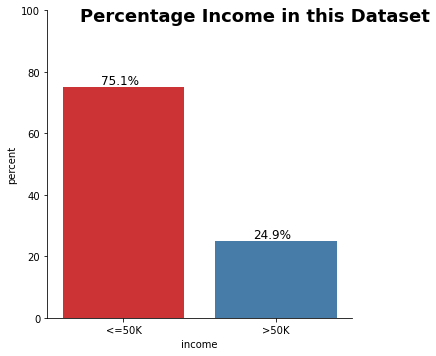

In [246]:
g = sns.catplot(x='income',y='percent', kind='bar',palette='Set1',data=df_income)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    g.fig.suptitle('Percentage Income in this Dataset', fontsize=18, weight='bold',x=0.7)
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.25
    txt_y = p.get_height() + 1
    g.ax.text(txt_x,txt_y,txt, size='large')

<b> Income <= 50K mendominasi pada dataset ini, dengan 75,1% dibanding income >50K yaitu 24,9% </b>

##  3.1. age

### <b> Grouping age karena untuk menemukan insight yang lebih jelas</b>

### <b> Referensi grouping age https://sites.google.com/site/complexdataminingproject/ </b>

### Young => 17-25, Middle => 26-45, Senior => 46-65, Old => diatas 65

In [247]:
#Age grouping

# Menambahkan kolom age_group ke dalam dataset df_eda sesuai dengan kondisi
conditions = [
    (df_eda['age'] >= 17) & (df_eda['age'] <= 25),
    (df_eda['age'] >= 26) & (df_eda['age'] <= 45),
    (df_eda['age'] >= 46) & (df_eda['age'] <= 65),
    (df_eda['age'] >= 66)
    ]
choices = ['Young', 'Middle', 'Senior', 'Old']
df_eda['age_group'] = np.select(conditions, choices, default='error')

df_eda.head()

age workclass  fnlwgt     education  education.num marital.status  \
1   82   Private  132870       HS-grad              9        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   
5   34   Private  216864       HS-grad              9       Divorced   
6   38   Private  150601          10th              6      Separated   

          occupation   relationship   race     sex  capital.gain  \
1    Exec-managerial  Not-in-family  White  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   
5      Other-service      Unmarried  White  Female             0   
6       Adm-clerical      Unmarried  White    Male             0   

   capital.loss  hours.per.week native.country income age_group  
1          4356              18  United-States  <=50K       Old  
3          3900              40  United-States  <=50K    Senior  
4          3900              40  United-States  <=50K    Middle  
5          3770              45  United-States  <=50K    Middle  
6          3770              40  United-States  <=50K    Middle

### Banyaknya value per kategori umur

In [248]:
df_eda['age_group'].value_counts()

Middle    15748
Senior     7896
Young      5657
Old         838
Name: age_group, dtype: int64

In [249]:
df_age_group_percent = df_eda['age_group'].value_counts(normalize=True)
df_age_group_percent = df_age_group_percent.mul(100)
df_age_group_percent = df_age_group_percent.rename('percent').reset_index()
df_age_group_percent.rename(columns={'index':'age_group'}, 
                 inplace=True)
df_age_group_percent

age_group    percent
0    Middle  52.251236
1    Senior  26.198613
2     Young  18.769700
3       Old   2.780451

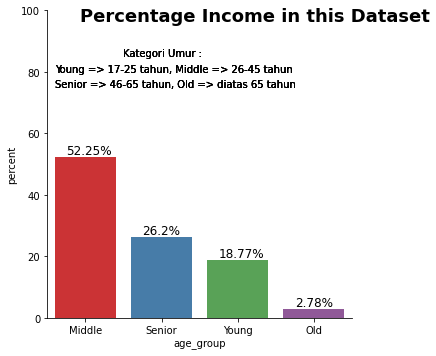

In [250]:
g = sns.catplot(x='age_group',y='percent', kind='bar',palette='Set1',data=df_age_group_percent)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    g.fig.suptitle('Percentage Income in this Dataset', fontsize=18, weight='bold',x=0.7)
    
    g.ax.text(x=0.5, y=85, s='Kategori Umur :')
    g.ax.text(x=-0.4, y=80, s='Young => 17-25 tahun, Middle => 26-45 tahun')
    g.ax.text(x=-0.4, y=75, s='Senior => 46-65 tahun, Old => diatas 65 tahun')
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.15
    txt_y = p.get_height() + 1
    g.ax.text(txt_x,txt_y,txt, size='large')

In [251]:
df_age_middle = df_eda[(df_eda['age_group'] == "Middle")]

In [252]:
len(df_age_middle)

15748

In [253]:
## df_age_middle = df[['STNAME','CTYNAME']].groupby(['STNAME'])['CTYNAME']
##                             .count()
##                             .reset_index(name='count') \
##                            .sort_values(['count'], ascending=False)
##                             .head(5)

In [254]:
df_age_middle.groupby('age').size().sort_values(ascending=False).reset_index(name='count')

age  count
0    36    852
1    31    851
2    33    837
3    34    836
4    37    828
5    35    827
6    30    813
7    28    807
8    38    790
9    32    789
10   27    788
11   39    785
12   29    774
13   41    769
14   40    765
15   26    745
16   43    743
17   42    740
18   45    706
19   44    703

In [255]:
df_age_middle['income'].value_counts()

<=50K    11507
>50K      4241
Name: income, dtype: int64

### Apa mayoritas pendidikan pada umur middle (26-45 tahun)?

In [256]:
# Eductaion grouping

# Menambahkan kolom education_group ke dalam dataset df_eda sesuai dengan kondisi
conditions = [
    (df_eda['education'] == "Assoc-acdm") | (df_eda['education'] == "Assoc-voc"),
    (df_eda['education'] == "Bachelors"),
    (df_eda['education'] == "Doctorate"),
    (df_eda['education'] == "Masters"),
    (df_eda['education'] == "Prof-school"),
    (df_eda['education'] == "HS-grad"),
    (df_eda['education'] == "Some-college")
    ]
choices = ['Associates', 'Bachelors', 'Doctorate', 'Masters', 'Prof-school', 'HS-graduate', 'Colleges']
df_eda['education_group'] = np.select(conditions, choices, default='Dropout')

df_eda.head(1)

age workclass  fnlwgt education  education.num marital.status  \
1   82   Private  132870   HS-grad              9        Widowed   

        occupation   relationship   race     sex  capital.gain  capital.loss  \
1  Exec-managerial  Not-in-family  White  Female             0          4356   

   hours.per.week native.country income age_group education_group  
1              18  United-States  <=50K       Old     HS-graduate

In [257]:
df_age_senior = df_eda[(df_eda['age_group'] == "Senior")]

In [258]:
(len(df_age_senior)+len(df_age_middle))/len(df_eda)

0.7844984903281462

In [259]:
df_age_senior['income'].value_counts()

<=50K    4931
>50K     2965
Name: income, dtype: int64

<b> Dataset ini didominasi umur berkategori Middle (36-45 tahun) dengan 52,25% dan paling sedikit pada umur berkategori Old (diatas 65 tahun) </b>

### Analisis Age dengan Income (Target)

### Count dari Age dengan Income

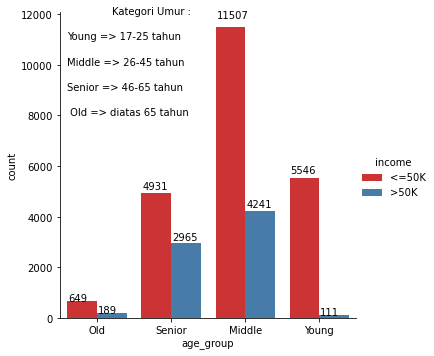

In [260]:
plot = sns.catplot(x="age_group", hue="income", kind="count", palette="Set1", data=df_eda)

for i in np.arange(1):
        ax1 = plot.facet_axis(0,i)
        ax1.text(x=0.2, y=12000, s='Kategori Umur :')
        ax1.text(x=-0.4, y=11000, s='Young => 17-25 tahun')
        ax1.text(x=-0.4, y=10000, s='Middle => 26-45 tahun')
        ax1.text(x=-0.4, y=9000, s='Senior => 46-65 tahun')
        ax1.text(x=-0.4, y=8000, s=' Old => diatas 65 tahun')
        for p in ax1.patches:
            if str(p.get_height()) != 'nan':
                ax1.text(p.get_x() + 0.015, p.get_height() * 1.03, p.get_height(), color='black', rotation='horizontal', size='medium')

### Persentase dari Age dengan count income

In [261]:
x,y = 'age_group', 'income'

df_age_group_percent = df_eda.groupby(x)[y].value_counts(normalize=True)
df_age_group_percent = df_age_group_percent.mul(100)
df_age_group_percent = df_age_group_percent.rename('percent').reset_index()
df_age_group_percent

age_group income    percent
0    Middle  <=50K  73.069596
1    Middle   >50K  26.930404
2       Old  <=50K  77.446301
3       Old   >50K  22.553699
4    Senior  <=50K  62.449341
5    Senior   >50K  37.550659
6     Young  <=50K  98.037829
7     Young   >50K   1.962171

In [262]:
# g = sns.catplot(x=x,y='percent',hue=y,kind='bar',palette='Set1',data=df1)
# g.ax.set_ylim(0,100)

# for p in g.ax.patches:
#     g.ax.text(x=0.2, y=100, s='Kategori Umur :')
#     g.ax.text(x=-0.4, y=96, s='Young => 17-25 tahun')
#     g.ax.text(x=-0.4, y=92, s='Middle => 26-45 tahun')
#     g.ax.text(x=-0.4, y=88, s='Senior => 46-65 tahun')
#     g.ax.text(x=-0.4, y=84, s='Old => diatas 65 tahun')
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() 
#     txt_y = p.get_height() + 1
#     g.ax.text(txt_x,txt_y,txt)

<b> Semua kategori umur lebih besar mendapatkan persentase income <=50K </b>

<b> Umur kategori Senior lebih besar persentasenya untuk mendapatkan income >50K yaitu sebersar 37.55% </b>

<b> Umur kategori Young lebih kecil persentasenya untuk mendapatkan income >50K yaitu sebesar 1.96% </b>

In [263]:
age_education_group = df_eda.groupby(['age_group', 'education_group', 'income']).agg({'income':'count'})
age_education_group = age_education_group.groupby(level=[0,1]).transform(lambda x: (x / x.sum()).round(4) *100)
age_education_group = age_education_group.rename(columns={'income':'percentage'}).reset_index()
age_education_group

age_group education_group income  percentage
0     Middle      Associates  <=50K       73.54
1     Middle      Associates   >50K       26.46
2     Middle       Bachelors  <=50K       56.26
3     Middle       Bachelors   >50K       43.74
4     Middle        Colleges  <=50K       77.04
..       ...             ...    ...         ...
57     Young     HS-graduate  <=50K       98.73
58     Young     HS-graduate   >50K        1.27
59     Young         Masters  <=50K       90.91
60     Young         Masters   >50K        9.09
61     Young     Prof-school  <=50K      100.00

[62 rows x 4 columns]

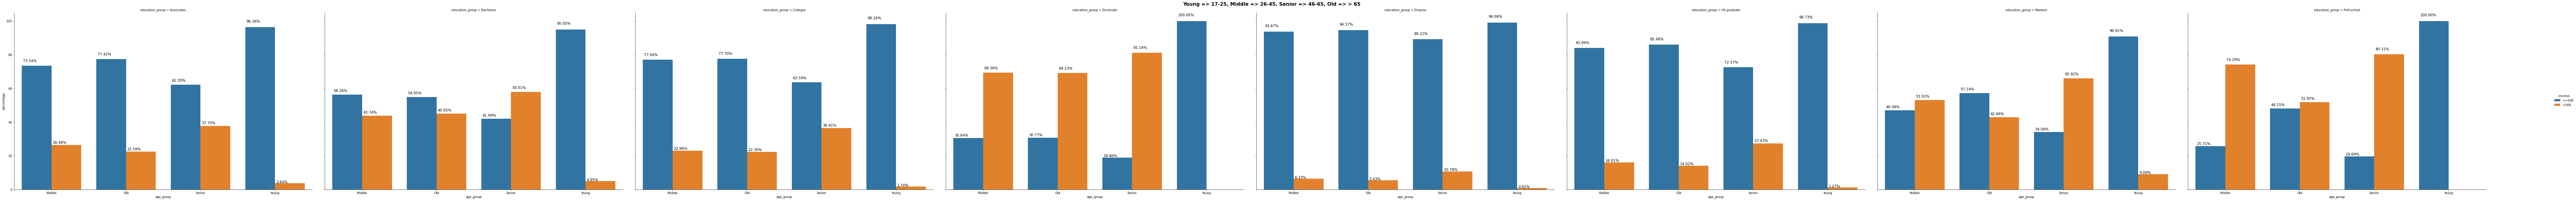

In [264]:
plot1 = sns.catplot(y='percentage', x='age_group', col='education_group', hue='income', 
            data=age_education_group, kind='bar');
plot1.fig.set_size_inches(120,10)
plot1.fig.suptitle('Young => 17-25, Middle => 26-45, Senior => 46-65, Old => > 65', fontsize=16, weight='bold')

for i in np.arange(8):
        ax1 = plot1.facet_axis(0,i)
        for p in ax1.patches:
            if str(p.get_height()) != 'nan':
                ax1.text(p.get_x() + 0.015, p.get_height() * 1.03, '{0:.2f}%'.format(p.get_height()), color='black', rotation='horizontal', size='large')

<b> Dari 16 kategori Education, didapat: </b>

<b> Education Prof-School dengan kategori umur Middle, Senior, Old lebih besar mendapatkan persentase income   >50K dibanding <=50K, tidak untuk umur kategori Young </b>
    
<b> Education Masters dengan kategori umur Middle dan Senior lebih besar mendapatkan persentasi income >50K dibanding <=50K, tidak untuk umur kategori Old dan Young </b>
    
<b> Education Doctorate dengan kategori umur Middle, Senior, Old lebih besar mendapatkan persentase income >50K dibanding <=50K, tidak untuk umur kategori Young </b>
    
<b> Education Bachelors dengan kategori umur Senior lebih besar mendapatkan persentase income >50K dibanding <=50K, tidak untuk umur kategori Young, Middle, Old </b>

<b> Insight : </b>

<b> Kategori umur young sedikit mendapatkan income >50K </b>

### Age, Workclass, Income

In [265]:
age_workclass_group = df_eda.groupby(['age_group', 'workclass', 'income']).agg({'income':'count'})
age_workclass_group

income
age_group workclass        income        
Middle    Federal-gov      <=50K      314
                           >50K       182
          Local-gov        <=50K      789
                           >50K       329
          Private          <=50K     8753
                           >50K      2966
          Self-emp-inc     <=50K      238
                           >50K       250
          Self-emp-not-inc <=50K      902
                           >50K       339
          State-gov        <=50K      510
                           >50K       175
          Without-pay      <=50K        1
Old       Federal-gov      <=50K       16
                           >50K         4
          Local-gov        <=50K       56
                           >50K         9
          Private          <=50K      376
                           >50K        81
          Self-emp-inc     <=50K       33
                           >50K        45
          Self-emp-not-inc <=50K      144
                           >50K        42
          State-gov        <=50K       21
                           >50K         8
          Without-pay      <=50K        3
Senior    Federal-gov      <=50K      183
                           >50K       178
          Local-gov        <=50K      434
                           >50K       264
          Private          <=50K     3325
                           >50K      1742
          Self-emp-inc     <=50K      159
                           >50K       301
          Self-emp-not-inc <=50K      618
                           >50K       323
          State-gov        <=50K      206
                           >50K       157
          Without-pay      <=50K        6
Young     Federal-gov      <=50K       65
                           >50K         1
          Local-gov        <=50K      179
                           >50K         7
          Private          <=50K     4936
                           >50K        85
          Self-emp-inc     <=50K       44
                           >50K         4
          Self-emp-not-inc <=50K      120
                           >50K        10
          State-gov        <=50K      198
                           >50K         4
          Without-pay      <=50K        4

In [266]:
age_workclass_group = age_workclass_group.groupby(level=[0,1]).transform(lambda x: (x / x.sum()).round(4) *100)
age_workclass_group

income
age_group workclass        income        
Middle    Federal-gov      <=50K    63.31
                           >50K     36.69
          Local-gov        <=50K    70.57
                           >50K     29.43
          Private          <=50K    74.69
                           >50K     25.31
          Self-emp-inc     <=50K    48.77
                           >50K     51.23
          Self-emp-not-inc <=50K    72.68
                           >50K     27.32
          State-gov        <=50K    74.45
                           >50K     25.55
          Without-pay      <=50K   100.00
Old       Federal-gov      <=50K    80.00
                           >50K     20.00
          Local-gov        <=50K    86.15
                           >50K     13.85
          Private          <=50K    82.28
                           >50K     17.72
          Self-emp-inc     <=50K    42.31
                           >50K     57.69
          Self-emp-not-inc <=50K    77.42
                           >50K     22.58
          State-gov        <=50K    72.41
                           >50K     27.59
          Without-pay      <=50K   100.00
Senior    Federal-gov      <=50K    50.69
                           >50K     49.31
          Local-gov        <=50K    62.18
                           >50K     37.82
          Private          <=50K    65.62
                           >50K     34.38
          Self-emp-inc     <=50K    34.57
                           >50K     65.43
          Self-emp-not-inc <=50K    65.67
                           >50K     34.33
          State-gov        <=50K    56.75
                           >50K     43.25
          Without-pay      <=50K   100.00
Young     Federal-gov      <=50K    98.48
                           >50K      1.52
          Local-gov        <=50K    96.24
                           >50K      3.76
          Private          <=50K    98.31
                           >50K      1.69
          Self-emp-inc     <=50K    91.67
                           >50K      8.33
          Self-emp-not-inc <=50K    92.31
                           >50K      7.69
          State-gov        <=50K    98.02
                           >50K      1.98
          Without-pay      <=50K   100.00

In [267]:
age_workclass_group = age_workclass_group.rename(columns={'income':'percentage'}).reset_index()
age_workclass_group

age_group         workclass income  percentage
0     Middle       Federal-gov  <=50K       63.31
1     Middle       Federal-gov   >50K       36.69
2     Middle         Local-gov  <=50K       70.57
3     Middle         Local-gov   >50K       29.43
4     Middle           Private  <=50K       74.69
5     Middle           Private   >50K       25.31
6     Middle      Self-emp-inc  <=50K       48.77
7     Middle      Self-emp-inc   >50K       51.23
8     Middle  Self-emp-not-inc  <=50K       72.68
9     Middle  Self-emp-not-inc   >50K       27.32
10    Middle         State-gov  <=50K       74.45
11    Middle         State-gov   >50K       25.55
12    Middle       Without-pay  <=50K      100.00
13       Old       Federal-gov  <=50K       80.00
14       Old       Federal-gov   >50K       20.00
15       Old         Local-gov  <=50K       86.15
16       Old         Local-gov   >50K       13.85
17       Old           Private  <=50K       82.28
18       Old           Private   >50K       17.72
19       Old      Self-emp-inc  <=50K       42.31
20       Old      Self-emp-inc   >50K       57.69
21       Old  Self-emp-not-inc  <=50K       77.42
22       Old  Self-emp-not-inc   >50K       22.58
23       Old         State-gov  <=50K       72.41
24       Old         State-gov   >50K       27.59
25       Old       Without-pay  <=50K      100.00
26    Senior       Federal-gov  <=50K       50.69
27    Senior       Federal-gov   >50K       49.31
28    Senior         Local-gov  <=50K       62.18
29    Senior         Local-gov   >50K       37.82
30    Senior           Private  <=50K       65.62
31    Senior           Private   >50K       34.38
32    Senior      Self-emp-inc  <=50K       34.57
33    Senior      Self-emp-inc   >50K       65.43
34    Senior  Self-emp-not-inc  <=50K       65.67
35    Senior  Self-emp-not-inc   >50K       34.33
36    Senior         State-gov  <=50K       56.75
37    Senior         State-gov   >50K       43.25
38    Senior       Without-pay  <=50K      100.00
39     Young       Federal-gov  <=50K       98.48
40     Young       Federal-gov   >50K        1.52
41     Young         Local-gov  <=50K       96.24
42     Young         Local-gov   >50K        3.76
43     Young           Private  <=50K       98.31
44     Young           Private   >50K        1.69
45     Young      Self-emp-inc  <=50K       91.67
46     Young      Self-emp-inc   >50K        8.33
47     Young  Self-emp-not-inc  <=50K       92.31
48     Young  Self-emp-not-inc   >50K        7.69
49     Young         State-gov  <=50K       98.02
50     Young         State-gov   >50K        1.98
51     Young       Without-pay  <=50K      100.00

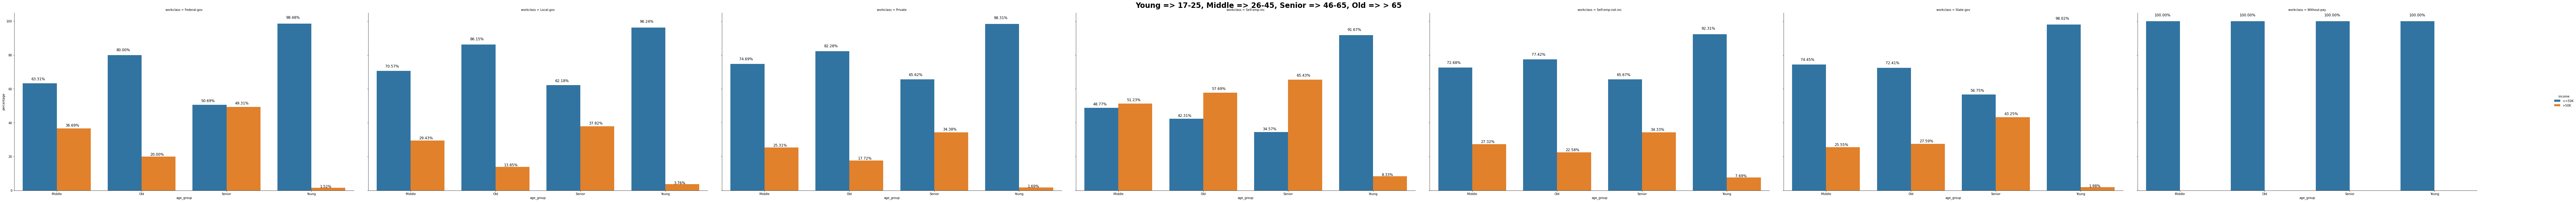

In [268]:
plot1 = sns.catplot(y='percentage', x='age_group', col='workclass', hue='income', 
            data=age_workclass_group, kind='bar');
plot1.fig.set_size_inches(120,10)
plot1.fig.suptitle('Young => 17-25, Middle => 26-45, Senior => 46-65, Old => > 65', fontsize=24, weight='bold')

for i in np.arange(7):
        ax1 = plot1.facet_axis(0,i)
        for p in ax1.patches:
            if str(p.get_height()) != 'nan':
                ax1.text(p.get_x() + 0.1, p.get_height() * 1.03, '{0:.2f}%'.format(p.get_height()), color='black', rotation='horizontal', size='large')

<b> Dari 7 kategori Workclass, didapat: </b>

<b> Hanya Workclass kategori Self-Imp-Inc yang mendapatkan persentase income >50K besar untuk kategori umur Middle, Senior, Old, tidak untuk kategori umur Young </b>

<b> Insight : </b>

<b> Kategori umur young memang sedikit untuk mendapatkan income > 50K </b>

### Age, Occupation, Income

In [269]:
age_occupation_group = df_eda.groupby(['age_group', 'occupation', 'income']).agg({'income':'count'})
age_occupation_group

income
age_group occupation       income        
Middle    Adm-clerical     <=50K     1555
                           >50K       286
          Armed-Forces     <=50K        4
          Craft-repair     <=50K     1875
                           >50K       506
...                                   ...
Young     Sales            >50K        10
          Tech-support     <=50K      155
                           >50K         5
          Transport-moving <=50K      183
                           >50K        12

[104 rows x 1 columns]

In [270]:
age_occupation_group = age_occupation_group.groupby(level=[0,1]).transform(lambda x: (x / x.sum()).round(4) *100)
age_occupation_group

income
age_group occupation       income        
Middle    Adm-clerical     <=50K    84.46
                           >50K     15.54
          Armed-Forces     <=50K   100.00
          Craft-repair     <=50K    78.75
                           >50K     21.25
...                                   ...
Young     Sales            >50K      1.10
          Tech-support     <=50K    96.88
                           >50K      3.12
          Transport-moving <=50K    93.85
                           >50K      6.15

[104 rows x 1 columns]

In [271]:
age_occupation_group = age_occupation_group.rename(columns={'income':'percentage'}).reset_index()
age_occupation_group

age_group        occupation income  percentage
0      Middle      Adm-clerical  <=50K       84.46
1      Middle      Adm-clerical   >50K       15.54
2      Middle      Armed-Forces  <=50K      100.00
3      Middle      Craft-repair  <=50K       78.75
4      Middle      Craft-repair   >50K       21.25
..        ...               ...    ...         ...
99      Young             Sales   >50K        1.10
100     Young      Tech-support  <=50K       96.88
101     Young      Tech-support   >50K        3.12
102     Young  Transport-moving  <=50K       93.85
103     Young  Transport-moving   >50K        6.15

[104 rows x 4 columns]

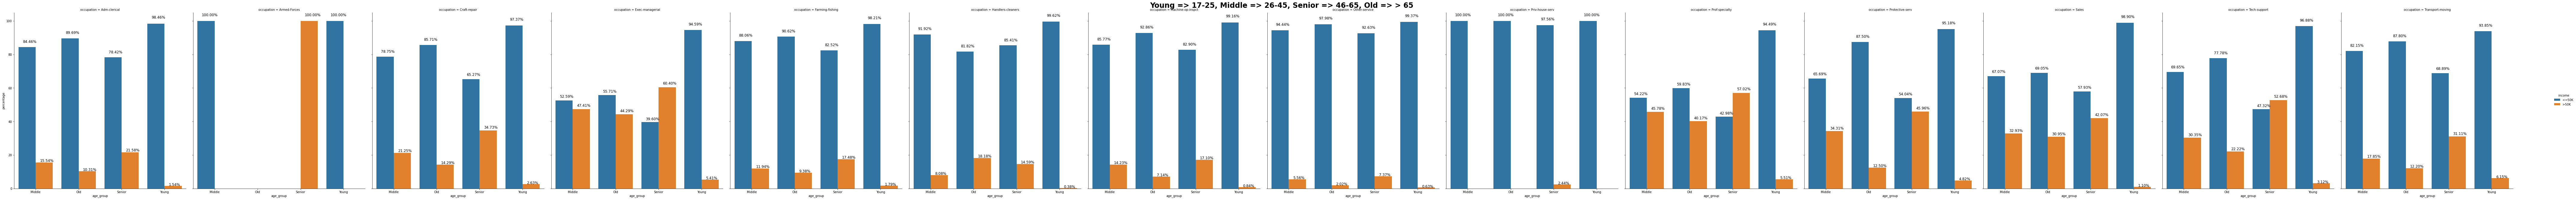

In [272]:
plot1 = sns.catplot(y='percentage', x='age_group', col='occupation', hue='income', 
            data=age_occupation_group, kind='bar');
plot1.fig.set_size_inches(120,10)
plot1.fig.suptitle('Young => 17-25, Middle => 26-45, Senior => 46-65, Old => > 65', fontsize=24, weight='bold')

for i in np.arange(14):
        ax1 = plot1.facet_axis(0,i)
        for p in ax1.patches:
            if str(p.get_height()) != 'nan':
                ax1.text(p.get_x() + 0.1, p.get_height() * 1.03, '{0:.2f}%'.format(p.get_height()), color='black', rotation='horizontal', size='large')

<b> Dari 14 kategori Occupation, didapat : </b>

<b> Occupation kategori Armed-Force (Tentara) dengan kategori umur Senior mendapatakan persentase income >50K yang besar </b>

<b> Occupation kategori Exec-managerial (Managerial Eksekutif) dengan kategori umur Senior mendapatakan persentase income >50K yang besar </b>

<b> Occupation kategori Prof-speciality (Spesialis Professional) dengan kategori umur Senior mendapatakan persentase income >50K yang besar </b>

<b> Occupation kategori Tech-support (Teknikal Support) dengan kategori umur Senior mendapatakan persentase income >50K yang besar </b>

<b> Insight : </b>

<b> Occupation dengan kategori umur senior lebih besar mendapatkan income >50K </b>

### Age, Marital Status, Income

In [273]:
age_marital_group = df_eda.groupby(['age_group', 'marital.status', 'income']).agg({'income':'count'})
age_marital_group = age_marital_group.groupby(level=[0,1]).transform(lambda x: (x / x.sum()).round(4) *100)
age_marital_group = age_marital_group.rename(columns={'income':'percentage'}).reset_index()
age_marital_group

age_group         marital.status income  percentage
0     Middle               Divorced  <=50K       90.73
1     Middle               Divorced   >50K        9.27
2     Middle      Married-AF-spouse  <=50K       50.00
3     Middle      Married-AF-spouse   >50K       50.00
4     Middle     Married-civ-spouse  <=50K       55.11
5     Middle     Married-civ-spouse   >50K       44.89
6     Middle  Married-spouse-absent  <=50K       93.53
7     Middle  Married-spouse-absent   >50K        6.47
8     Middle          Never-married  <=50K       92.03
9     Middle          Never-married   >50K        7.97
10    Middle              Separated  <=50K       93.37
11    Middle              Separated   >50K        6.63
12    Middle                Widowed  <=50K       89.76
13    Middle                Widowed   >50K       10.24
14       Old               Divorced  <=50K      100.00
15       Old     Married-civ-spouse  <=50K       66.88
16       Old     Married-civ-spouse   >50K       33.12
17       Old  Married-spouse-absent  <=50K       72.73
18       Old  Married-spouse-absent   >50K       27.27
19       Old          Never-married  <=50K       88.06
20       Old          Never-married   >50K       11.94
21       Old              Separated  <=50K      100.00
22       Old                Widowed  <=50K       88.21
23       Old                Widowed   >50K       11.79
24    Senior               Divorced  <=50K       85.54
25    Senior               Divorced   >50K       14.46
26    Senior      Married-AF-spouse  <=50K      100.00
27    Senior     Married-civ-spouse  <=50K       48.04
28    Senior     Married-civ-spouse   >50K       51.96
29    Senior  Married-spouse-absent  <=50K       86.96
30    Senior  Married-spouse-absent   >50K       13.04
31    Senior          Never-married  <=50K       84.63
32    Senior          Never-married   >50K       15.37
33    Senior              Separated  <=50K       90.50
34    Senior              Separated   >50K        9.50
35    Senior                Widowed  <=50K       91.34
36    Senior                Widowed   >50K        8.66
37     Young               Divorced  <=50K       99.17
38     Young               Divorced   >50K        0.83
39     Young      Married-AF-spouse  <=50K       50.00
40     Young      Married-AF-spouse   >50K       50.00
41     Young     Married-civ-spouse  <=50K       88.31
42     Young     Married-civ-spouse   >50K       11.69
43     Young  Married-spouse-absent  <=50K      100.00
44     Young          Never-married  <=50K       99.35
45     Young          Never-married   >50K        0.65
46     Young              Separated  <=50K       96.34
47     Young              Separated   >50K        3.66
48     Young                Widowed  <=50K      100.00

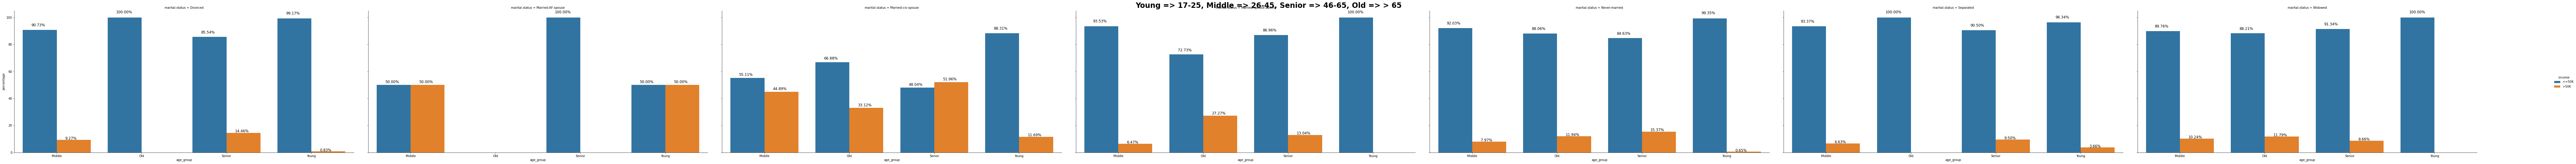

In [274]:
plot1 = sns.catplot(y='percentage', x='age_group', col='marital.status', hue='income', 
            data=age_marital_group, kind='bar');
plot1.fig.set_size_inches(120,8)
plot1.fig.suptitle('Young => 17-25, Middle => 26-45, Senior => 46-65, Old => > 65', fontsize=24, weight='bold')

for i in np.arange(7):
        ax1 = plot1.facet_axis(0,i)
        for p in ax1.patches:
            if str(p.get_height()) != 'nan':
                ax1.text(p.get_x() + 0.1, p.get_height() * 1.03, '{0:.2f}%'.format(p.get_height()), color='black', rotation='horizontal', size='large')

<b> Dari 7 kategori marital status, didapat: </b>

<b> Hanya kategori married-civ-spouse dengan kategori umur senior mendapatkan lebih besar income >50K </b>

### Age, Relationship, Income

In [275]:
age_relationship_group = df_eda.groupby(['age_group', 'relationship', 'income']).agg({'income':'count'})
age_relationship_group = age_relationship_group.groupby(level=[0,1]).transform(lambda x: (x / x.sum()).round(4) *100)
age_relationship_group = age_relationship_group.rename(columns={'income':'percentage'}).reset_index()
age_relationship_group

age_group    relationship income  percentage
0     Middle         Husband  <=50K       55.68
1     Middle         Husband   >50K       44.32
2     Middle   Not-in-family  <=50K       88.18
3     Middle   Not-in-family   >50K       11.82
4     Middle  Other-relative  <=50K       94.89
5     Middle  Other-relative   >50K        5.11
6     Middle       Own-child  <=50K       96.84
7     Middle       Own-child   >50K        3.16
8     Middle       Unmarried  <=50K       94.46
9     Middle       Unmarried   >50K        5.54
10    Middle            Wife  <=50K       47.36
11    Middle            Wife   >50K       52.64
12       Old         Husband  <=50K       67.12
13       Old         Husband   >50K       32.88
14       Old   Not-in-family  <=50K       90.29
15       Old   Not-in-family   >50K        9.71
16       Old  Other-relative  <=50K       88.89
17       Old  Other-relative   >50K       11.11
18       Old       Own-child  <=50K      100.00
19       Old       Unmarried  <=50K       91.18
20       Old       Unmarried   >50K        8.82
21       Old            Wife  <=50K       55.56
22       Old            Wife   >50K       44.44
23    Senior         Husband  <=50K       47.66
24    Senior         Husband   >50K       52.34
25    Senior   Not-in-family  <=50K       84.46
26    Senior   Not-in-family   >50K       15.54
27    Senior  Other-relative  <=50K       92.72
28    Senior  Other-relative   >50K        7.28
29    Senior       Own-child  <=50K       91.30
30    Senior       Own-child   >50K        8.70
31    Senior       Unmarried  <=50K       89.42
32    Senior       Unmarried   >50K       10.58
33    Senior            Wife  <=50K       50.00
34    Senior            Wife   >50K       50.00
35     Young         Husband  <=50K       89.13
36     Young         Husband   >50K       10.87
37     Young   Not-in-family  <=50K       98.42
38     Young   Not-in-family   >50K        1.58
39     Young  Other-relative  <=50K       99.41
40     Young  Other-relative   >50K        0.59
41     Young       Own-child  <=50K       99.67
42     Young       Own-child   >50K        0.33
43     Young       Unmarried  <=50K       98.69
44     Young       Unmarried   >50K        1.31
45     Young            Wife  <=50K       80.00
46     Young            Wife   >50K       20.00

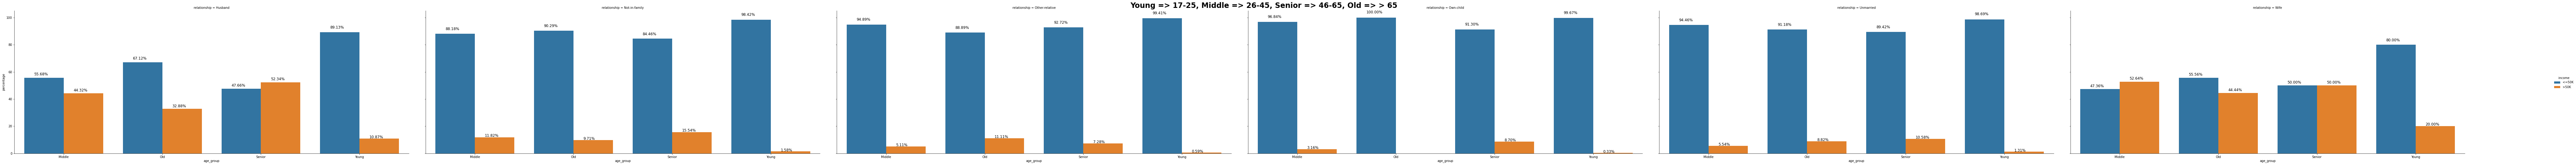

In [276]:
plot1 = sns.catplot(y='percentage', x='age_group', col='relationship', hue='income', 
            data=age_relationship_group, kind='bar');
plot1.fig.set_size_inches(120,8)
plot1.fig.suptitle('Young => 17-25, Middle => 26-45, Senior => 46-65, Old => > 65', fontsize=24, weight='bold')

for i in np.arange(6):
        ax1 = plot1.facet_axis(0,i)
        for p in ax1.patches:
            if str(p.get_height()) != 'nan':
                ax1.text(p.get_x() + 0.1, p.get_height() * 1.03, '{0:.2f}%'.format(p.get_height()), color='black', rotation='horizontal', size='large')

<b> Dari 6 kategori relationship, didapat: </b>

<b> Husband dengan kategori umur senior lebih besar mendapatkan income >50K </b>

<b> Wife dengan kategori umur middle lebih besar mendapatkan income >50K </b>

<b> Insight : Umur senior dan middle yang pernah mendapatkan income >50K </b>

### Age, Race, Income

In [277]:
age_race_group = df_eda.groupby(['age_group', 'race', 'income']).agg({'income':'count'})
age_race_group = age_race_group.groupby(level=[0,1]).transform(lambda x: (x / x.sum()).round(4) *100)
age_race_group = age_race_group.rename(columns={'income':'percentage'}).reset_index()
age_race_group

age_group                race income  percentage
0     Middle  Amer-Indian-Eskimo  <=50K       86.75
1     Middle  Amer-Indian-Eskimo   >50K       13.25
2     Middle  Asian-Pac-Islander  <=50K       69.50
3     Middle  Asian-Pac-Islander   >50K       30.50
4     Middle               Black  <=50K       87.19
5     Middle               Black   >50K       12.81
6     Middle               Other  <=50K       89.36
7     Middle               Other   >50K       10.64
8     Middle               White  <=50K       71.23
9     Middle               White   >50K       28.77
10       Old  Amer-Indian-Eskimo  <=50K      100.00
11       Old  Asian-Pac-Islander  <=50K       84.21
12       Old  Asian-Pac-Islander   >50K       15.79
13       Old               Black  <=50K       90.16
14       Old               Black   >50K        9.84
15       Old               Other  <=50K      100.00
16       Old               White  <=50K       76.10
17       Old               White   >50K       23.90
18    Senior  Amer-Indian-Eskimo  <=50K       84.38
19    Senior  Amer-Indian-Eskimo   >50K       15.62
20    Senior  Asian-Pac-Islander  <=50K       60.00
21    Senior  Asian-Pac-Islander   >50K       40.00
22    Senior               Black  <=50K       77.58
23    Senior               Black   >50K       22.42
24    Senior               Other  <=50K       81.82
25    Senior               Other   >50K       18.18
26    Senior               White  <=50K       60.72
27    Senior               White   >50K       39.28
28     Young  Amer-Indian-Eskimo  <=50K       96.15
29     Young  Amer-Indian-Eskimo   >50K        3.85
30     Young  Asian-Pac-Islander  <=50K       96.71
31     Young  Asian-Pac-Islander   >50K        3.29
32     Young               Black  <=50K       98.64
33     Young               Black   >50K        1.36
34     Young               Other  <=50K      100.00
35     Young               White  <=50K       98.01
36     Young               White   >50K        1.99

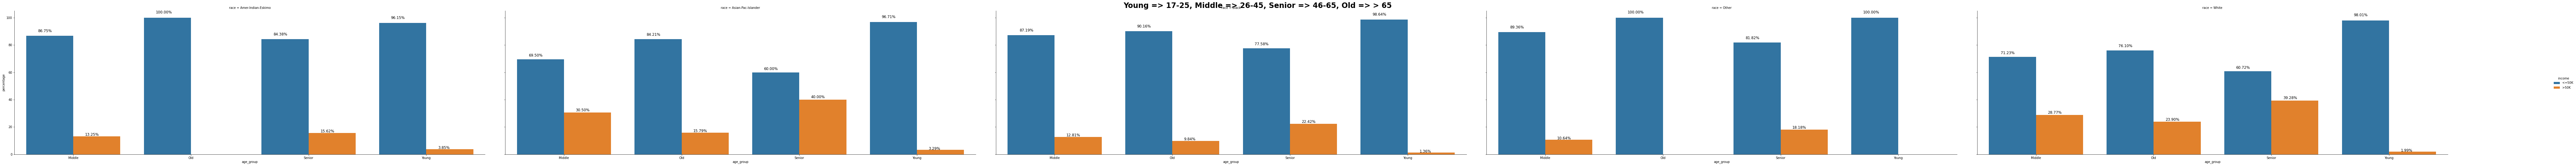

In [278]:
plot1 = sns.catplot(y='percentage', x='age_group', col='race', hue='income', 
            data=age_race_group, kind='bar');
plot1.fig.set_size_inches(120,8)
plot1.fig.suptitle('Young => 17-25, Middle => 26-45, Senior => 46-65, Old => > 65', fontsize=24, weight='bold')

for i in np.arange(5):
        ax1 = plot1.facet_axis(0,i)
        for p in ax1.patches:
            if str(p.get_height()) != 'nan':
                ax1.text(p.get_x() + 0.1, p.get_height() * 1.03, '{0:.2f}%'.format(p.get_height()), color='black', rotation='horizontal', size='large')

<b> Insight: Semua kategori race dan umur tidak ada yang income >50K lebih besar dari income <=50K </b>

### Age, Sex, Income

In [279]:
age_sex_group = df_eda.groupby(['age_group', 'sex', 'income']).agg({'income':'count'})
age_sex_group = age_sex_group.groupby(level=[0,1]).transform(lambda x: (x / x.sum()).round(4) *100)
age_sex_group = age_sex_group.rename(columns={'income':'percentage'}).reset_index()
age_sex_group

age_group     sex income  percentage
0     Middle  Female  <=50K       85.35
1     Middle  Female   >50K       14.65
2     Middle    Male  <=50K       67.72
3     Middle    Male   >50K       32.28
4        Old  Female  <=50K       92.42
5        Old  Female   >50K        7.58
6        Old    Male  <=50K       70.05
7        Old    Male   >50K       29.95
8     Senior  Female  <=50K       84.20
9     Senior  Female   >50K       15.80
10    Senior    Male  <=50K       53.63
11    Senior    Male   >50K       46.37
12     Young  Female  <=50K       98.73
13     Young  Female   >50K        1.27
14     Young    Male  <=50K       97.51
15     Young    Male   >50K        2.49

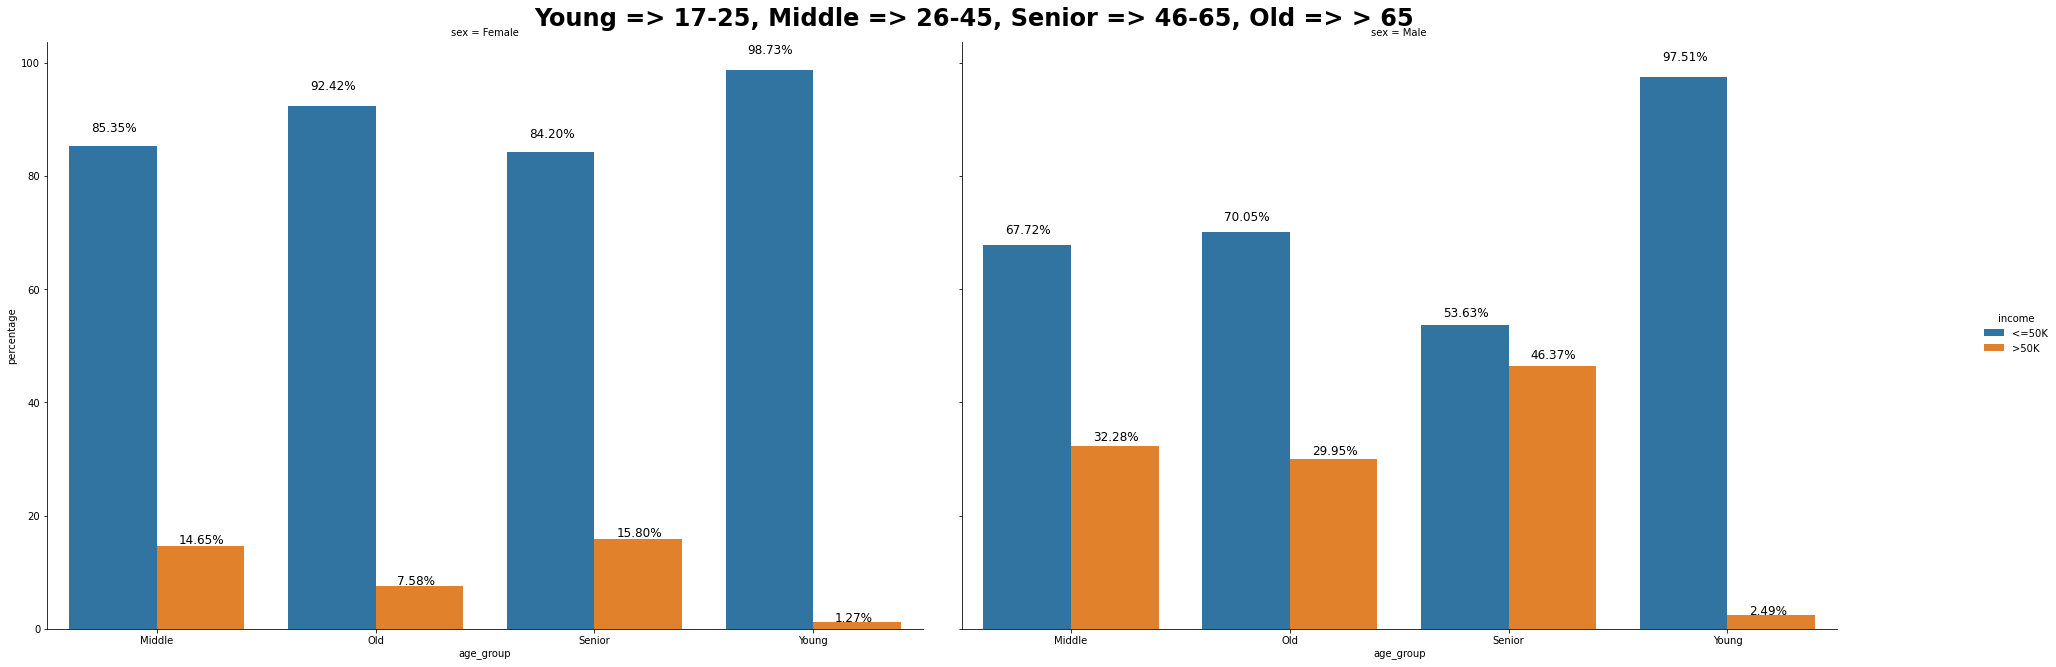

In [280]:
plot1 = sns.catplot(y='percentage', x='age_group', col='sex', hue='income', 
            data=age_sex_group, kind='bar');
plot1.fig.set_size_inches(30,10)
plot1.fig.suptitle('Young => 17-25, Middle => 26-45, Senior => 46-65, Old => > 65', fontsize=24, weight='bold')

for i in np.arange(2):
        ax1 = plot1.facet_axis(0,i)
        for p in ax1.patches:
            if str(p.get_height()) != 'nan':
                ax1.text(p.get_x() + 0.1, p.get_height() * 1.03, '{0:.2f}%'.format(p.get_height()), color='black', rotation='horizontal', size='large')

<b> Insight: Semua kategori sex dan umur tidak ada yang income >50K lebih besar dari income <=50K </b>

### Age, Hours per week, Income

In [281]:
# Hours per week grouping

# Menambahkan kolom hours_per_week_group ke dalam dataset df_eda sesuai dengan kondisi
conditions = [
    (df_eda['hours.per.week'] <= 25),
    (df_eda['hours.per.week'] > 25) & (df['hours.per.week'] <= 40),
    (df_eda['hours.per.week'] > 40) & (df['hours.per.week'] <= 60),
    (df_eda['hours.per.week'] > 60)
    ]
choices = ['Part-time', 'Full-time', 'Over-time', 'Too-much']
df_eda['hours_per_week_group'] = np.select(conditions, choices, default='error')

df_eda.head(1)

age workclass  fnlwgt education  education.num marital.status  \
1   82   Private  132870   HS-grad              9        Widowed   

        occupation   relationship   race     sex  capital.gain  capital.loss  \
1  Exec-managerial  Not-in-family  White  Female             0          4356   

   hours.per.week native.country income age_group education_group  \
1              18  United-States  <=50K       Old     HS-graduate   

  hours_per_week_group  
1            Part-time

In [282]:
age_hourspeerweek_group = df_eda.groupby(['age_group', 'hours_per_week_group', 'income']).agg({'income':'count'})
age_hourspeerweek_group = age_hourspeerweek_group.groupby(level=[0,1]).transform(lambda x: (x / x.sum()).round(4) *100)
age_hourspeerweek_group = age_hourspeerweek_group.rename(columns={'income':'percentage'}).reset_index()
age_hourspeerweek_group

age_group hours_per_week_group income  percentage
0     Middle            Full-time  <=50K       79.65
1     Middle            Full-time   >50K       20.35
2     Middle            Over-time  <=50K       59.78
3     Middle            Over-time   >50K       40.22
4     Middle            Part-time  <=50K       88.62
5     Middle            Part-time   >50K       11.38
6     Middle             Too-much  <=50K       62.40
7     Middle             Too-much   >50K       37.60
8        Old            Full-time  <=50K       76.00
9        Old            Full-time   >50K       24.00
10       Old            Over-time  <=50K       50.00
11       Old            Over-time   >50K       50.00
12       Old            Part-time  <=50K       87.36
13       Old            Part-time   >50K       12.64
14       Old             Too-much  <=50K       75.00
15       Old             Too-much   >50K       25.00
16    Senior            Full-time  <=50K       67.92
17    Senior            Full-time   >50K       32.08
18    Senior            Over-time  <=50K       47.17
19    Senior            Over-time   >50K       52.83
20    Senior            Part-time  <=50K       85.34
21    Senior            Part-time   >50K       14.66
22    Senior             Too-much  <=50K       55.67
23    Senior             Too-much   >50K       44.33
24     Young            Full-time  <=50K       98.20
25     Young            Full-time   >50K        1.80
26     Young            Over-time  <=50K       93.37
27     Young            Over-time   >50K        6.63
28     Young            Part-time  <=50K      100.00
29     Young             Too-much  <=50K       91.55
30     Young             Too-much   >50K        8.45

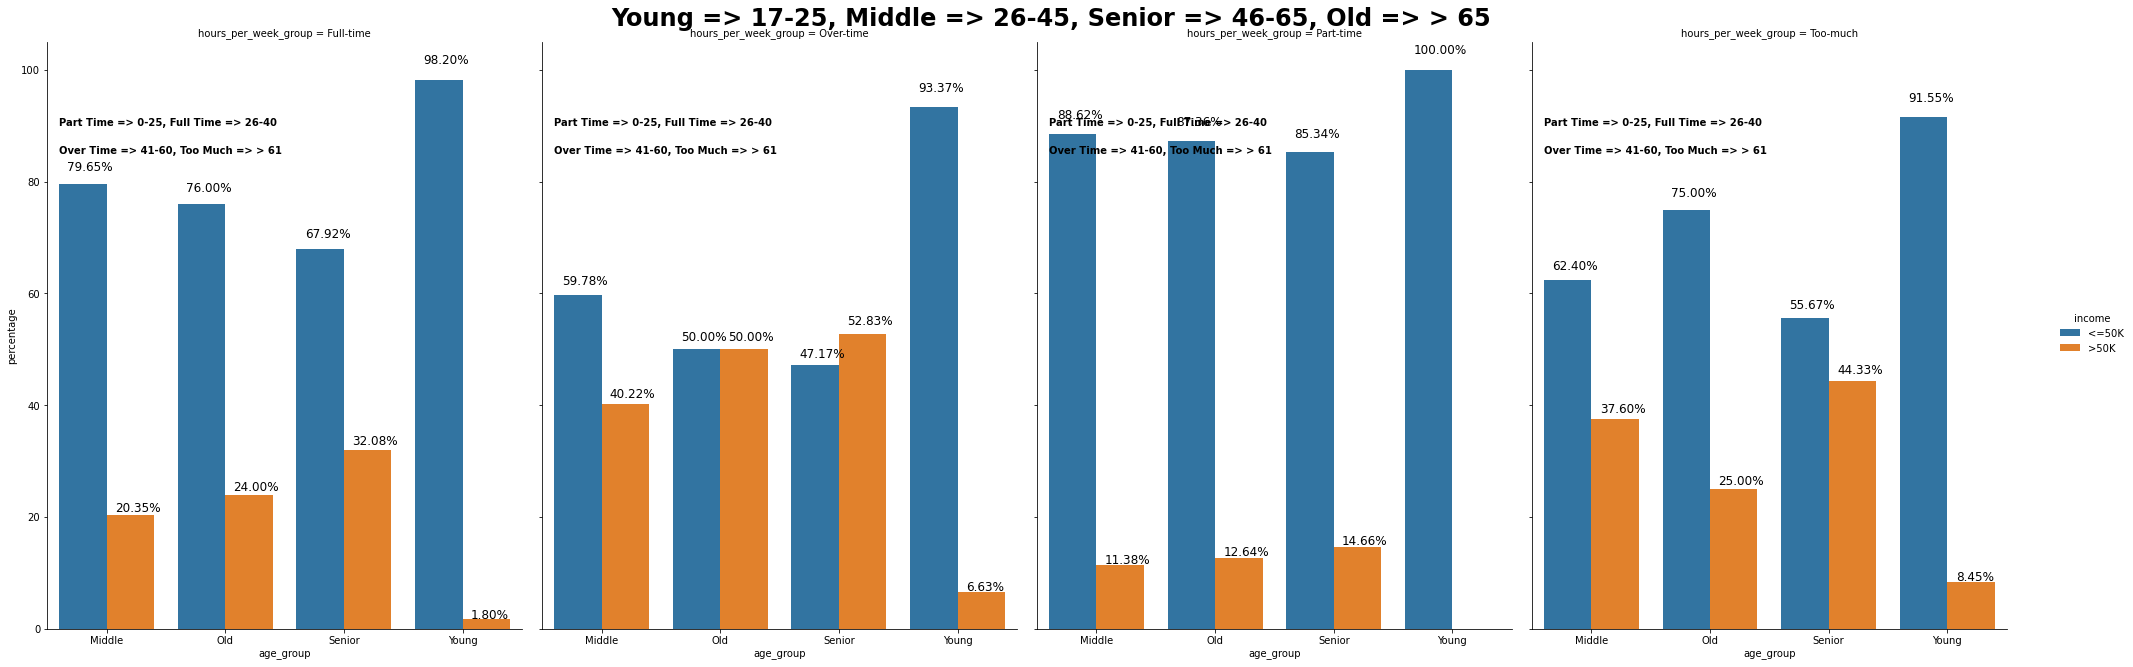

In [283]:
plot1 = sns.catplot(y='percentage', x='age_group', col='hours_per_week_group', hue='income', 
            data=age_hourspeerweek_group, kind='bar');
plot1.fig.set_size_inches(30,10)
plot1.fig.suptitle('Young => 17-25, Middle => 26-45, Senior => 46-65, Old => > 65', fontsize=24, weight='bold')
for i in np.arange(4):
        ax1 = plot1.facet_axis(0,i)
        ax1.text(x=-0.4, y=90, s='Part Time => 0-25, Full Time => 26-40', weight='bold')
        ax1.text(x=-0.4, y=85, s='Over Time => 41-60, Too Much => > 61', weight='bold')
        for p in ax1.patches:
            if str(p.get_height()) != 'nan':
                ax1.text(p.get_x() + 0.07, p.get_height() * 1.03, '{0:.2f}%'.format(p.get_height()), color='black', rotation='horizontal', size='large')

<b> Insight: Kategori hours per week yang Over Time dan kategori umur senior lebih banyak mendapatkan income >50K dibanding income <=50K </b>

### Age, Capital loss, Income

In [284]:
# Capital Loss grouping

# Menambahkan kolom capital_loss_group ke dalam dataset df_eda sesuai dengan kondisi
conditions = [
    (df_eda['capital.loss'] == 0),
    (df_eda['capital.loss'] >= df_eda['capital.loss'].max())
    ]
choices = ['None', 'High']
df_eda['capital_loss_group'] = np.select(conditions, choices, default='Low')

df_eda.head(1)

age workclass  fnlwgt education  education.num marital.status  \
1   82   Private  132870   HS-grad              9        Widowed   

        occupation   relationship   race     sex  capital.gain  capital.loss  \
1  Exec-managerial  Not-in-family  White  Female             0          4356   

   hours.per.week native.country income age_group education_group  \
1              18  United-States  <=50K       Old     HS-graduate   

  hours_per_week_group capital_loss_group  
1            Part-time               High

In [285]:
age_capitalloss_group = df_eda.groupby(['age_group', 'capital_loss_group', 'income']).agg({'income':'count'})
age_capitalloss_group = age_capitalloss_group.groupby(level=[0,1]).transform(lambda x: (x / x.sum()).round(4) *100)
age_capitalloss_group = age_capitalloss_group.rename(columns={'income':'percentage'}).reset_index()
age_capitalloss_group

age_group capital_loss_group income  percentage
0     Middle                Low  <=50K       46.59
1     Middle                Low   >50K       53.41
2     Middle               None  <=50K       74.47
3     Middle               None   >50K       25.53
4        Old               High  <=50K      100.00
5        Old                Low  <=50K       49.02
6        Old                Low   >50K       50.98
7        Old               None  <=50K       79.26
8        Old               None   >50K       20.74
9     Senior                Low  <=50K       39.13
10    Senior                Low   >50K       60.87
11    Senior               None  <=50K       63.89
12    Senior               None   >50K       36.11
13     Young                Low  <=50K       93.50
14     Young                Low   >50K        6.50
15     Young               None  <=50K       98.14
16     Young               None   >50K        1.86

In [286]:
df_eda['capital.loss'].describe()

count    30139.000000
mean        88.439928
std        404.445239
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital.loss, dtype: float64

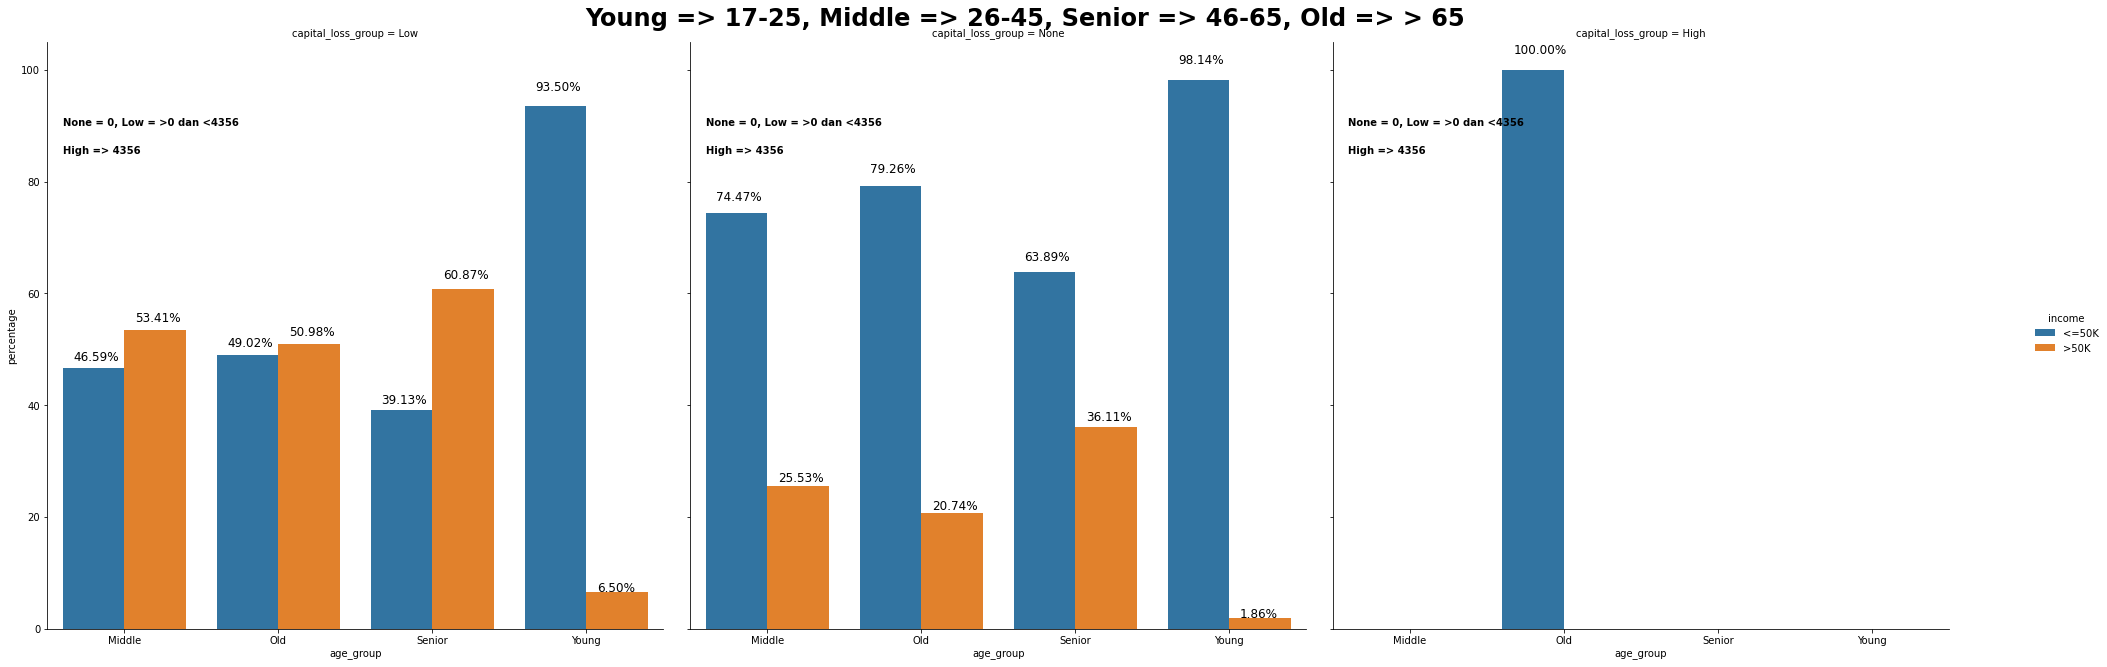

In [287]:
plot1 = sns.catplot(y='percentage', x='age_group', col='capital_loss_group', hue='income', 
            data=age_capitalloss_group, kind='bar');
plot1.fig.set_size_inches(30,10)
plot1.fig.suptitle('Young => 17-25, Middle => 26-45, Senior => 46-65, Old => > 65', fontsize=24, weight='bold')
for i in np.arange(3):
        ax1 = plot1.facet_axis(0,i)
        ax1.text(x=-0.4, y=90, s='None = 0, Low = >0 dan <4356', weight='bold')
        ax1.text(x=-0.4, y=85, s='High => 4356', weight='bold')
        for p in ax1.patches:
            if str(p.get_height()) != 'nan':
                ax1.text(p.get_x() + 0.07, p.get_height() * 1.03, '{0:.2f}%'.format(p.get_height()), color='black', rotation='horizontal', size='large')

<b> Insight: Capital loss dengan kategori Low dan umur kategori middle,senior, dan old lebih banyak mendapatkan income >50K dibanding income <=50K </b>

### Age, Capital gain, Income

In [288]:
# Capital gain grouping

# Menambahkan kolom capital_loss_group ke dalam dataset df_eda sesuai dengan kondisi
conditions = [
    (df_eda['capital.gain'] == 0),
    (df_eda['capital.gain'] >= df_eda['capital.loss'].max())
    ]
choices = ['None', 'High']
df_eda['capital_gain_group'] = np.select(conditions, choices, default='Low')

df_eda.head(1)

age workclass  fnlwgt education  education.num marital.status  \
1   82   Private  132870   HS-grad              9        Widowed   

        occupation   relationship   race     sex  capital.gain  capital.loss  \
1  Exec-managerial  Not-in-family  White  Female             0          4356   

   hours.per.week native.country income age_group education_group  \
1              18  United-States  <=50K       Old     HS-graduate   

  hours_per_week_group capital_loss_group capital_gain_group  
1            Part-time               High               None

In [289]:
df_eda['capital.gain'].describe()

count    30139.000000
mean      1092.841202
std       7409.110596
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital.gain, dtype: float64

In [290]:
age_capitalgain_group = df_eda.groupby(['age_group', 'capital_gain_group', 'income']).agg({'income':'count'})
age_capitalgain_group = age_capitalgain_group.groupby(level=[0,1]).transform(lambda x: (x / x.sum()).round(4) *100)
age_capitalgain_group = age_capitalgain_group.rename(columns={'income':'percentage'}).reset_index()
age_capitalgain_group

age_group capital_gain_group income  percentage
0     Middle               High  <=50K       14.91
1     Middle               High   >50K       85.09
2     Middle                Low  <=50K       88.37
3     Middle                Low   >50K       11.63
4     Middle               None  <=50K       76.40
5     Middle               None   >50K       23.60
6        Old               High  <=50K       13.10
7        Old               High   >50K       86.90
8        Old                Low  <=50K      100.00
9        Old               None  <=50K       83.11
10       Old               None   >50K       16.89
11    Senior               High  <=50K        9.96
12    Senior               High   >50K       90.04
13    Senior                Low  <=50K       80.50
14    Senior                Low   >50K       19.50
15    Senior               None  <=50K       67.05
16    Senior               None   >50K       32.95
17     Young               High  <=50K       42.22
18     Young               High   >50K       57.78
19     Young                Low  <=50K       98.37
20     Young                Low   >50K        1.63
21     Young               None  <=50K       98.49
22     Young               None   >50K        1.51

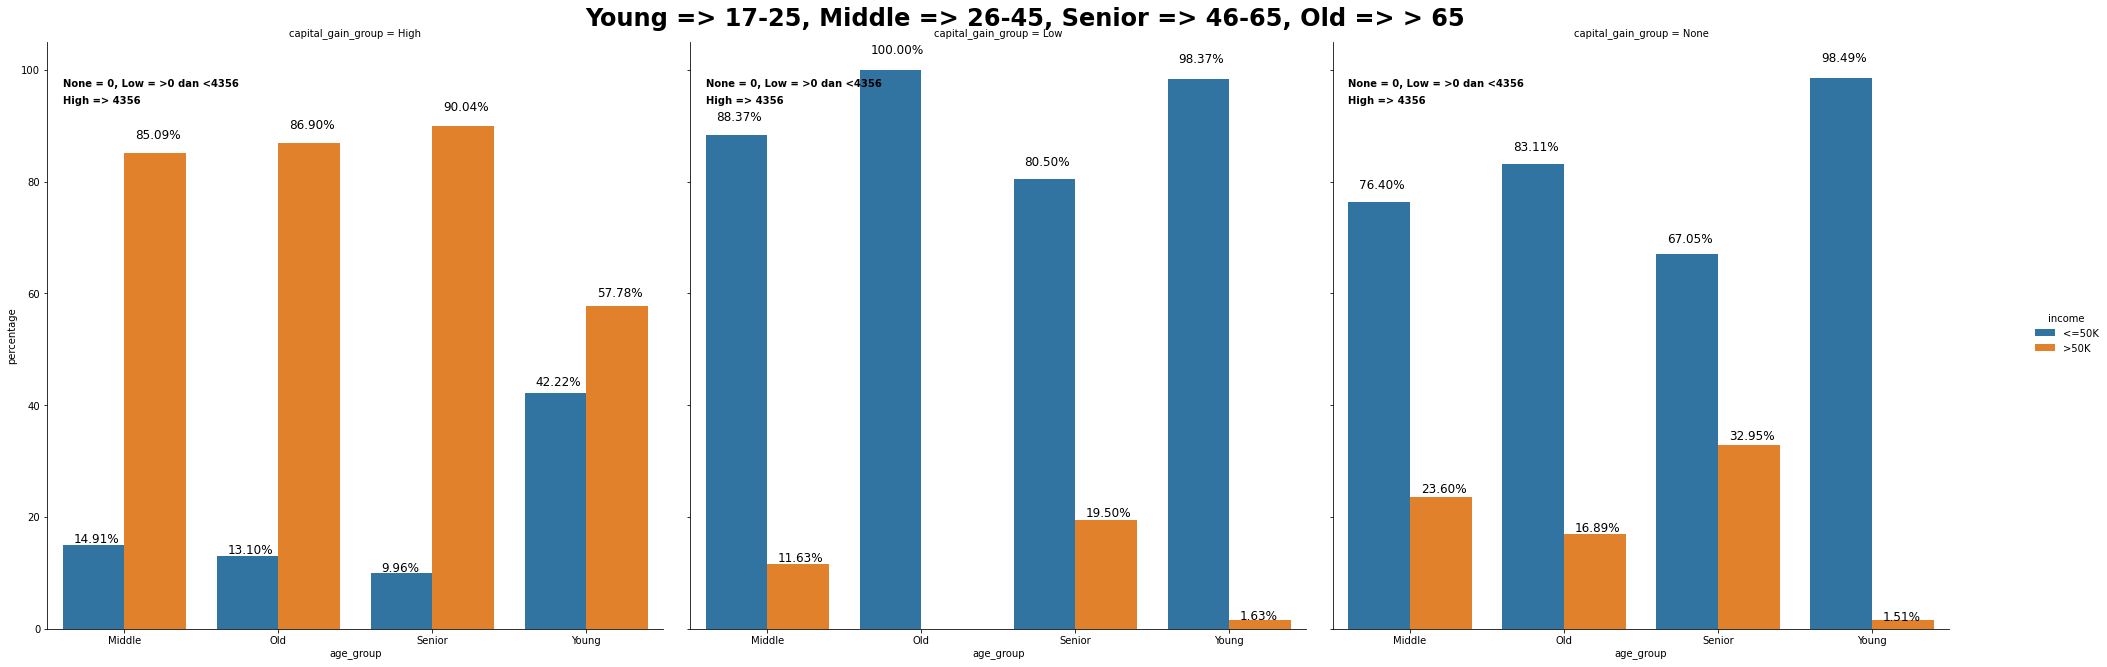

In [291]:
plot1 = sns.catplot(y='percentage', x='age_group', col='capital_gain_group', hue='income', 
            data=age_capitalgain_group, kind='bar');
plot1.fig.set_size_inches(30,10)
plot1.fig.suptitle('Young => 17-25, Middle => 26-45, Senior => 46-65, Old => > 65', fontsize=24, weight='bold')
for i in np.arange(3):
        ax1 = plot1.facet_axis(0,i)
        ax1.text(x=-0.4, y=97, s='None = 0, Low = >0 dan <4356', weight='bold')
        ax1.text(x=-0.4, y=94, s='High => 4356', weight='bold')
        for p in ax1.patches:
            if str(p.get_height()) != 'nan':
                ax1.text(p.get_x() + 0.07, p.get_height() * 1.03, '{0:.2f}%'.format(p.get_height()), color='black', rotation='horizontal', size='large')

<b> Insight: Capital gain dengan kategori High dan semua kategori umur lebih banyak mendapatkan income >50K dibanding income <=50K </b>

### Age, Native country, Income

<b> Referensi grouping native country https://sites.google.com/site/complexdataminingproject/ </b>

In [292]:
# Native Country grouping

# Menambahkan kolom native_country_group ke dalam dataset df_eda sesuai dengan kondisi
conditions = [
    (df_eda['native.country'] == "France") | (df_eda['native.country'] == "Germany") 
    | (df_eda['native.country'] == "Greece") | (df_eda['native.country'] == "Holand-Netherlands")
    | (df_eda['native.country'] == "Hungary") | (df_eda['native.country'] == "Italy")
    | (df_eda['native.country'] == "Poland") | (df_eda['native.country'] == "Portugal")
    | (df_eda['native.country'] == "South") | (df_eda['native.country'] == "Yugoslavia"),
    (df_eda['native.country'] == "United-States"),
    (df_eda['native.country'] == "Laos") | (df_eda['native.country'] == "Cambodia")
    |(df_eda['native.country'] == "Philippines") | (df_eda['native.country'] == "Thailand")
    | (df_eda['native.country'] == "Vietnam"),
    (df_eda['native.country'] == "Canada") | (df_eda['native.country'] == "England") 
    | (df_eda['native.country'] == "India") | (df_eda['native.country'] == "Ireland")
    | (df_eda['native.country'] == "Scotland"),
    (df_eda['native.country'] == "China") | (df_eda['native.country'] == "Hong") 
    | (df_eda['native.country'] == "Taiwan"),  
    (df_eda['native.country'] == "Columbia") | (df_eda['native.country'] == "Cuba")
    | (df_eda['native.country'] == "Dominican-Republic") | (df_eda['native.country'] == "Ecuador")
    | (df_eda['native.country'] == "El-Salvador") | (df_eda['native.country'] == "Guatemala")
    | (df_eda['native.country'] == "Haiti") | (df_eda['native.country'] == "Honduras")
    | (df_eda['native.country'] == "Jamaica") | (df_eda['native.country'] == "Mexico")
    | (df_eda['native.country'] == "Outlying-US(Guam-USVI-etc)") | (df_eda['native.country'] == "Nicaragua")
    | (df_eda['native.country'] == "Peru") | (df_eda['native.country'] == "Puerto-Rico")
    | (df_eda['native.country'] == "Trinadad&Tobago")    
    ]
choices = ['Europe', 'United-States', 'SE-Asia', 'British-Commonwealth', 'China', 'America']
df_eda['native_country_group'] = np.select(conditions, choices, default='Asia')

df_eda.head(1)

age workclass  fnlwgt education  education.num marital.status  \
1   82   Private  132870   HS-grad              9        Widowed   

        occupation   relationship   race     sex  ...  capital.loss  \
1  Exec-managerial  Not-in-family  White  Female  ...          4356   

   hours.per.week  native.country income age_group education_group  \
1              18   United-States  <=50K       Old     HS-graduate   

  hours_per_week_group capital_loss_group capital_gain_group  \
1            Part-time               High               None   

  native_country_group  
1        United-States  

[1 rows x 21 columns]

In [293]:
age_nativecountry_group = df_eda.groupby(['age_group', 'native_country_group', 'income']).agg({'income':'count'})
age_nativecountry_group = age_nativecountry_group.groupby(level=[0,1]).transform(lambda x: (x / x.sum()).round(4) *100)
age_nativecountry_group = age_nativecountry_group.rename(columns={'income':'percentage'}).reset_index()
age_nativecountry_group

age_group  native_country_group income  percentage
0     Middle               America  <=50K       90.57
1     Middle               America   >50K        9.43
2     Middle                  Asia  <=50K       60.56
3     Middle                  Asia   >50K       39.44
4     Middle  British-Commonwealth  <=50K       63.19
5     Middle  British-Commonwealth   >50K       36.81
6     Middle                 China  <=50K       61.36
7     Middle                 China   >50K       38.64
8     Middle                Europe  <=50K       74.55
9     Middle                Europe   >50K       25.45
10    Middle               SE-Asia  <=50K       71.01
11    Middle               SE-Asia   >50K       28.99
12    Middle         United-States  <=50K       72.45
13    Middle         United-States   >50K       27.55
14       Old               America  <=50K       80.00
15       Old               America   >50K       20.00
16       Old  British-Commonwealth  <=50K       69.23
17       Old  British-Commonwealth   >50K       30.77
18       Old                 China   >50K      100.00
19       Old                Europe  <=50K       60.00
20       Old                Europe   >50K       40.00
21       Old               SE-Asia  <=50K      100.00
22       Old         United-States  <=50K       77.69
23       Old         United-States   >50K       22.31
24    Senior               America  <=50K       87.54
25    Senior               America   >50K       12.46
26    Senior                  Asia  <=50K       45.83
27    Senior                  Asia   >50K       54.17
28    Senior  British-Commonwealth  <=50K       58.06
29    Senior  British-Commonwealth   >50K       41.94
30    Senior                 China  <=50K       66.67
31    Senior                 China   >50K       33.33
32    Senior                Europe  <=50K       60.90
33    Senior                Europe   >50K       39.10
34    Senior               SE-Asia  <=50K       61.43
35    Senior               SE-Asia   >50K       38.57
36    Senior         United-States  <=50K       61.61
37    Senior         United-States   >50K       38.39
38     Young               America  <=50K       98.77
39     Young               America   >50K        1.23
40     Young                  Asia  <=50K      100.00
41     Young  British-Commonwealth  <=50K       92.50
42     Young  British-Commonwealth   >50K        7.50
43     Young                 China  <=50K      100.00
44     Young                Europe  <=50K       95.83
45     Young                Europe   >50K        4.17
46     Young               SE-Asia  <=50K       98.21
47     Young               SE-Asia   >50K        1.79
48     Young         United-States  <=50K       98.05
49     Young         United-States   >50K        1.95

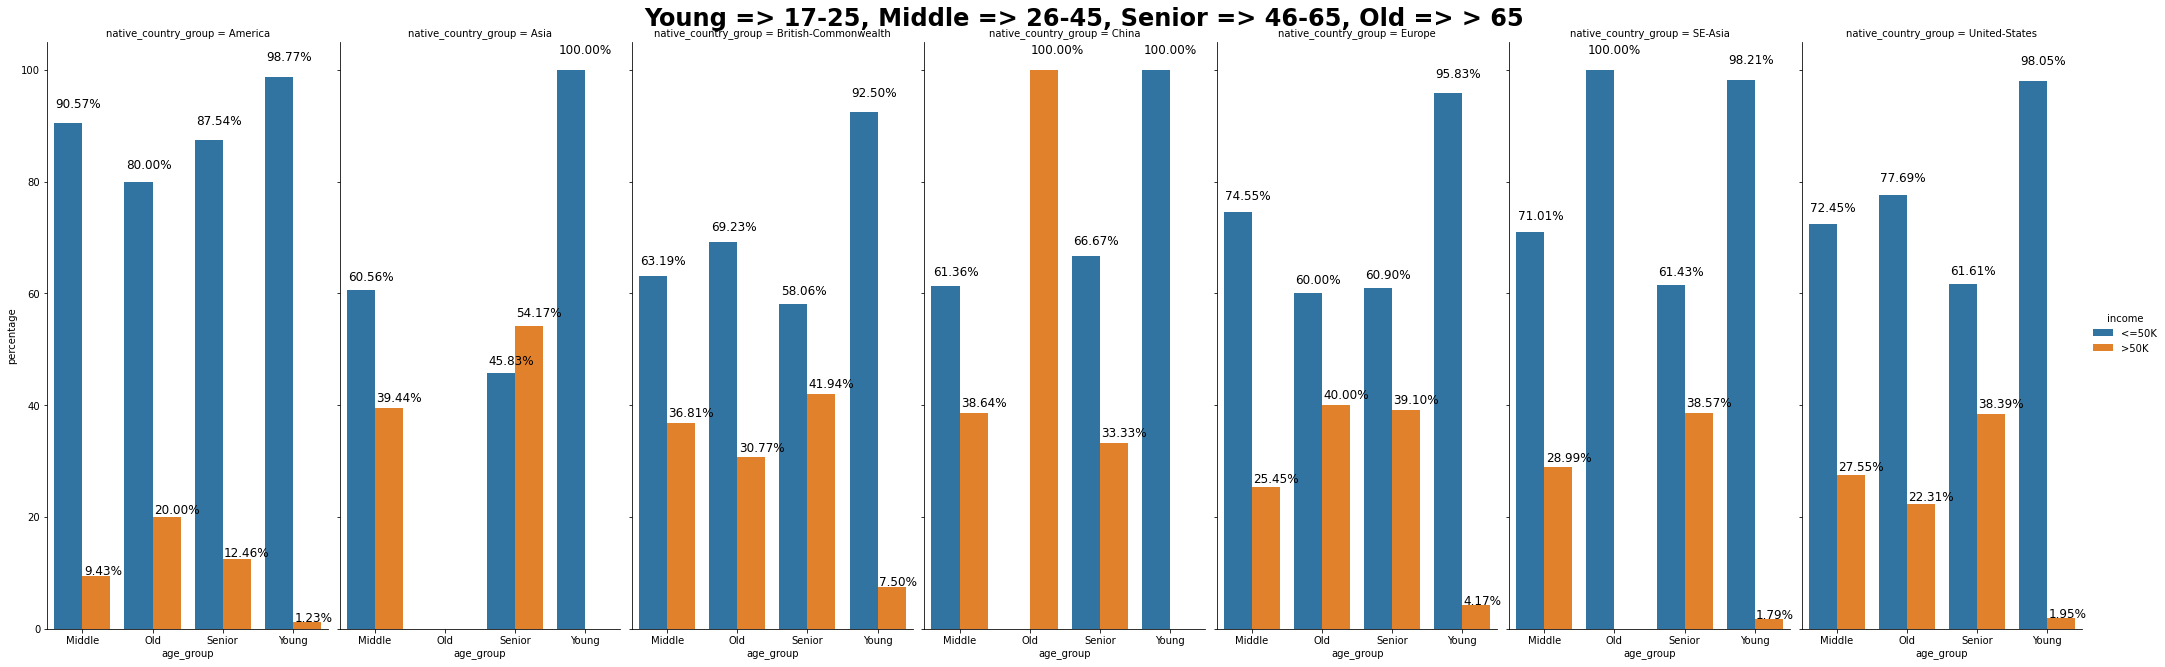

In [294]:
plot1 = sns.catplot(y='percentage', x='age_group', col='native_country_group', hue='income', 
            data=age_nativecountry_group, kind='bar');
plot1.fig.set_size_inches(30,10)
plot1.fig.suptitle('Young => 17-25, Middle => 26-45, Senior => 46-65, Old => > 65', fontsize=24, weight='bold')
for i in np.arange(7):
        ax1 = plot1.facet_axis(0,i)
        for p in ax1.patches:
            if str(p.get_height()) != 'nan':
                ax1.text(p.get_x() + 0.02, p.get_height() * 1.03, '{0:.2f}%'.format(p.get_height()), color='black', rotation='horizontal', size='large')

<b> Kategori negara bagian Asia dan kategori umur Senior lebih banyak mendapatkan income >50K daripada income <=50K </b>

<b> Kategori negara China dan keategori umur Old lebih banyak mendapatkan income >50K daripada income <=50K </b>

<b> Kategori umur senior dan old pernah mendapatkan income >50K lebih besar dari income <=50K </b>

<b> Referensi grouping age https://sites.google.com/site/complexdataminingproject/ </b>

<b> Insight </b>

<b> 1. Umur yang berkategori Young (umur 17-25) tahun memiliki income <= 50K, tetapi hanya 1 kategori umur Young yang mendapatkan income > 50K yaitu Young dengan capital gain = High </b>

<b> 2. Umur yang berkategori Senior (umur 46-65) tahun memiliki income > 50K, pernah muncul di native country, capital gain, capital loss, hours per week, marital status, relationship, education </b>

## 3.2. workclass

In [295]:
df_eda['workclass'].value_counts()

Private             22264
Self-emp-not-inc     2498
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [296]:
income_per_workclass = df_eda.groupby(['workclass', 'income']).agg({'income':'count'})
# income_per_occupation.sort_values('education', ascending=False).sort_index(level=0)
# income_per_occupation
theworkclass = income_per_workclass.groupby(['workclass']).agg({'income': 'sum'})
percentage_income_perworkclass = income_per_workclass.div(theworkclass, level='workclass')*100
percentage_income_perworkclass = percentage_income_perworkclass.rename(columns={'income':'percentage'}).reset_index()
percentage_income_perworkclass

workclass income  percentage
0        Federal-gov  <=50K   61.293743
1        Federal-gov   >50K   38.706257
2          Local-gov  <=50K   70.537010
3          Local-gov   >50K   29.462990
4            Private  <=50K   78.108157
5            Private   >50K   21.891843
6       Self-emp-inc  <=50K   44.134078
7       Self-emp-inc   >50K   55.865922
8   Self-emp-not-inc  <=50K   71.417134
9   Self-emp-not-inc   >50K   28.582866
10         State-gov  <=50K   73.103987
11         State-gov   >50K   26.896013
12       Without-pay  <=50K  100.000000

posx and posy should be finite values
posx and posy should be finite values


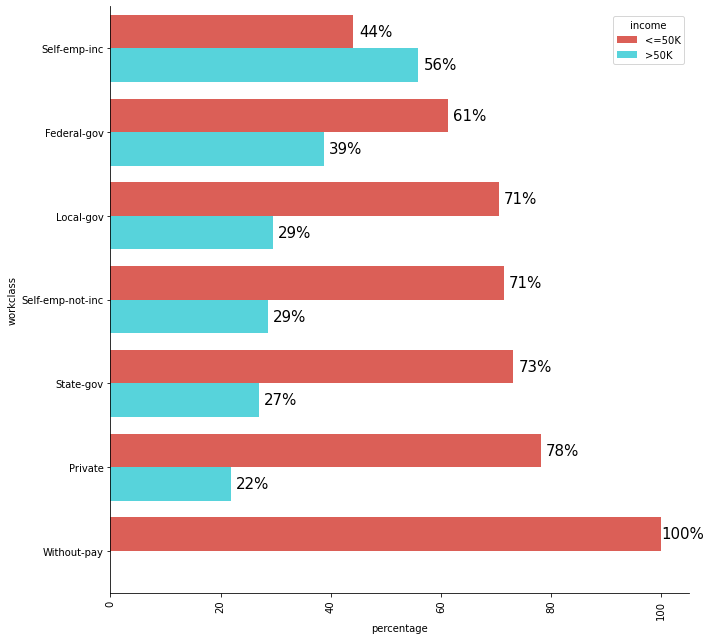

In [297]:
workclass_order = ['Self-emp-inc', 'Federal-gov', 'Local-gov', 'Self-emp-not-inc', 'State-gov', 'Private', 'Without-pay']
e = sns.catplot(kind='bar', x='percentage', y='workclass', hue='income', data=percentage_income_perworkclass,
                 legend=False, palette='hls', saturation=8, order=workclass_order)

for axes in e.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
    
    
# x = percentage_10nativecountry['native.country']
# y = percentage_10nativecountry['percentage']
# x_number = range(len(x))
# for i in x_number:
#     plt.text(x=x_number[i]-0.5, y=y[i]+6, s=y[i], size=13)
    

    
ax = e.facet_axis(0,0)
for p in ax.patches:
    width = p.get_width()
    plt.text(4+p.get_width(), p.get_y()+0.50*p.get_height(),
             '{0:.0f}'.format(width) + '%',
             ha='center', va='center', fontsize='15')   

    
e.fig.set_size_inches(10,9)
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=1, title='income')
plt.tight_layout()
# plt.savefig('occupation income.png')

In [298]:
df_workclass_percent = df_eda['workclass'].value_counts(normalize=True)
df_workclass_percent = df_workclass_percent.mul(100)
df_workclass_percent = df_workclass_percent.rename('percent').reset_index()
df_workclass_percent.rename(columns={'index':'workclass'}, 
                 inplace=True)
df_workclass_percent

workclass    percent
0           Private  73.871064
1  Self-emp-not-inc   8.288264
2         Local-gov   6.858224
3         State-gov   4.243671
4      Self-emp-inc   3.563489
5       Federal-gov   3.128836
6       Without-pay   0.046451

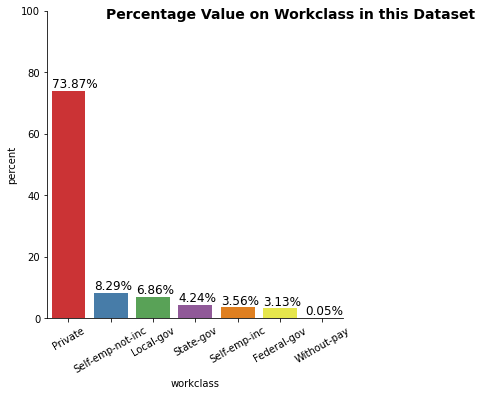

In [299]:
g = sns.catplot(x='workclass',y='percent', kind='bar',palette='Set1',data=df_workclass_percent)
g.set_xticklabels(rotation=30)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    g.fig.suptitle('Percentage Value on Workclass in this Dataset', fontsize=14, weight='bold',x=0.8)
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0
    txt_y = p.get_height() + 1
    g.ax.text(txt_x,txt_y,txt, size='large')

<b> Dataset ini didominasi workclass private </b>

In [300]:
df_work_private = df_eda[(df_eda['workclass'] == "Private")]

In [301]:
df_work_private['education_group'].value_counts()

HS-graduate    7672
Colleges       5008
Bachelors      3453
Dropout        3137
Associates     1713
Masters         862
Prof-school     247
Doctorate       172
Name: education_group, dtype: int64

In [302]:
df_w_priv_percent = df_work_private['education_group'].value_counts(normalize=True)
df_w_priv_percent = df_w_priv_percent.mul(100)
df_w_priv_percent = df_w_priv_percent.rename('percent').reset_index()
df_w_priv_percent.rename(columns={'index':'education'}, 
                 inplace=True)
df_w_priv_percent

education    percent
0  HS-graduate  34.459217
1     Colleges  22.493712
2    Bachelors  15.509342
3      Dropout  14.090011
4   Associates   7.694035
5      Masters   3.871721
6  Prof-school   1.109414
7    Doctorate   0.772548

In [303]:
df_o_priv_percent = df_work_private['occupation'].value_counts(normalize=True)
df_o_priv_percent = df_o_priv_percent.mul(100)
df_o_priv_percent = df_o_priv_percent.rename('percent').reset_index()
df_o_priv_percent.rename(columns={'index':'occupation'}, 
                 inplace=True)
df_o_priv_percent

occupation    percent
0        Craft-repair  14.112469
1               Sales  13.003054
2        Adm-clerical  12.535932
3       Other-service  11.956522
4     Exec-managerial  11.884657
5      Prof-specialty  10.106001
6   Machine-op-inspct   8.444125
7   Handlers-cleaners   5.632411
8    Transport-moving   5.600970
9        Tech-support   3.242903
10    Farming-fishing   2.012217
11    Protective-serv   0.835429
12    Priv-house-serv   0.633309

In [304]:
# df_age_middle.groupby('education_group').size().sort_values(ascending=False).reset_index(name='count')

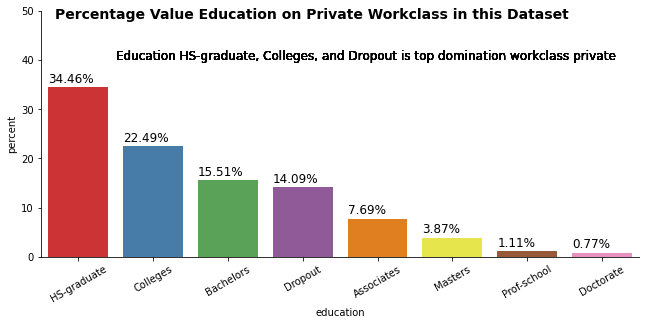

In [305]:
g = sns.catplot(x='education',y='percent', kind='bar',palette='Set1',data=df_w_priv_percent)
g.fig.set_size_inches(10,4)
g.set_xticklabels(rotation=30)
g.ax.set_ylim(0,50)

for p in g.ax.patches:
    g.fig.suptitle('Percentage Value Education on Private Workclass in this Dataset', fontsize=14, weight='bold',x=0.5)
    g.ax.text(s='Education HS-graduate, Colleges, and Dropout is top domination workclass private', y=40,x=0.5,size='large')
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0
    txt_y = p.get_height() + 1
    g.ax.text(txt_x,txt_y,txt, size='large')

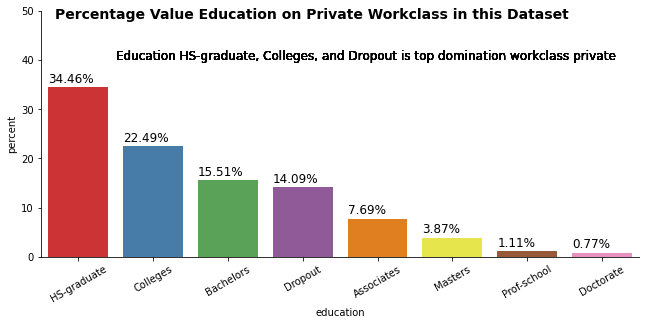

In [306]:
g = sns.catplot(x='education',y='percent', kind='bar',palette='Set1',data=df_w_priv_percent)
g.fig.set_size_inches(10,4)
g.set_xticklabels(rotation=30)
g.ax.set_ylim(0,50)

for p in g.ax.patches:
    g.fig.suptitle('Percentage Value Education on Private Workclass in this Dataset', fontsize=14, weight='bold',x=0.5)
    g.ax.text(s='Education HS-graduate, Colleges, and Dropout is top domination workclass private', y=40,x=0.5,size='large')
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0
    txt_y = p.get_height() + 1
    g.ax.text(txt_x,txt_y,txt, size='large')

<b> Kenapa Workclass Private kebanyakan memiliki income <=50K? </b>

<b> Karena swasta didominasi pendidikan HS-graduate, Colleges, dan Drop out yang notabene nya education tersebut memiliki income <=50K </b>

### Analisis Workclass dengan Income 

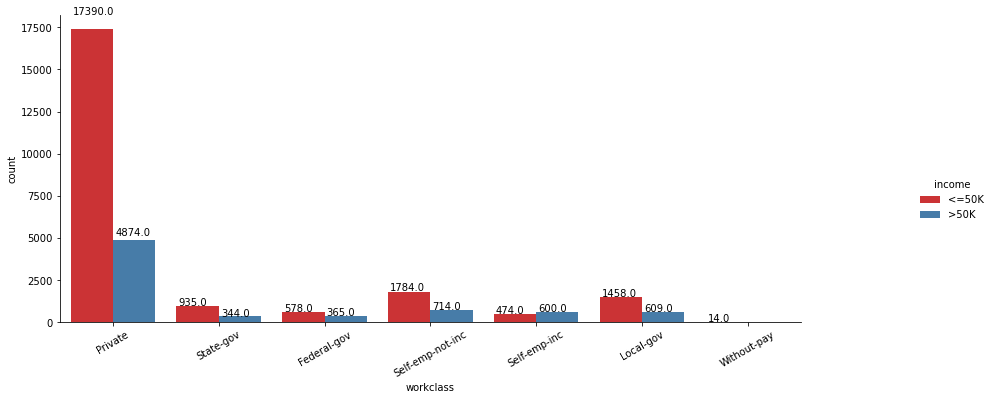

In [307]:
plot = sns.catplot(x="workclass", hue="income", kind="count", palette="Set1", data=df_eda)
plot.set_xticklabels(rotation=30)
plot.fig.set_size_inches(15,5)
for i in np.arange(1):
        ax1 = plot.facet_axis(0,i)
        for p in ax1.patches:
            if str(p.get_height()) != 'nan':
                ax1.text(p.get_x() + 0.02, p.get_height() * 1.05, p.get_height(), color='black', rotation='horizontal', size='medium')

In [308]:
x,y = 'workclass', 'income'

df_workclass_percent = df_eda.groupby(x)[y].value_counts(normalize=True)
df_workclass_percent = df_workclass_percent.mul(100)
df_workclass_percent = df_workclass_percent.rename('percent').reset_index()
df_workclass_percent

workclass income     percent
0        Federal-gov  <=50K   61.293743
1        Federal-gov   >50K   38.706257
2          Local-gov  <=50K   70.537010
3          Local-gov   >50K   29.462990
4            Private  <=50K   78.108157
5            Private   >50K   21.891843
6       Self-emp-inc   >50K   55.865922
7       Self-emp-inc  <=50K   44.134078
8   Self-emp-not-inc  <=50K   71.417134
9   Self-emp-not-inc   >50K   28.582866
10         State-gov  <=50K   73.103987
11         State-gov   >50K   26.896013
12       Without-pay  <=50K  100.000000

posx and posy should be finite values
posx and posy should be finite values


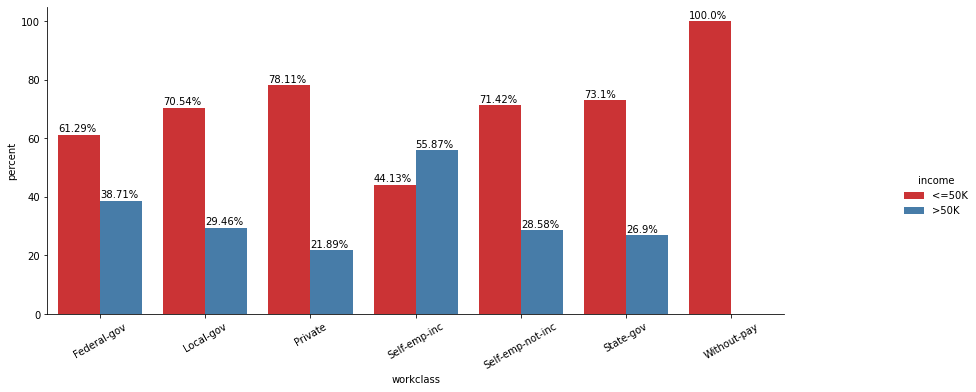

In [309]:
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',palette='Set1',data=df_workclass_percent)
g.set_xticklabels(rotation=30)
g.fig.set_size_inches(15,5)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height() + 1
    g.ax.text(txt_x,txt_y,txt)

<b> Hanya workclass kategori Self-emp-inc yang mendapatkan income >50K lebih besar dari income <=50K </b>

<b> Workclass kategori Private yang notabene nya mendominasi dataset ini lebih banyak mendapatkan income <=50K daripada income >50K </b>

### Workclass, Education, Income

In [310]:
workclass_age_group = df_eda.groupby(['workclass', 'age_group', 'income']).agg({'income':'count'})
workclass_age_group = workclass_age_group.groupby(level=[0,1]).transform(lambda x: (x / x.sum()).round(4) *100)
workclass_age_group = workclass_age_group.rename(columns={'income':'percentage'}).reset_index()
workclass_age_group

workclass age_group income  percentage
0        Federal-gov    Middle  <=50K       63.31
1        Federal-gov    Middle   >50K       36.69
2        Federal-gov       Old  <=50K       80.00
3        Federal-gov       Old   >50K       20.00
4        Federal-gov    Senior  <=50K       50.69
5        Federal-gov    Senior   >50K       49.31
6        Federal-gov     Young  <=50K       98.48
7        Federal-gov     Young   >50K        1.52
8          Local-gov    Middle  <=50K       70.57
9          Local-gov    Middle   >50K       29.43
10         Local-gov       Old  <=50K       86.15
11         Local-gov       Old   >50K       13.85
12         Local-gov    Senior  <=50K       62.18
13         Local-gov    Senior   >50K       37.82
14         Local-gov     Young  <=50K       96.24
15         Local-gov     Young   >50K        3.76
16           Private    Middle  <=50K       74.69
17           Private    Middle   >50K       25.31
18           Private       Old  <=50K       82.28
19           Private       Old   >50K       17.72
20           Private    Senior  <=50K       65.62
21           Private    Senior   >50K       34.38
22           Private     Young  <=50K       98.31
23           Private     Young   >50K        1.69
24      Self-emp-inc    Middle  <=50K       48.77
25      Self-emp-inc    Middle   >50K       51.23
26      Self-emp-inc       Old  <=50K       42.31
27      Self-emp-inc       Old   >50K       57.69
28      Self-emp-inc    Senior  <=50K       34.57
29      Self-emp-inc    Senior   >50K       65.43
30      Self-emp-inc     Young  <=50K       91.67
31      Self-emp-inc     Young   >50K        8.33
32  Self-emp-not-inc    Middle  <=50K       72.68
33  Self-emp-not-inc    Middle   >50K       27.32
34  Self-emp-not-inc       Old  <=50K       77.42
35  Self-emp-not-inc       Old   >50K       22.58
36  Self-emp-not-inc    Senior  <=50K       65.67
37  Self-emp-not-inc    Senior   >50K       34.33
38  Self-emp-not-inc     Young  <=50K       92.31
39  Self-emp-not-inc     Young   >50K        7.69
40         State-gov    Middle  <=50K       74.45
41         State-gov    Middle   >50K       25.55
42         State-gov       Old  <=50K       72.41
43         State-gov       Old   >50K       27.59
44         State-gov    Senior  <=50K       56.75
45         State-gov    Senior   >50K       43.25
46         State-gov     Young  <=50K       98.02
47         State-gov     Young   >50K        1.98
48       Without-pay    Middle  <=50K      100.00
49       Without-pay       Old  <=50K      100.00
50       Without-pay    Senior  <=50K      100.00
51       Without-pay     Young  <=50K      100.00

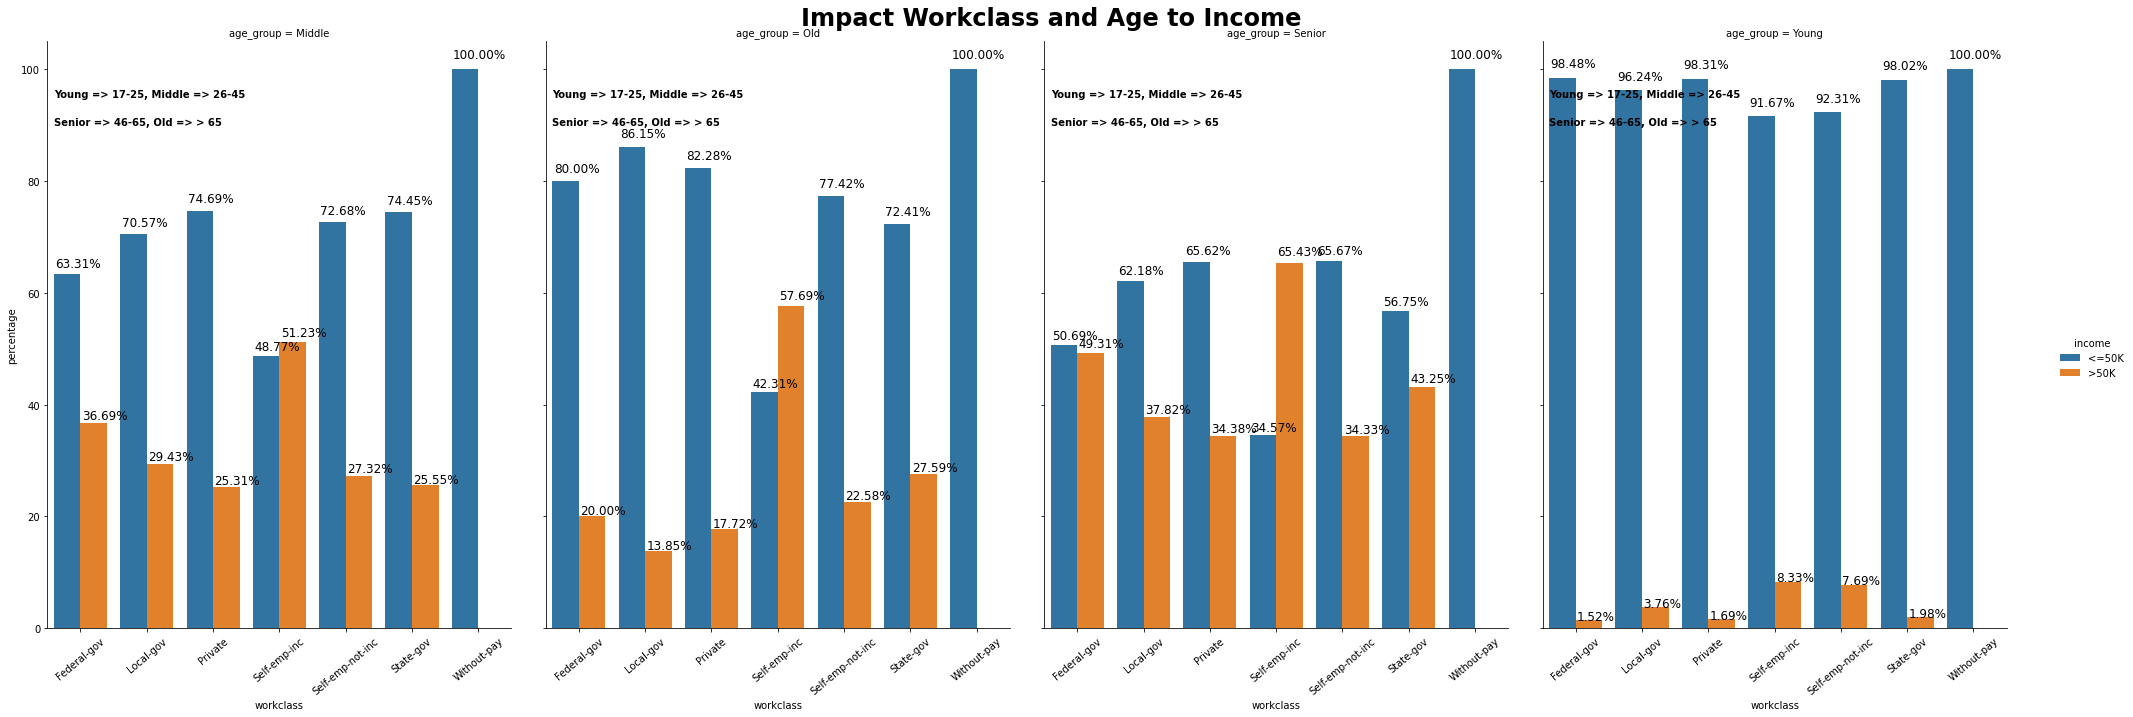

In [311]:
plot1 = sns.catplot(y='percentage', x='workclass', col='age_group', hue='income', 
            data=workclass_age_group, kind='bar')
plot1.set_xticklabels(rotation=30)

plot1.fig.set_size_inches(30,10)
plot1.fig.suptitle('Impact Workclass and Age to Income', fontsize=24, weight='bold')
for i in np.arange(4):
        ax1 = plot1.facet_axis(0,i)
        ax1.text(x=-0.4, y=95, s='Young => 17-25, Middle => 26-45', weight='bold')
        ax1.text(x=-0.4, y=90, s='Senior => 46-65, Old => > 65', weight='bold')
        for p in ax1.patches:
            ax1.set_xticklabels(ax1.get_xticklabels(),rotation=40)
            if str(p.get_height()) != 'nan':
                ax1.text(p.get_x() + 0.02, p.get_height() * 1.02, '{0:.2f}%'.format(p.get_height()), color='black', rotation='horizontal', size='large')

<b> Workclass Self-emp-inc lebih besar mendapatkan income >50K dari income <=50K, tetapi tidak untuk kategori umur young </b>

In [312]:
workclass_education_group = df_eda.groupby(['workclass', 'education', 'income']).agg({'income':'count'})
workclass_education_group = workclass_education_group.groupby(level=[0,1]).transform(lambda x: (x / x.sum()).round(4) *100)
workclass_education_group = workclass_education_group.rename(columns={'income':'percentage'}).reset_index()
workclass_education_group

workclass     education income  percentage
0    Federal-gov          10th  <=50K      100.00
1    Federal-gov          11th  <=50K       88.89
2    Federal-gov          11th   >50K       11.11
3    Federal-gov          12th  <=50K      100.00
4    Federal-gov       5th-6th  <=50K      100.00
..           ...           ...    ...         ...
168    State-gov  Some-college   >50K        9.72
169  Without-pay       7th-8th  <=50K      100.00
170  Without-pay    Assoc-acdm  <=50K      100.00
171  Without-pay       HS-grad  <=50K      100.00
172  Without-pay  Some-college  <=50K      100.00

[173 rows x 4 columns]

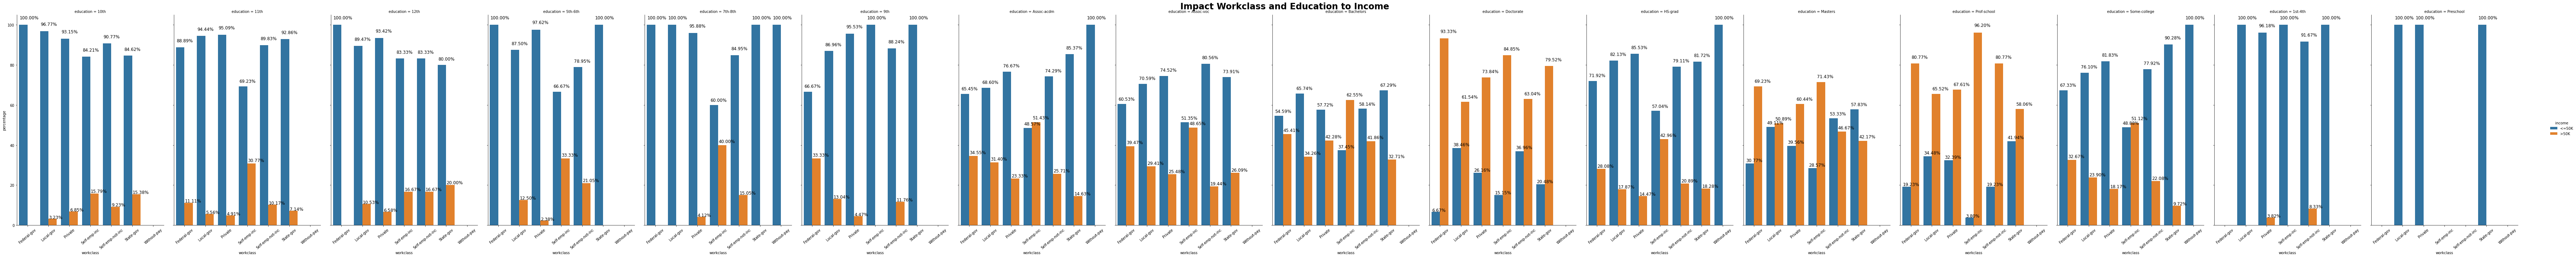

In [313]:
plot1 = sns.catplot(y='percentage', x='workclass', col='education', hue='income', 
            data=workclass_education_group, kind='bar')
plot1.set_xticklabels(rotation=30)

plot1.fig.set_size_inches(100,10)
plot1.fig.suptitle('Impact Workclass and Education to Income', fontsize=24, weight='bold')
for i in np.arange(16):
        ax1 = plot1.facet_axis(0,i)
        for p in ax1.patches:
            ax1.set_xticklabels(ax1.get_xticklabels(),rotation=40)
            if str(p.get_height()) != 'nan':
                ax1.text(p.get_x() + 0.02, p.get_height() * 1.03, '{0:.2f}%'.format(p.get_height()), color='black', rotation='horizontal', size='large')

<b> Workclass self-emp-inc mendominasi mendapatkan income >50K lebih besar yaitu dengan kategori education assoc-acdm, bachelor, doctorate, masters,prof-school, some-college </b> 

<b> Workclass private mendapatkan income >50K lebih besar yaitu pada kategori education Masters, Doctorate, Prof-school </b>

### Workclass, Occupation, Income

In [314]:
workclass_occupation_group = df_eda.groupby(['workclass', 'occupation', 'income']).agg({'income':'count'})
workclass_occupation_group = workclass_occupation_group.groupby(level=[0,1]).transform(lambda x: (x / x.sum()).round(4) *100)
workclass_occupation_group = workclass_occupation_group.rename(columns={'income':'percentage'}).reset_index()
workclass_occupation_group

workclass         occupation income  percentage
0    Federal-gov       Adm-clerical  <=50K       68.04
1    Federal-gov       Adm-clerical   >50K       31.96
2    Federal-gov       Armed-Forces  <=50K       88.89
3    Federal-gov       Armed-Forces   >50K       11.11
4    Federal-gov       Craft-repair  <=50K       66.67
..           ...                ...    ...         ...
149  Without-pay    Farming-fishing  <=50K      100.00
150  Without-pay  Handlers-cleaners  <=50K      100.00
151  Without-pay  Machine-op-inspct  <=50K      100.00
152  Without-pay      Other-service  <=50K      100.00
153  Without-pay   Transport-moving  <=50K      100.00

[154 rows x 4 columns]

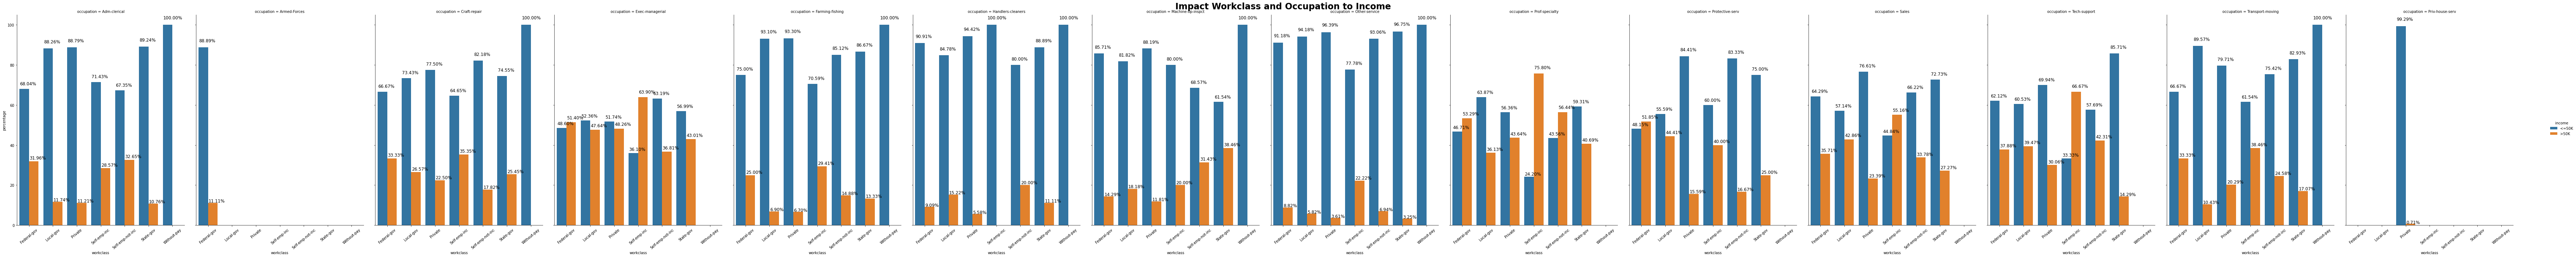

In [315]:
plot1 = sns.catplot(y='percentage', x='workclass', col='occupation', hue='income', 
            data=workclass_occupation_group, kind='bar')
plot1.set_xticklabels(rotation=30)

plot1.fig.set_size_inches(100,10)
plot1.fig.suptitle('Impact Workclass and Occupation to Income', fontsize=24, weight='bold')
for i in np.arange(14):
        ax1 = plot1.facet_axis(0,i)
        for p in ax1.patches:
            ax1.set_xticklabels(ax1.get_xticklabels(),rotation=40)
            if str(p.get_height()) != 'nan':
                ax1.text(p.get_x() + 0.02, p.get_height() * 1.03, '{0:.2f}%'.format(p.get_height()), color='black', rotation='horizontal', size='large')

<b> Occupation prof-speciality pada self-emp-inc,self-emp-not-inc, federal-gov mendapatkan persentase besar untuk income >50K </b>

<b> Occupation exec-managerial pada self-emp-inc, federal-gov mendapatkan persentasi besar untuk income >50K </b>

<b> Self-emp-inc mendominasi mendapatakan income >50K daripada workclass lainnya </b>

### Workclass, Hours per week, Income

In [316]:
workclass_hoursperweek_group = df_eda.groupby(['workclass', 'hours_per_week_group', 'income']).agg({'income':'count'})
workclass_hoursperweek_group = workclass_hoursperweek_group.groupby(level=[0,1]).transform(lambda x: (x / x.sum()).round(4) *100)
workclass_hoursperweek_group = workclass_hoursperweek_group.rename(columns={'income':'percentage'}).reset_index()
workclass_hoursperweek_group

workclass hours_per_week_group income  percentage
0        Federal-gov            Full-time  <=50K       63.93
1        Federal-gov            Full-time   >50K       36.07
2        Federal-gov            Over-time  <=50K       43.43
3        Federal-gov            Over-time   >50K       56.57
4        Federal-gov            Part-time  <=50K       90.91
5        Federal-gov            Part-time   >50K        9.09
6        Federal-gov             Too-much  <=50K       58.82
7        Federal-gov             Too-much   >50K       41.18
8          Local-gov            Full-time  <=50K       72.61
9          Local-gov            Full-time   >50K       27.39
10         Local-gov            Over-time  <=50K       58.85
11         Local-gov            Over-time   >50K       41.15
12         Local-gov            Part-time  <=50K       92.77
13         Local-gov            Part-time   >50K        7.23
14         Local-gov             Too-much  <=50K       60.34
15         Local-gov             Too-much   >50K       39.66
16           Private            Full-time  <=50K       82.76
17           Private            Full-time   >50K       17.24
18           Private            Over-time  <=50K       60.99
19           Private            Over-time   >50K       39.01
20           Private            Part-time  <=50K       95.66
21           Private            Part-time   >50K        4.34
22           Private             Too-much  <=50K       63.60
23           Private             Too-much   >50K       36.40
24      Self-emp-inc            Full-time  <=50K       50.57
25      Self-emp-inc            Full-time   >50K       49.43
26      Self-emp-inc            Over-time  <=50K       37.82
27      Self-emp-inc            Over-time   >50K       62.18
28      Self-emp-inc            Part-time  <=50K       69.81
29      Self-emp-inc            Part-time   >50K       30.19
30      Self-emp-inc             Too-much  <=50K       42.86
31      Self-emp-inc             Too-much   >50K       57.14
32  Self-emp-not-inc            Full-time  <=50K       75.57
33  Self-emp-not-inc            Full-time   >50K       24.43
34  Self-emp-not-inc            Over-time  <=50K       63.87
35  Self-emp-not-inc            Over-time   >50K       36.13
36  Self-emp-not-inc            Part-time  <=50K       80.98
37  Self-emp-not-inc            Part-time   >50K       19.02
38  Self-emp-not-inc             Too-much  <=50K       71.65
39  Self-emp-not-inc             Too-much   >50K       28.35
40         State-gov            Full-time  <=50K       76.18
41         State-gov            Full-time   >50K       23.82
42         State-gov            Over-time  <=50K       46.64
43         State-gov            Over-time   >50K       53.36
44         State-gov            Part-time  <=50K       95.91
45         State-gov            Part-time   >50K        4.09
46         State-gov             Too-much  <=50K       56.76
47         State-gov             Too-much   >50K       43.24
48       Without-pay            Full-time  <=50K      100.00
49       Without-pay            Over-time  <=50K      100.00
50       Without-pay            Part-time  <=50K      100.00
51       Without-pay             Too-much  <=50K      100.00

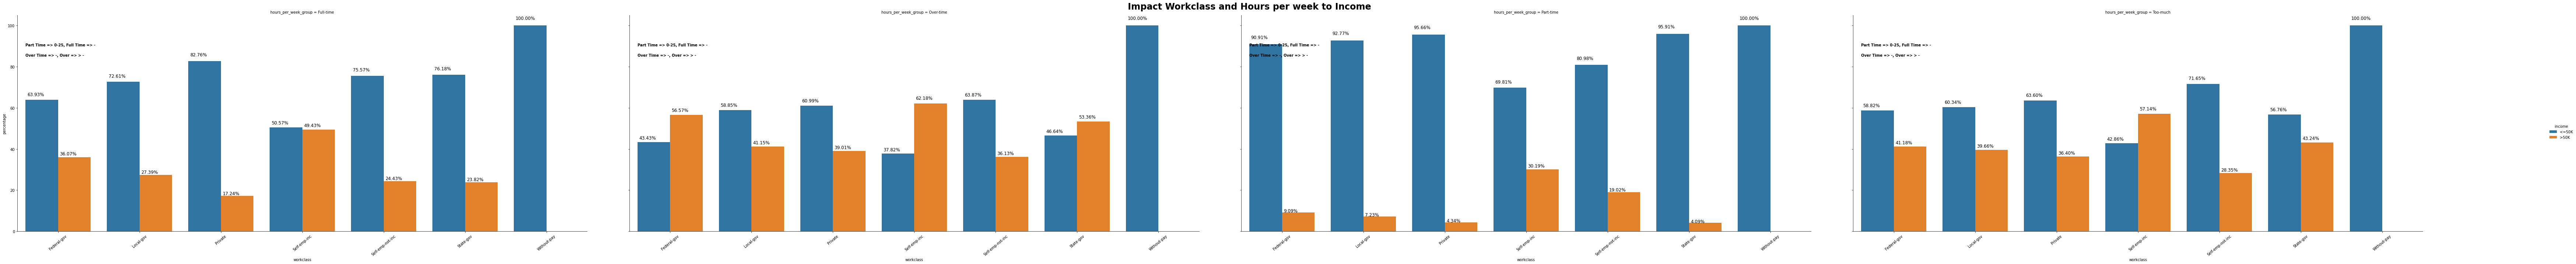

In [317]:
plot1 = sns.catplot(y='percentage', x='workclass', col='hours_per_week_group', hue='income', 
            data=workclass_hoursperweek_group, kind='bar')
plot1.set_xticklabels(rotation=30)

plot1.fig.set_size_inches(100,10)
plot1.fig.suptitle('Impact Workclass and Hours per week to Income', fontsize=24, weight='bold')
for i in np.arange(4):
        ax1 = plot1.facet_axis(0,i)
        ax1.text(x=-0.4, y=90, s='Part Time => 0-25, Full Time => -', weight='bold')
        ax1.text(x=-0.4, y=85, s='Over Time => -, Over => > -', weight='bold')
        for p in ax1.patches:
            ax1.set_xticklabels(ax1.get_xticklabels(),rotation=40)
            if str(p.get_height()) != 'nan':
                ax1.text(p.get_x() + 0.02, p.get_height() * 1.03, '{0:.2f}%'.format(p.get_height()), color='black', rotation='horizontal', size='large')

<b> Paling banyak mendapatkan persentase income >50K dari hours per week kategori overtime, ada 3 workclass yaitu federal-gov, self-emp-in, state-gov </b>

#### Workclass, Sex, Income

In [318]:
workclass_sex_group = df_eda.groupby(['workclass', 'sex', 'income']).agg({'income':'count'})
workclass_sex_group = workclass_sex_group.groupby(level=[0,1]).transform(lambda x: (x / x.sum()).round(4) *100)
workclass_sex_group = workclass_sex_group.rename(columns={'income':'percentage'}).reset_index()
workclass_sex_group

workclass     sex income  percentage
0        Federal-gov  Female  <=50K       82.20
1        Federal-gov  Female   >50K       17.80
2        Federal-gov    Male  <=50K       51.10
3        Federal-gov    Male   >50K       48.90
4          Local-gov  Female  <=50K       81.55
5          Local-gov  Female   >50K       18.45
6          Local-gov    Male  <=50K       63.23
7          Local-gov    Male   >50K       36.77
8            Private  Female  <=50K       90.55
9            Private  Female   >50K        9.45
10           Private    Male  <=50K       71.62
11           Private    Male   >50K       28.38
12      Self-emp-inc  Female  <=50K       69.84
13      Self-emp-inc  Female   >50K       30.16
14      Self-emp-inc    Male  <=50K       40.72
15      Self-emp-inc    Male   >50K       59.28
16  Self-emp-not-inc  Female  <=50K       79.59
17  Self-emp-not-inc  Female   >50K       20.41
18  Self-emp-not-inc    Male  <=50K       69.90
19  Self-emp-not-inc    Male   >50K       30.10
20         State-gov  Female  <=50K       86.36
21         State-gov  Female   >50K       13.64
22         State-gov    Male  <=50K       65.03
23         State-gov    Male   >50K       34.97
24       Without-pay  Female  <=50K      100.00
25       Without-pay    Male  <=50K      100.00

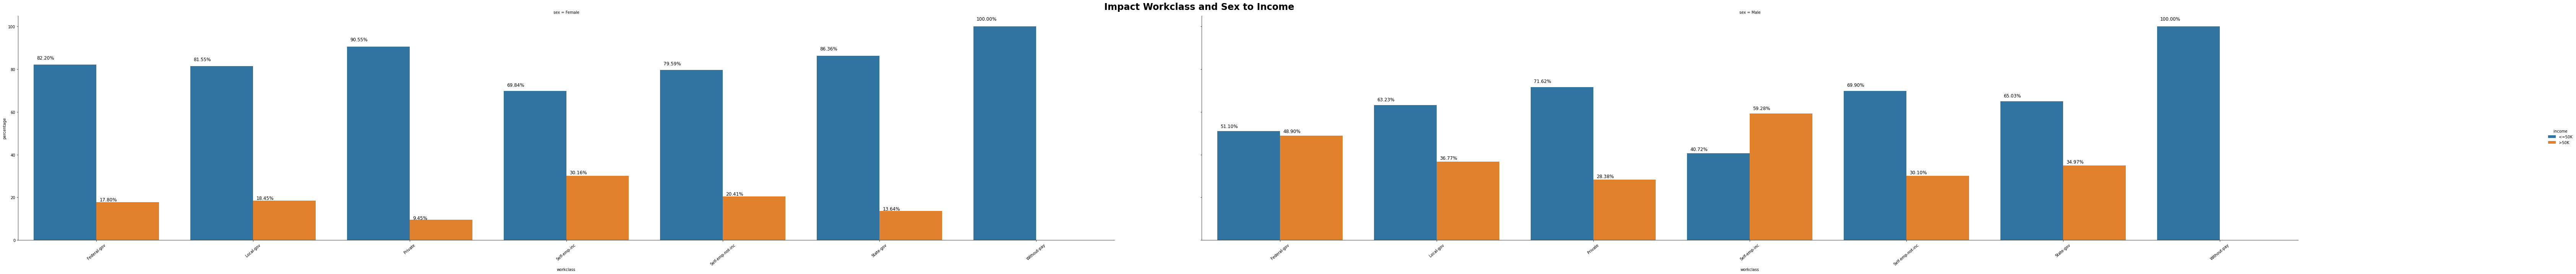

In [319]:
plot1 = sns.catplot(y='percentage', x='workclass', col='sex', hue='income', 
            data=workclass_sex_group, kind='bar')
plot1.set_xticklabels(rotation=30)

plot1.fig.set_size_inches(100,10)
plot1.fig.suptitle('Impact Workclass and Sex to Income', fontsize=24, weight='bold')
for i in np.arange(2):
        ax1 = plot1.facet_axis(0,i)
        for p in ax1.patches:
            ax1.set_xticklabels(ax1.get_xticklabels(),rotation=40)
            if str(p.get_height()) != 'nan':
                ax1.text(p.get_x() + 0.02, p.get_height() * 1.03, '{0:.2f}%'.format(p.get_height()), color='black', rotation='horizontal', size='large')

<b> Hanya yang mendapatkan income >50K lebih besar dari income <=50K yaitu Sex male dan self-emp-inc </b>

### Workclass, Race, Income

In [320]:
workclass_race_group = df_eda.groupby(['workclass', 'race', 'income']).agg({'income':'count'})
workclass_race_group = workclass_race_group.groupby(level=[0,1]).transform(lambda x: (x / x.sum()).round(4) *100)
workclass_race_group = workclass_race_group.rename(columns={'income':'percentage'}).reset_index()
workclass_race_group

workclass                race income  percentage
0   Federal-gov  Amer-Indian-Eskimo  <=50K       89.47
1   Federal-gov  Amer-Indian-Eskimo   >50K       10.53
2   Federal-gov  Asian-Pac-Islander  <=50K       52.50
3   Federal-gov  Asian-Pac-Islander   >50K       47.50
4   Federal-gov               Black  <=50K       77.98
..          ...                 ...    ...         ...
57    State-gov               White  <=50K       71.43
58    State-gov               White   >50K       28.57
59  Without-pay  Asian-Pac-Islander  <=50K      100.00
60  Without-pay               Black  <=50K      100.00
61  Without-pay               White  <=50K      100.00

[62 rows x 4 columns]

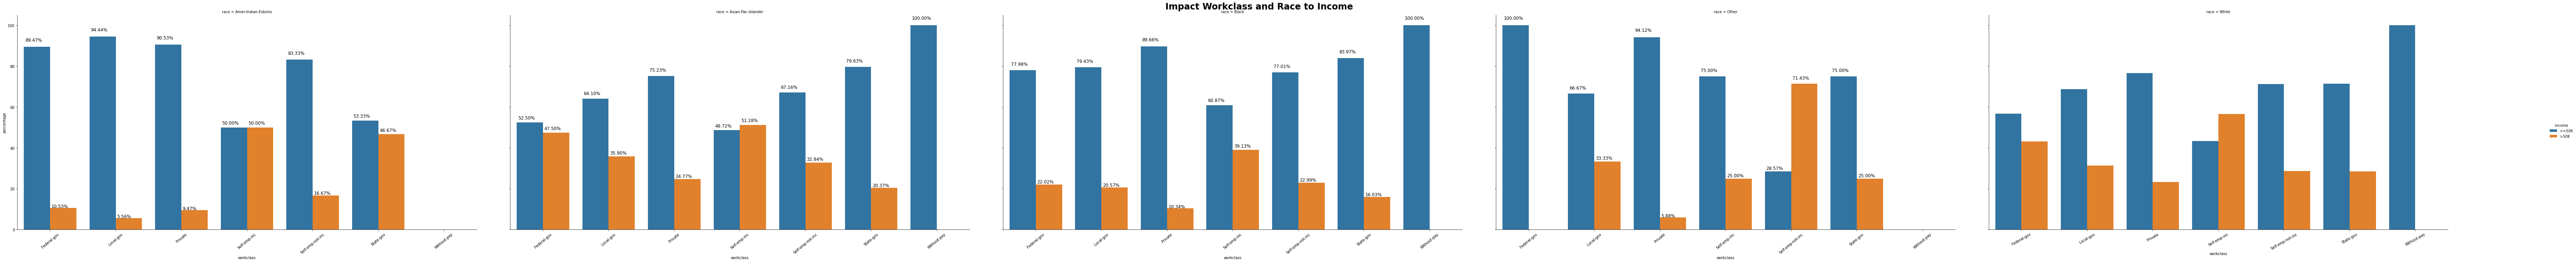

In [321]:
plot1 = sns.catplot(y='percentage', x='workclass', col='race', hue='income', 
            data=workclass_race_group, kind='bar')
plot1.set_xticklabels(rotation=30)

plot1.fig.set_size_inches(100,10)
plot1.fig.suptitle('Impact Workclass and Race to Income', fontsize=24, weight='bold')
for i in np.arange(4):
        ax1 = plot1.facet_axis(0,i)
        for p in ax1.patches:
            ax1.set_xticklabels(ax1.get_xticklabels(),rotation=40)
            if str(p.get_height()) != 'nan':
                ax1.text(p.get_x() + 0.02, p.get_height() * 1.03, '{0:.2f}%'.format(p.get_height()), color='black', rotation='horizontal', size='large')

### Workclass, Capital gain, Income

In [322]:
workclass_capitalgain_group = df_eda.groupby(['workclass', 'capital_gain_group', 'income']).agg({'income':'count'})
workclass_capitalgain_group = workclass_capitalgain_group.groupby(level=[0,1]).transform(lambda x: (x / x.sum()).round(4) *100)
workclass_capitalgain_group = workclass_capitalgain_group.rename(columns={'income':'percentage'}).reset_index()
workclass_capitalgain_group

workclass capital_gain_group income  percentage
0        Federal-gov               High  <=50K       12.33
1        Federal-gov               High   >50K       87.67
2        Federal-gov                Low  <=50K       95.00
3        Federal-gov                Low   >50K        5.00
4        Federal-gov               None  <=50K       64.71
5        Federal-gov               None   >50K       35.29
6          Local-gov               High  <=50K       15.56
7          Local-gov               High   >50K       84.44
8          Local-gov                Low  <=50K       96.30
9          Local-gov                Low   >50K        3.70
10         Local-gov               None  <=50K       73.75
11         Local-gov               None   >50K       26.25
12           Private               High  <=50K       15.27
13           Private               High   >50K       84.73
14           Private                Low  <=50K       87.99
15           Private                Low   >50K       12.01
16           Private               None  <=50K       81.25
17           Private               None   >50K       18.75
18      Self-emp-inc               High  <=50K        4.09
19      Self-emp-inc               High   >50K       95.91
20      Self-emp-inc                Low  <=50K       84.21
21      Self-emp-inc                Low   >50K       15.79
22      Self-emp-inc               None  <=50K       51.02
23      Self-emp-inc               None   >50K       48.98
24  Self-emp-not-inc               High  <=50K       10.98
25  Self-emp-not-inc               High   >50K       89.02
26  Self-emp-not-inc                Low  <=50K       88.37
27  Self-emp-not-inc                Low   >50K       11.63
28  Self-emp-not-inc               None  <=50K       75.44
29  Self-emp-not-inc               None   >50K       24.56
30         State-gov               High  <=50K       12.68
31         State-gov               High   >50K       87.32
32         State-gov                Low  <=50K       93.55
33         State-gov                Low   >50K        6.45
34         State-gov               None  <=50K       76.21
35         State-gov               None   >50K       23.79
36       Without-pay               High  <=50K      100.00
37       Without-pay                Low  <=50K      100.00
38       Without-pay               None  <=50K      100.00

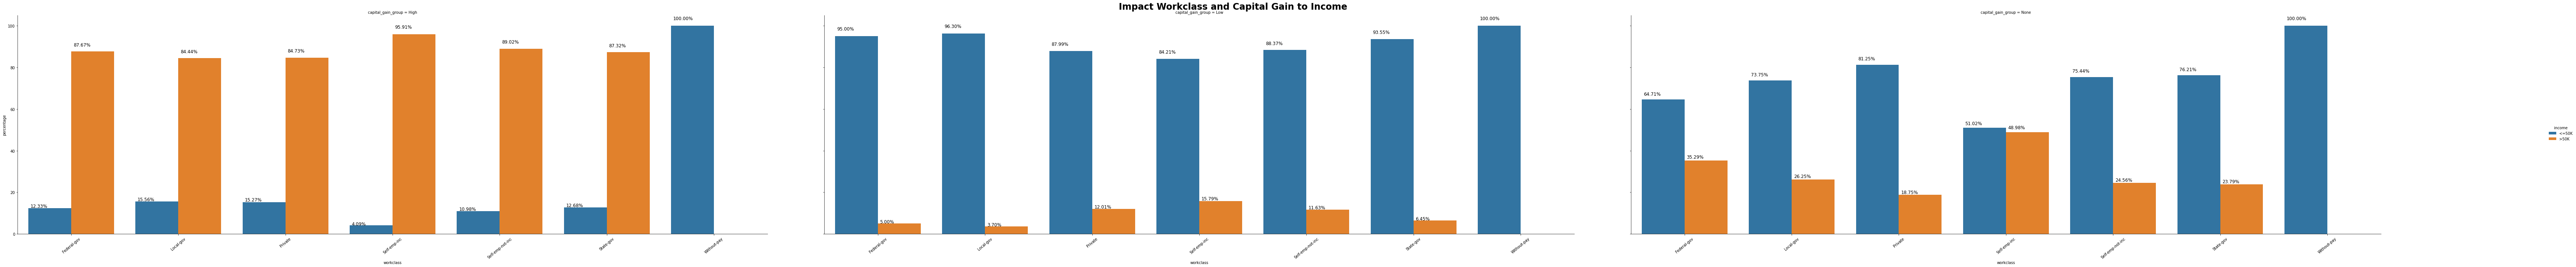

In [323]:
plot1 = sns.catplot(y='percentage', x='workclass', col='capital_gain_group', hue='income', 
            data=workclass_capitalgain_group, kind='bar')
plot1.set_xticklabels(rotation=30)

plot1.fig.set_size_inches(100,10)
plot1.fig.suptitle('Impact Workclass and Capital Gain to Income', fontsize=24, weight='bold')
for i in np.arange(3):
        ax1 = plot1.facet_axis(0,i)
        for p in ax1.patches:
            ax1.set_xticklabels(ax1.get_xticklabels(),rotation=40)
            if str(p.get_height()) != 'nan':
                ax1.text(p.get_x() + 0.02, p.get_height() * 1.03, '{0:.2f}%'.format(p.get_height()), color='black', rotation='horizontal', size='large')

<b> Capital gain High </b>

### Workclass, Capital loss, Income 

In [324]:
workclass_capitalloss_group = df_eda.groupby(['workclass', 'capital_loss_group', 'income']).agg({'income':'count'})
workclass_capitalloss_group = workclass_capitalloss_group.groupby(level=[0,1]).transform(lambda x: (x / x.sum()).round(4) *100)
workclass_capitalloss_group = workclass_capitalloss_group.rename(columns={'income':'percentage'}).reset_index()
workclass_capitalloss_group

workclass capital_loss_group income  percentage
0        Federal-gov                Low  <=50K       52.63
1        Federal-gov                Low   >50K       47.37
2        Federal-gov               None  <=50K       61.85
3        Federal-gov               None   >50K       38.15
4          Local-gov                Low  <=50K       53.97
5          Local-gov                Low   >50K       46.03
6          Local-gov               None  <=50K       71.61
7          Local-gov               None   >50K       28.39
8            Private               High  <=50K      100.00
9            Private                Low  <=50K       51.62
10           Private                Low   >50K       48.38
11           Private               None  <=50K       79.30
12           Private               None   >50K       20.70
13      Self-emp-inc                Low  <=50K       17.50
14      Self-emp-inc                Low   >50K       82.50
15      Self-emp-inc               None  <=50K       46.28
16      Self-emp-inc               None   >50K       53.72
17  Self-emp-not-inc                Low  <=50K       39.86
18  Self-emp-not-inc                Low   >50K       60.14
19  Self-emp-not-inc               None  <=50K       73.40
20  Self-emp-not-inc               None   >50K       26.60
21         State-gov                Low  <=50K       41.07
22         State-gov                Low   >50K       58.93
23         State-gov               None  <=50K       74.57
24         State-gov               None   >50K       25.43
25       Without-pay               None  <=50K      100.00

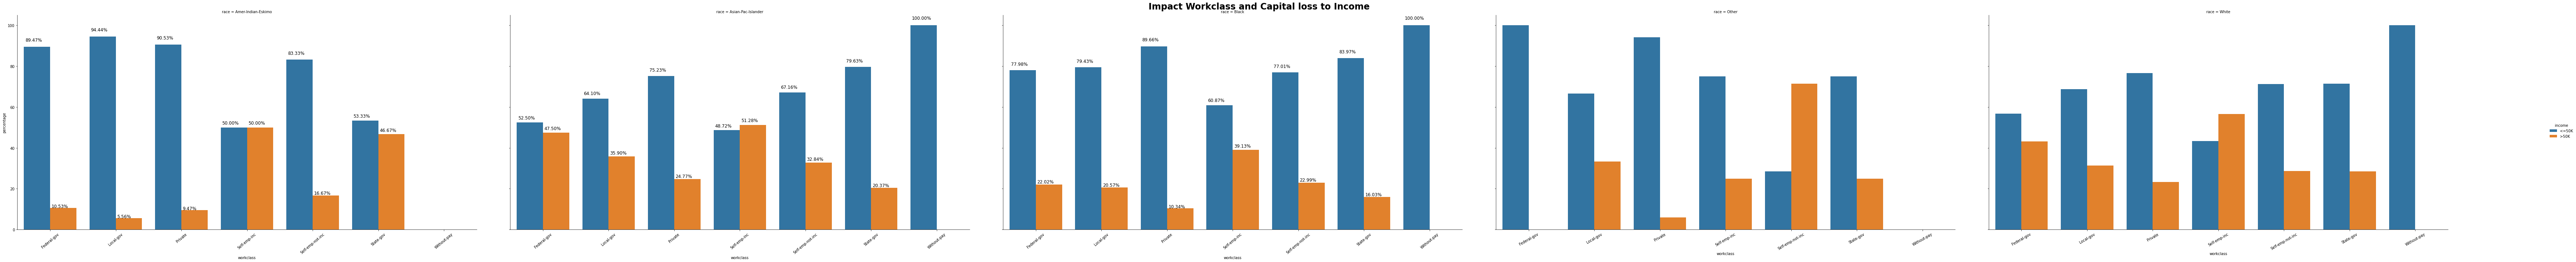

In [325]:
plot1 = sns.catplot(y='percentage', x='workclass', col='race', hue='income', 
            data=workclass_race_group, kind='bar')
plot1.set_xticklabels(rotation=30)

plot1.fig.set_size_inches(100,10)
plot1.fig.suptitle('Impact Workclass and Capital loss to Income', fontsize=24, weight='bold')
for i in np.arange(3):
        ax1 = plot1.facet_axis(0,i)
        for p in ax1.patches:
            ax1.set_xticklabels(ax1.get_xticklabels(),rotation=40)
            if str(p.get_height()) != 'nan':
                ax1.text(p.get_x() + 0.02, p.get_height() * 1.03, '{0:.2f}%'.format(p.get_height()), color='black', rotation='horizontal', size='large')

### Workclass, Native country, Income

In [326]:
workclass_nativecountry_group = df_eda.groupby(['workclass', 'native_country_group', 'income']).agg({'income':'count'})
workclass_nativecountry_group = workclass_nativecountry_group.groupby(level=[0,1]).transform(lambda x: (x / x.sum()).round(4) *100)
workclass_nativecountry_group = workclass_nativecountry_group.rename(columns={'income':'percentage'}).reset_index()
workclass_nativecountry_group

workclass  native_country_group income  percentage
0   Federal-gov               America  <=50K       70.59
1   Federal-gov               America   >50K       29.41
2   Federal-gov                  Asia  <=50K       80.00
3   Federal-gov                  Asia   >50K       20.00
4   Federal-gov  British-Commonwealth  <=50K       37.50
..          ...                   ...    ...         ...
77    State-gov               SE-Asia  <=50K      100.00
78    State-gov         United-States  <=50K       73.06
79    State-gov         United-States   >50K       26.94
80  Without-pay               SE-Asia  <=50K      100.00
81  Without-pay         United-States  <=50K      100.00

[82 rows x 4 columns]

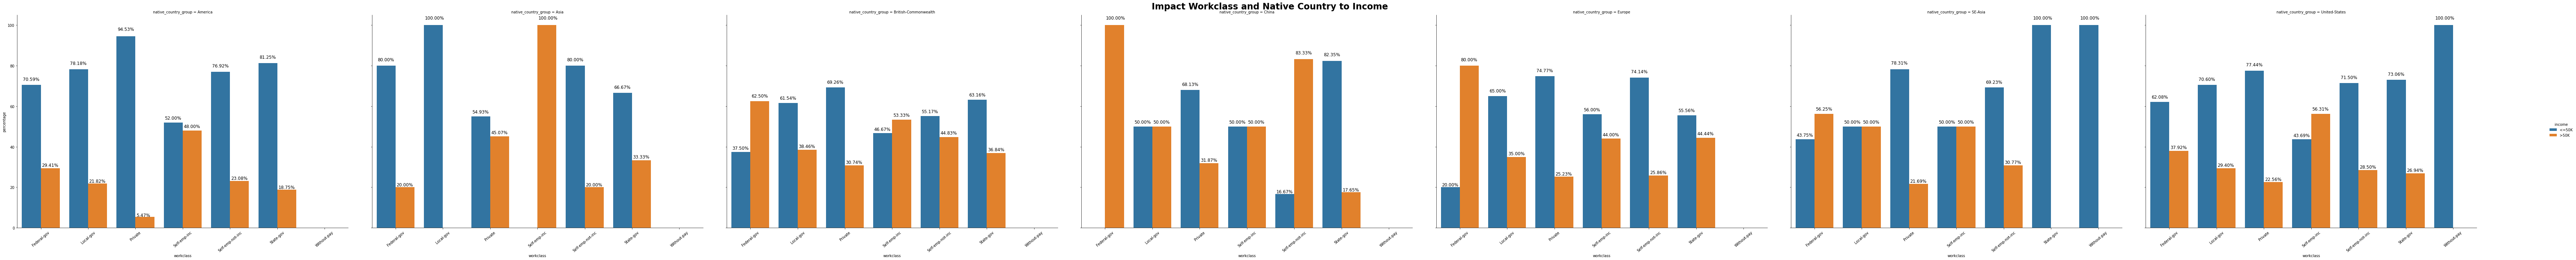

In [327]:
plot1 = sns.catplot(y='percentage', x='workclass', col='native_country_group', hue='income', 
            data=workclass_nativecountry_group, kind='bar')
plot1.set_xticklabels(rotation=30)

plot1.fig.set_size_inches(100,10)
plot1.fig.suptitle('Impact Workclass and Native Country to Income', fontsize=24, weight='bold')
for i in np.arange(7):
        ax1 = plot1.facet_axis(0,i)
        for p in ax1.patches:
            ax1.set_xticklabels(ax1.get_xticklabels(),rotation=40)
            if str(p.get_height()) != 'nan':
                ax1.text(p.get_x() + 0.02, p.get_height() * 1.03, '{0:.2f}%'.format(p.get_height()), color='black', rotation='horizontal', size='large')

<b> Asia dengan self-emp-inc, British-commonwealth dengan federal-gov dan self-emp-inc, China dengan federal-gov, self-emp-not-inc, Europe dengan Federal-gov, SE-Asia denagn Federal-Gov, US dengan self-emp-inc </b>

Text(0.5, 1.0, 'Income Rate by Workclass')

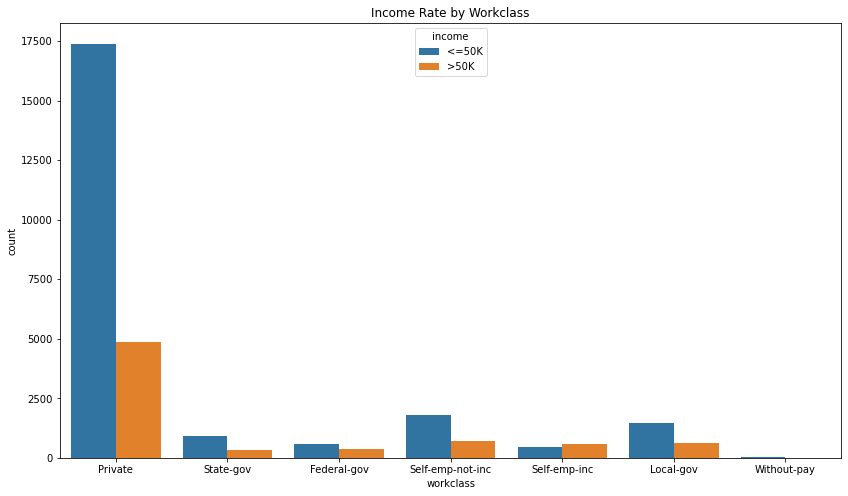

In [328]:
fig, (ax1) = plt.subplots( figsize=(14,8))
g = sns.countplot('workclass',hue='income',data=df_eda,ax=ax1,palette='tab10')
ax1.set_title('Income Rate by Workclass')

<b> Didapat : 
    1. Golongan Private lebih sedikit besar mendapatkan income <= 50K pertahun,
    2. Golongan Self-emp-inc lebih sedikit besar mendapatkan income > 50K pertahun,
    3. Golongan Self-emp-not-inc lebih lumayan besar mendapatkan income > 50K pertahun,
    4. Golongan Federal-gov lebih lumayan besar mendapatkan income > 50K pertahun,
    5. Golongan Local-gov lebih sedikit besar mendapatkan income > 50K pertahun,
    6. Golongan State-gov hampir sama mendapatkan income > 50K pertahun atau income <=50K,
    7. Golongan Without_pay lebih sedikit besar mendapatkan income <=50K pertahun
</b>

## 3.3. Education

In [329]:
df_eda.education

1             HS-grad
3             7th-8th
4        Some-college
5             HS-grad
6                10th
             ...     
32556    Some-college
32557      Assoc-acdm
32558         HS-grad
32559         HS-grad
32560         HS-grad
Name: education, Length: 30139, dtype: object

In [330]:
df_edu_percent = df_eda['education_group'].value_counts(normalize=True)
df_edu_percent = df_edu_percent.mul(100)
df_edu_percent = df_edu_percent.rename('percent').reset_index()
df_edu_percent.rename(columns={'index':'relationship'}, 
                 inplace=True)
df_edu_percent

relationship    percent
0  HS-graduate  32.628820
1     Colleges  22.127476
2    Bachelors  16.729155
3      Dropout  12.395899
4   Associates   7.681078
5      Masters   5.395003
6  Prof-school   1.798334
7    Doctorate   1.244235

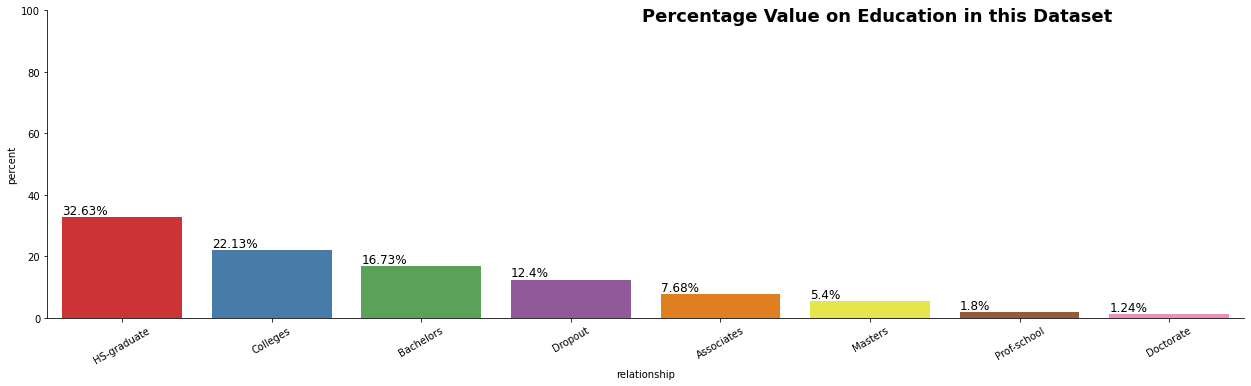

In [331]:
g = sns.catplot(x='relationship',y='percent', kind='bar',palette='Set1',data=df_edu_percent)
g.fig.set_size_inches(20,5)
g.set_xticklabels(rotation=30)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    g.fig.suptitle('Percentage Value on Education in this Dataset', fontsize=18, weight='bold',x=0.7)
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0
    txt_y = p.get_height() + 1
    g.ax.text(txt_x,txt_y,txt, size='large')

In [332]:
x,y = 'education_group', 'income'

df_ed_percent = df_eda.groupby(x)[y].value_counts(normalize=True)
df_ed_percent = df_ed_percent.mul(100)
df_ed_percent = df_ed_percent.rename('percent').reset_index()
df_ed_percent

education_group income    percent
0       Associates  <=50K  74.082073
1       Associates   >50K  25.917927
2        Bachelors  <=50K  57.834193
3        Bachelors   >50K  42.165807
4         Colleges  <=50K  79.982006
5         Colleges   >50K  20.017994
6        Doctorate   >50K  74.666667
7        Doctorate  <=50K  25.333333
8          Dropout  <=50K  93.977516
9          Dropout   >50K   6.022484
10     HS-graduate  <=50K  83.567216
11     HS-graduate   >50K  16.432784
12         Masters   >50K  56.457565
13         Masters  <=50K  43.542435
14     Prof-school   >50K  74.907749
15     Prof-school  <=50K  25.092251

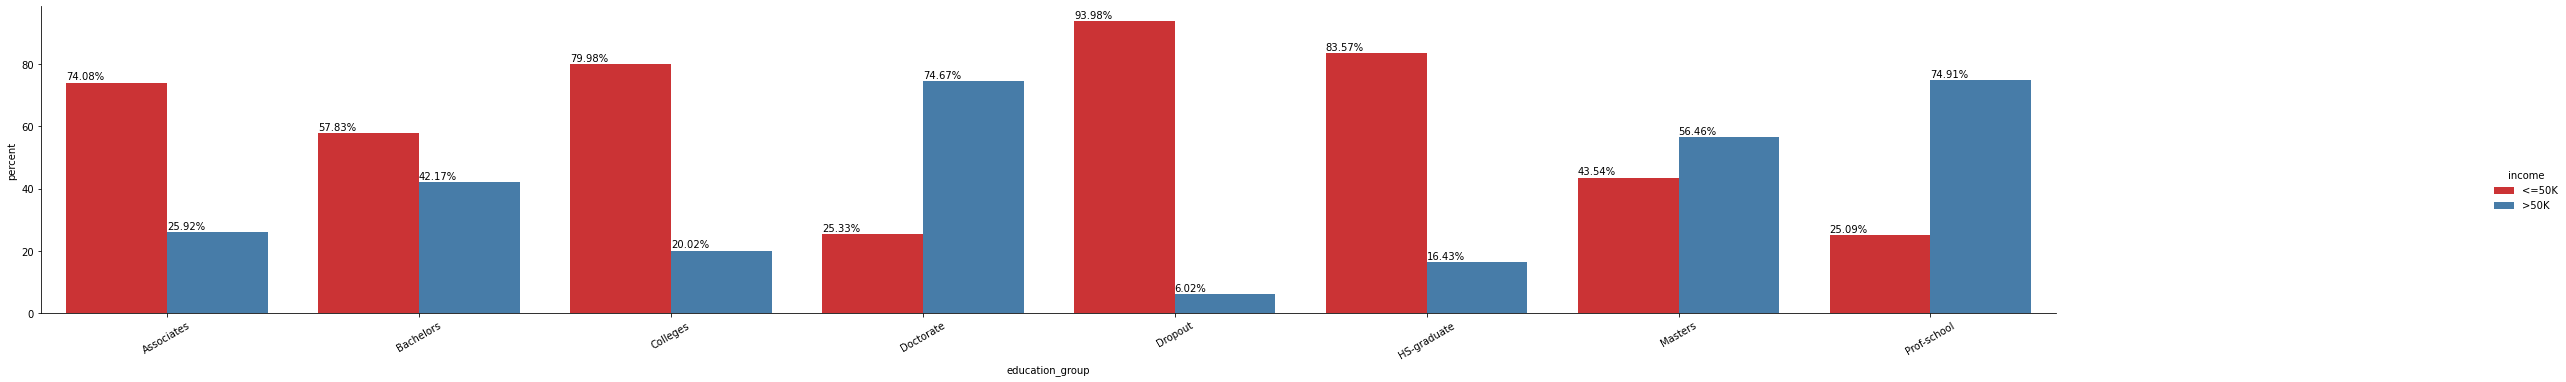

In [333]:
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',palette='Set1',data=df_ed_percent)
g.fig.set_size_inches(40,5)
g.set_xticklabels(rotation=30)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height() + 1
    g.ax.text(txt_x,txt_y,txt)

In [334]:
education_income = df_eda.groupby(['education.num', 'education','income']).agg({'income':'count'})
education_income['percentage'] = education_income.groupby(level=[0,1]).transform(lambda x: (x / (x.sum())* 100).round(2))
education_income = education_income.rename(columns={'income':'number of people'}).reset_index()
education_income

education.num     education income  number of people  percentage
0               1     Preschool  <=50K                44      100.00
1               2       1st-4th  <=50K               143       95.97
2               2       1st-4th   >50K                 6        4.03
3               3       5th-6th  <=50K               275       95.82
4               3       5th-6th   >50K                12        4.18
5               4       7th-8th  <=50K               521       93.71
6               4       7th-8th   >50K                35        6.29
7               5           9th  <=50K               430       94.51
8               5           9th   >50K                25        5.49
9               6          10th  <=50K               761       92.80
10              6          10th   >50K                59        7.20
11              7          11th  <=50K               989       94.37
12              7          11th   >50K                59        5.63
13              8          12th  <=50K               348       92.31
14              8          12th   >50K                29        7.69
15              9       HS-grad  <=50K              8218       83.57
16              9       HS-grad   >50K              1616       16.43
17             10  Some-college  <=50K              5334       79.98
18             10  Some-college   >50K              1335       20.02
19             11     Assoc-voc  <=50K               963       73.68
20             11     Assoc-voc   >50K               344       26.32
21             12    Assoc-acdm  <=50K               752       74.60
22             12    Assoc-acdm   >50K               256       25.40
23             13     Bachelors  <=50K              2916       57.83
24             13     Bachelors   >50K              2126       42.17
25             14       Masters  <=50K               708       43.54
26             14       Masters   >50K               918       56.46
27             15   Prof-school  <=50K               136       25.09
28             15   Prof-school   >50K               406       74.91
29             16     Doctorate  <=50K                95       25.33
30             16     Doctorate   >50K               280       74.67

Text(40.625520833333354, 0.5, 'Education')

posx and posy should be finite values
posx and posy should be finite values


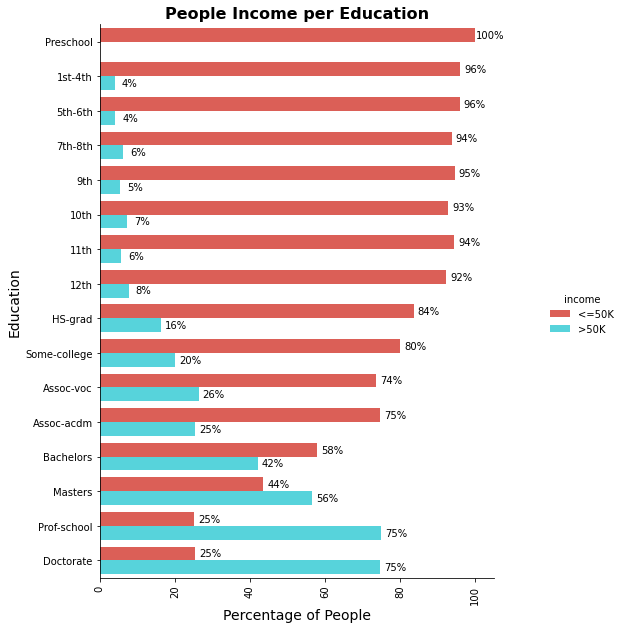

In [335]:
i = sns.catplot(y='education', x='percentage', hue='income', data=education_income, kind='bar', palette='hls', 
                saturation = 8)

for axes in i.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
    
    
ax = i.facet_axis(0,0)
for p in ax.patches:
    width = p.get_width()
    plt.text(4+p.get_width(), p.get_y()+0.50*p.get_height(),
             '{0:.0f}'.format(width) + '%',
             ha='center', va='center')

    
i.fig.set_size_inches(10,9)
plt.title("People Income per Education", size=16, weight='bold')
plt.xlabel("Percentage of People", size=14)
plt.ylabel("Education", size=14)
# plt.savefig('education income.png')

### Checking occupation people have per edu

c:\users\edwin\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

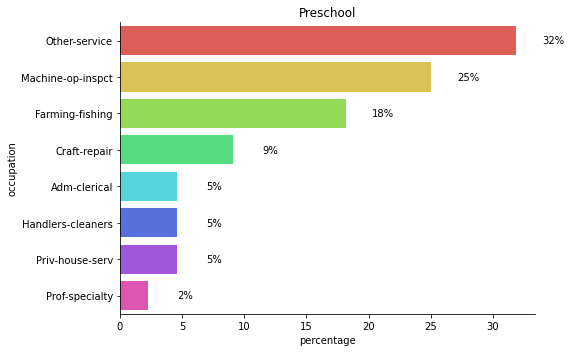

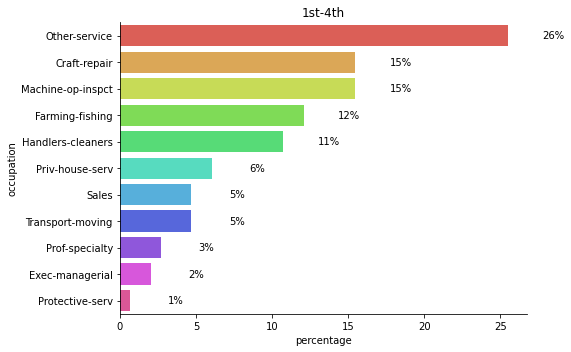

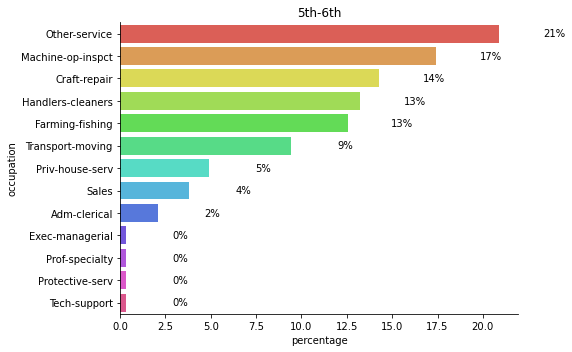

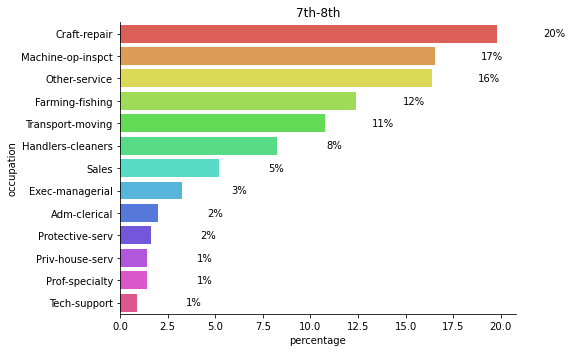

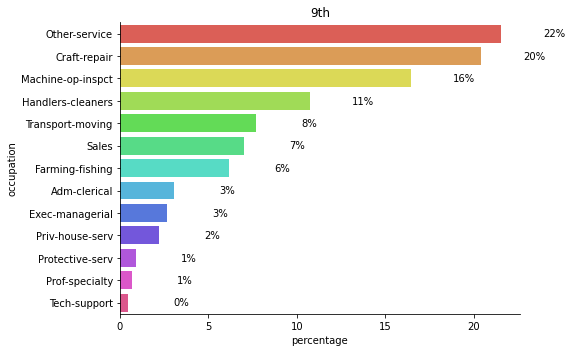

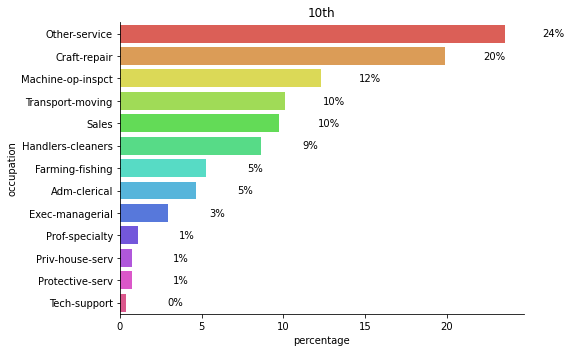

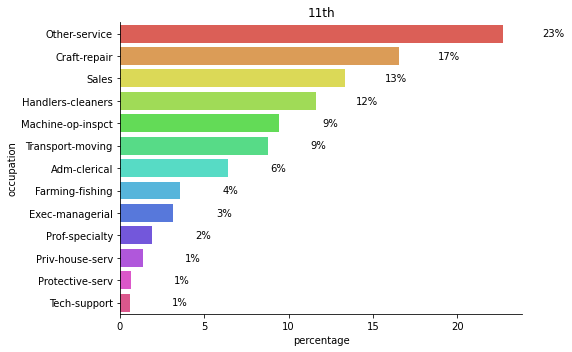

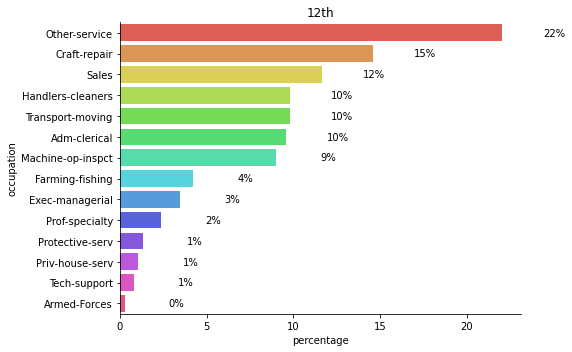

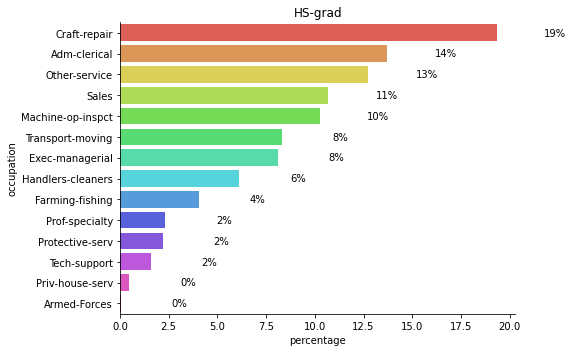

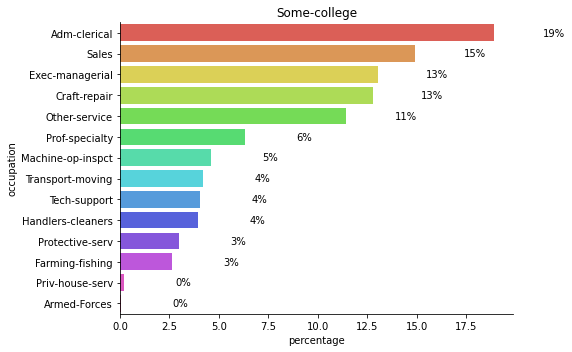

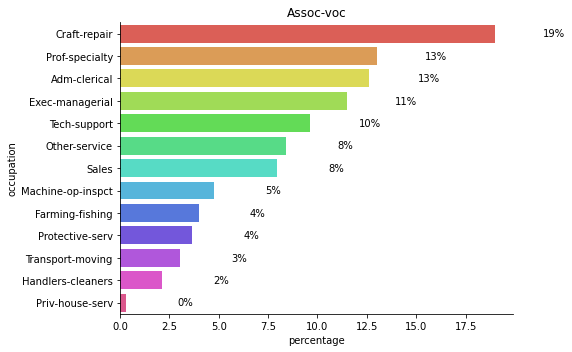

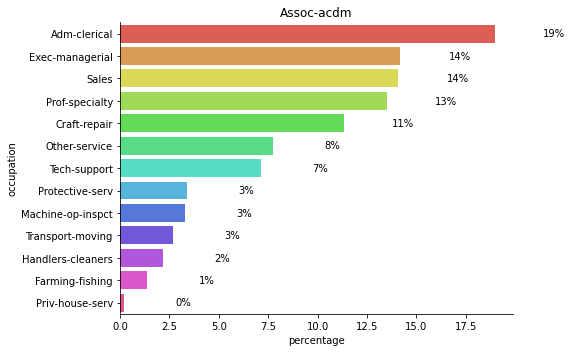

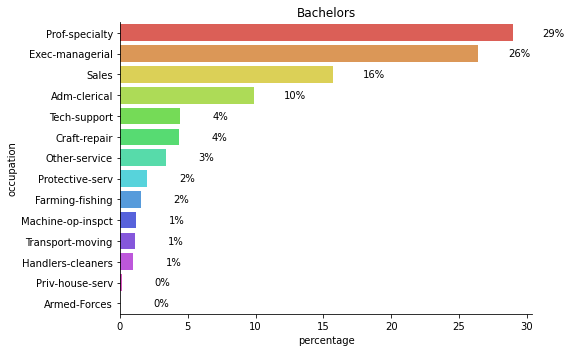

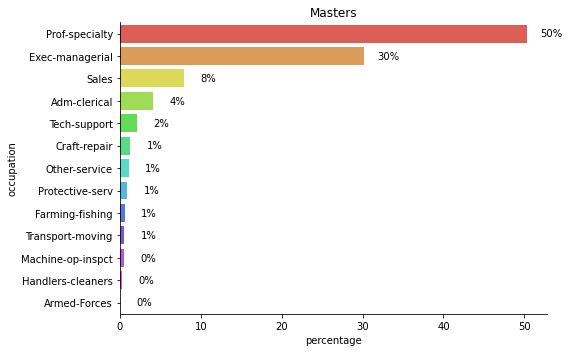

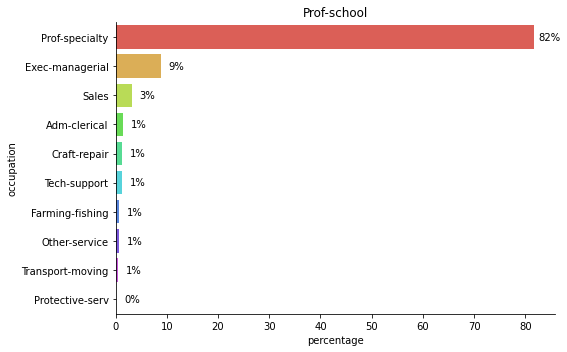

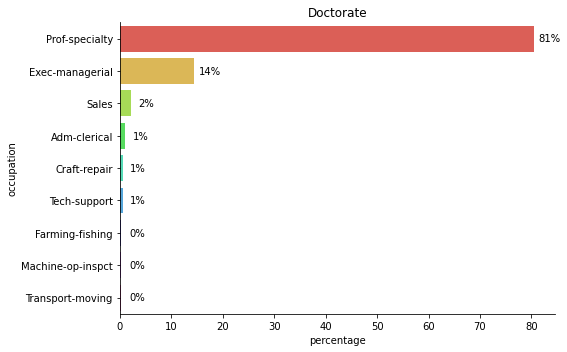

In [336]:
educations = df_eda.groupby('education.num', as_index=False).last()[['education.num','education']].education.tolist()
# plt.figure(figsize=(15, 10))
fig, axes = plt.subplots(16,0)
for i in educations:
    plot_df = df_eda.loc[df_eda.education == i, :]
    plot_df = plot_df.groupby('occupation').agg({'income':'count'}).rename(columns={'income':'number of people'})
    theoccupation_total = plot_df['number of people'].sum()
    plot_df['percentage'] = np.round((plot_df.div(theoccupation_total, level='occupation')*100),2)
    plot_df = plot_df.reset_index()
#     plt.figure(figsize=(15, 10))
    g=sns.catplot(ax=axes, y='occupation', x='percentage', data=plot_df, kind='bar', palette='hls', saturation=8,
                  order=plot_df.sort_values('percentage', ascending=False).occupation.values)
    ax = g.facet_axis(0,0)
    for p in ax.patches:
        width = p.get_width()
        plt.text(3+p.get_width(), p.get_y()+0.5*p.get_height(),
                 '{0:.0f}'.format(width) + '%',
                 ha='center', va='center')
#     maxn = len(plot_df.occupation)
#     ax.set_ylim(-0.5,maxn-0.5)
    
    g.fig.set_size_inches(8,5)
    plt.title(i)
    plt.tight_layout()
    plt.show();

## 3.4. Marital.Status

In [337]:
df_mar_percent = df_eda['marital.status'].value_counts(normalize=True)
df_mar_percent = df_mar_percent.mul(100)
df_mar_percent = df_mar_percent.rename('percent').reset_index()
df_mar_percent.rename(columns={'index':'marital'}, 
                 inplace=True)
df_mar_percent

marital    percent
0     Married-civ-spouse  46.647201
1          Never-married  32.220711
2               Divorced  13.975248
3              Separated   3.115565
4                Widowed   2.743953
5  Married-spouse-absent   1.227645
6      Married-AF-spouse   0.069677

In [338]:
x,y = 'marital.status', 'income'

df_ma_percent = df_eda.groupby(x)[y].value_counts(normalize=True)
df_ma_percent = df_ma_percent.mul(100)
df_ma_percent = df_ma_percent.rename('percent').reset_index()
df_ma_percent

marital.status income    percent
0                Divorced  <=50K  89.268756
1                Divorced   >50K  10.731244
2       Married-AF-spouse  <=50K  52.380952
3       Married-AF-spouse   >50K  47.619048
4      Married-civ-spouse  <=50K  54.498898
5      Married-civ-spouse   >50K  45.501102
6   Married-spouse-absent  <=50K  91.621622
7   Married-spouse-absent   >50K   8.378378
8           Never-married  <=50K  95.160128
9           Never-married   >50K   4.839872
10              Separated  <=50K  92.971246
11              Separated   >50K   7.028754
12                Widowed  <=50K  90.326481
13                Widowed   >50K   9.673519

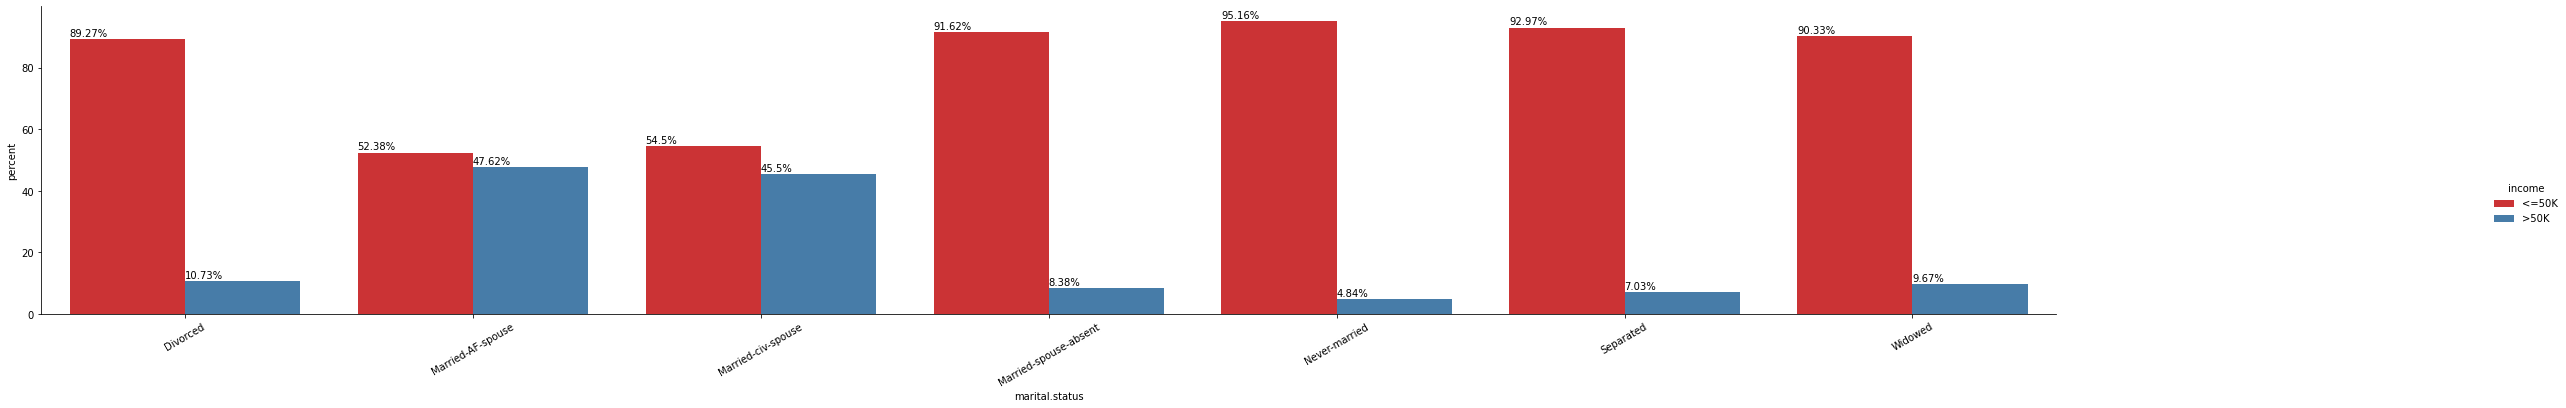

In [339]:
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',palette='Set1',data=df_ma_percent)
g.fig.set_size_inches(40,5)
g.set_xticklabels(rotation=30)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height() + 1
    g.ax.text(txt_x,txt_y,txt)

## 3.5. Occupation

In [340]:
df_occu_percent = df_eda['occupation'].value_counts(normalize=True)
df_occu_percent = df_occu_percent.mul(100)
df_occu_percent = df_occu_percent.rename('percent').reset_index()
df_occu_percent.rename(columns={'index':'occupation'}, 
                 inplace=True)
df_occu_percent

occupation    percent
0      Prof-specialty  13.384651
1        Craft-repair  13.354789
2     Exec-managerial  13.241979
3        Adm-clerical  12.339494
4               Sales  11.891569
5       Other-service  10.647334
6   Machine-op-inspct   6.516474
7    Transport-moving   5.215833
8   Handlers-cleaners   4.475928
9     Farming-fishing   3.274827
10       Tech-support   3.022662
11    Protective-serv   2.136766
12    Priv-house-serv   0.467832
13       Armed-Forces   0.029862

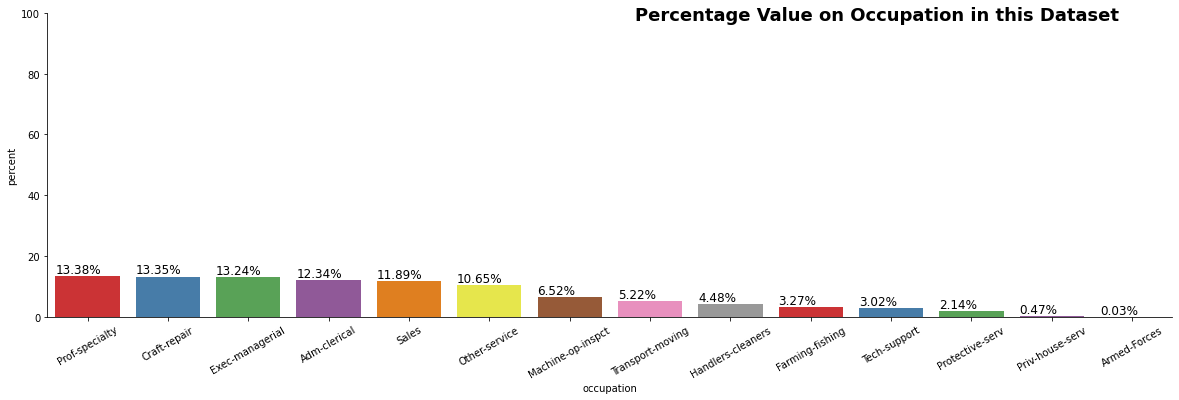

In [341]:
g = sns.catplot(x='occupation',y='percent', kind='bar',palette='Set1',data=df_occu_percent)
g.fig.set_size_inches(20,5)
g.set_xticklabels(rotation=30)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    g.fig.suptitle('Percentage Value on Occupation in this Dataset', fontsize=18, weight='bold',x=0.7)
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0
    txt_y = p.get_height() + 1
    g.ax.text(txt_x,txt_y,txt, size='large')

In [342]:
x,y = 'occupation', 'income'

df_oc_percent = df_eda.groupby(x)[y].value_counts(normalize=True)
df_oc_percent = df_oc_percent.mul(100)
df_oc_percent = df_oc_percent.rename('percent').reset_index()
df_oc_percent

occupation income    percent
0        Adm-clerical  <=50K  86.609304
1        Adm-clerical   >50K  13.390696
2        Armed-Forces  <=50K  88.888889
3        Armed-Forces   >50K  11.111111
4        Craft-repair  <=50K  77.440994
5        Craft-repair   >50K  22.559006
6     Exec-managerial  <=50K  51.465798
7     Exec-managerial   >50K  48.534202
8     Farming-fishing  <=50K  88.348531
9     Farming-fishing   >50K  11.651469
10  Handlers-cleaners  <=50K  93.847294
11  Handlers-cleaners   >50K   6.152706
12  Machine-op-inspct  <=50K  87.576375
13  Machine-op-inspct   >50K  12.423625
14      Other-service  <=50K  95.886569
15      Other-service   >50K   4.113431
16    Priv-house-serv  <=50K  99.290780
17    Priv-house-serv   >50K   0.709220
18     Prof-specialty  <=50K  55.131383
19     Prof-specialty   >50K  44.868617
20    Protective-serv  <=50K  67.391304
21    Protective-serv   >50K  32.608696
22              Sales  <=50K  72.935268
23              Sales   >50K  27.064732
24       Tech-support  <=50K  69.484083
25       Tech-support   >50K  30.515917
26   Transport-moving  <=50K  79.707379
27   Transport-moving   >50K  20.292621

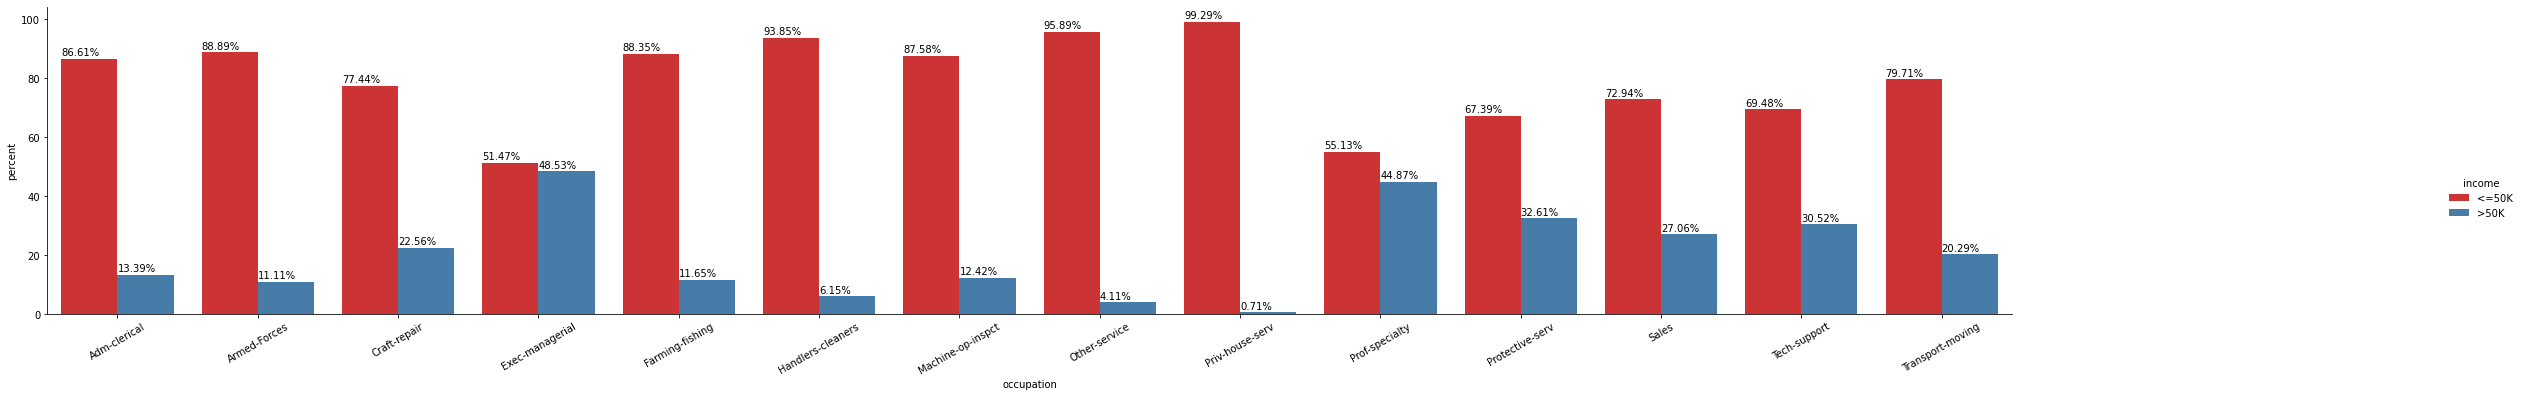

In [343]:
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',palette='Set1',data=df_oc_percent)
g.fig.set_size_inches(40,5)
g.set_xticklabels(rotation=30)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height() + 1
    g.ax.text(txt_x,txt_y,txt)

In [344]:
income_per_occupation = df_eda.groupby(['occupation', 'income']).agg({'income':'count'})
# income_per_occupation.sort_values('education', ascending=False).sort_index(level=0)
# income_per_occupation
theoccupation = income_per_occupation.groupby(['occupation']).agg({'income': 'sum'})
percentage_income_peroccupation = income_per_occupation.div(theoccupation, level='occupation')*100
percentage_income_peroccupation = percentage_income_peroccupation.rename(columns={'income':'percentage'}).reset_index()

In [345]:
percentage_income_peroccupation

occupation income  percentage
0        Adm-clerical  <=50K   86.609304
1        Adm-clerical   >50K   13.390696
2        Armed-Forces  <=50K   88.888889
3        Armed-Forces   >50K   11.111111
4        Craft-repair  <=50K   77.440994
5        Craft-repair   >50K   22.559006
6     Exec-managerial  <=50K   51.465798
7     Exec-managerial   >50K   48.534202
8     Farming-fishing  <=50K   88.348531
9     Farming-fishing   >50K   11.651469
10  Handlers-cleaners  <=50K   93.847294
11  Handlers-cleaners   >50K    6.152706
12  Machine-op-inspct  <=50K   87.576375
13  Machine-op-inspct   >50K   12.423625
14      Other-service  <=50K   95.886569
15      Other-service   >50K    4.113431
16    Priv-house-serv  <=50K   99.290780
17    Priv-house-serv   >50K    0.709220
18     Prof-specialty  <=50K   55.131383
19     Prof-specialty   >50K   44.868617
20    Protective-serv  <=50K   67.391304
21    Protective-serv   >50K   32.608696
22              Sales  <=50K   72.935268
23              Sales   >50K   27.064732
24       Tech-support  <=50K   69.484083
25       Tech-support   >50K   30.515917
26   Transport-moving  <=50K   79.707379
27   Transport-moving   >50K   20.292621

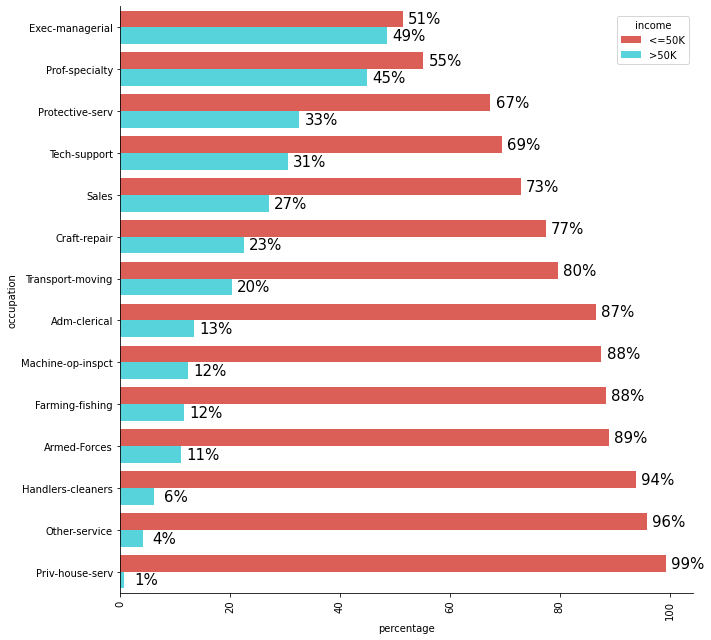

In [346]:
occupation_order = ['Exec-managerial', 'Prof-specialty', 'Protective-serv', 'Tech-support', 'Sales', 
                    'Craft-repair', 'Transport-moving', 'Adm-clerical', 'Machine-op-inspct', 'Farming-fishing', 
                    'Armed-Forces', 'Handlers-cleaners', 'Other-service', 'Priv-house-serv']
e = sns.catplot(kind='bar', x='percentage', y='occupation', hue='income', data=percentage_income_peroccupation,
                 legend=False, order=occupation_order, palette='hls', saturation=8)

for axes in e.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
    
    
# x = percentage_10nativecountry['native.country']
# y = percentage_10nativecountry['percentage']
# x_number = range(len(x))
# for i in x_number:
#     plt.text(x=x_number[i]-0.5, y=y[i]+6, s=y[i], size=13)
    

    
ax = e.facet_axis(0,0)
for p in ax.patches:
    width = p.get_width()
    plt.text(4+p.get_width(), p.get_y()+0.50*p.get_height(),
             '{0:.0f}'.format(width) + '%',
             ha='center', va='center', fontsize='15')   

    
e.fig.set_size_inches(10,9)
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=1, title='income')
plt.tight_layout()
plt.savefig('occupation income.png')

##  Check education of people with occupation exec and prof with income under 50K

In [347]:
occupation_to_check = ['Exec-managerial', 'Prof-specialty']

In [348]:
df_occupation_to_check = df_eda.loc[(df_eda.occupation.isin(occupation_to_check)) & (df_eda.income == '<=50K'), :]

In [349]:
df_occupation_to_check.occupation.value_counts()

Prof-specialty     2224
Exec-managerial    2054
Name: occupation, dtype: int64

In [350]:
# income_per_occupation_check = df_occupation_to_check.groupby(['occupation', 'income']).agg({'income':'count'})
# # income_per_occupation.sort_values('education', ascending=False).sort_index(level=0)
# # income_per_occupation
# theoccupation_check = income_per_occupation_check.groupby(['occupation']).agg({'income': 'sum'})
# percentage_income_peroccupation_check = income_per_occupation_check.div(theoccupation_check, level='occupation')*100
# percentage_income_peroccupation_check = percentage_income_peroccupation_check.rename(columns={'income':'percentage'}).reset_index()
# percentage_income_peroccupation

In [351]:
education_check = df_occupation_to_check.groupby(['education.num', 'education','income']).agg({'age':'count'})
theedu_check = education_check.age.sum()
percentage_education_check = education_check.div(theedu_check, level='education')*100
percentage_education_check = percentage_education_check.rename(columns={'age':'percentage'}).reset_index()
percentage_education_check

education.num     education income  percentage
0               1     Preschool  <=50K    0.023375
1               2       1st-4th  <=50K    0.116877
2               3       5th-6th  <=50K    0.023375
3               4       7th-8th  <=50K    0.467508
4               5           9th  <=50K    0.303880
5               6          10th  <=50K    0.561010
6               7          11th  <=50K    1.051893
7               8          12th  <=50K    0.420757
8               9       HS-grad  <=50K   16.596540
9              10  Some-college  <=50K   20.243104
10             11     Assoc-voc  <=50K    4.604956
11             12    Assoc-acdm  <=50K    4.160823
12             13     Bachelors  <=50K   34.221599
13             14       Masters  <=50K   12.529219
14             15   Prof-school  <=50K    2.641421
15             16     Doctorate  <=50K    2.033661

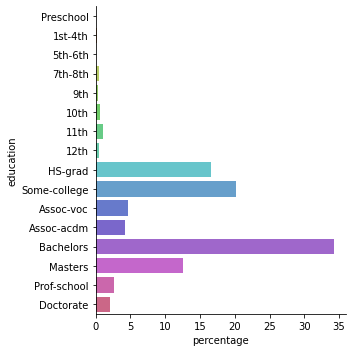

In [352]:
sns.catplot(y='education', x='percentage', data=percentage_education_check, kind='bar', palette='hls')

##  Check education of people with occupation exec and prof with income above 50K

In [353]:
occupation_to_check = ['Exec-managerial', 'Prof-specialty']

In [354]:
df_occupation_to_check = df_eda.loc[(df_eda.occupation.isin(occupation_to_check)) & (df_eda.income == '>50K'), :]

In [355]:
df_occupation_to_check.occupation.value_counts()

Exec-managerial    1937
Prof-specialty     1810
Name: occupation, dtype: int64

In [356]:
# income_per_occupation_check = df_occupation_to_check.groupby(['occupation', 'income']).agg({'income':'count'})
# # income_per_occupation.sort_values('education', ascending=False).sort_index(level=0)
# # income_per_occupation
# theoccupation_check = income_per_occupation_check.groupby(['occupation']).agg({'income': 'sum'})
# percentage_income_peroccupation_check = income_per_occupation_check.div(theoccupation_check, level='occupation')*100
# percentage_income_peroccupation_check = percentage_income_peroccupation_check.rename(columns={'income':'percentage'}).reset_index()
# percentage_income_peroccupation

In [357]:
education_check = df_occupation_to_check.groupby(['education.num', 'education','income']).agg({'age':'count'})
theedu_check = education_check.age.sum()
percentage_education_check = education_check.div(theedu_check, level='education')*100
percentage_education_check = percentage_education_check.rename(columns={'age':'percentage'}).reset_index()
percentage_education_check

education.num     education income  percentage
0               2       1st-4th   >50K    0.053376
1               3       5th-6th   >50K    0.026688
2               4       7th-8th   >50K    0.160128
3               5           9th   >50K    0.053376
4               6          10th   >50K    0.240192
5               7          11th   >50K    0.213504
6               8          12th   >50K    0.106752
7               9       HS-grad   >50K    8.486789
8              10  Some-college   >50K   11.315719
9              11     Assoc-voc   >50K    3.282626
10             12    Assoc-acdm   >50K    2.695490
11             13     Bachelors   >50K   35.468375
12             14       Masters   >50K   20.629837
13             15   Prof-school   >50K   10.088070
14             16     Doctorate   >50K    7.179077

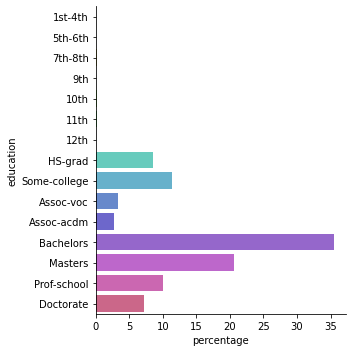

In [358]:
sns.catplot(y='education', x='percentage', data=percentage_education_check, kind='bar', palette='hls')

### Check people education per occupation

c:\users\edwin\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

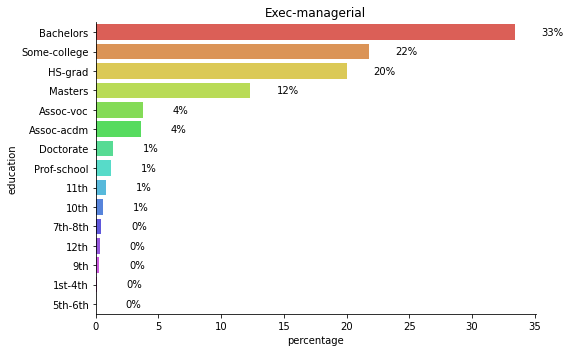

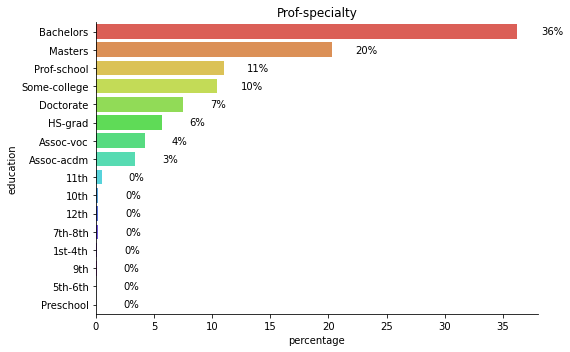

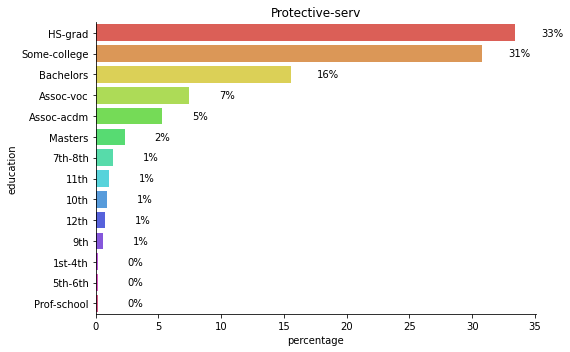

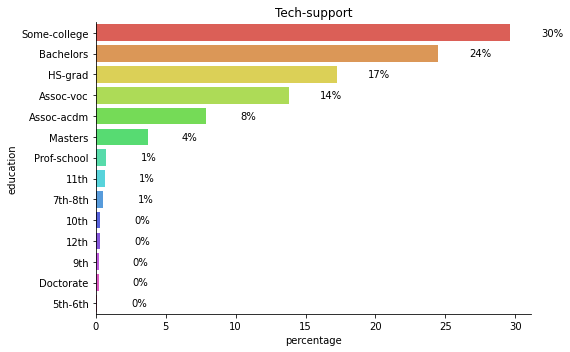

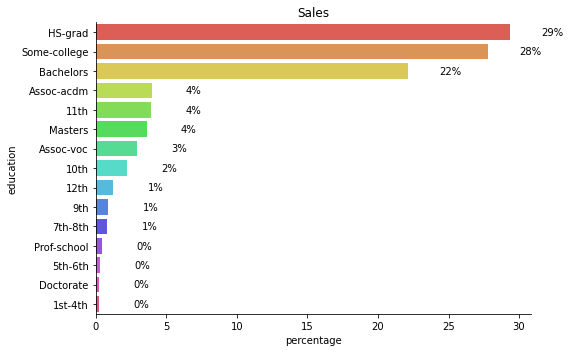

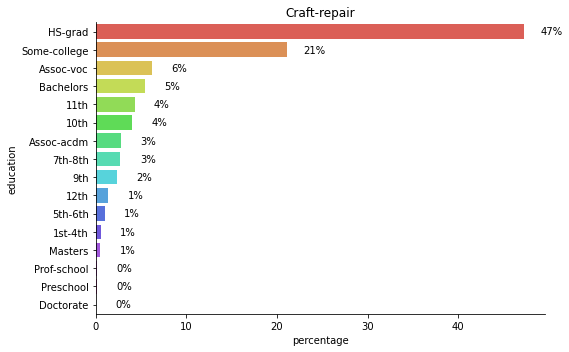

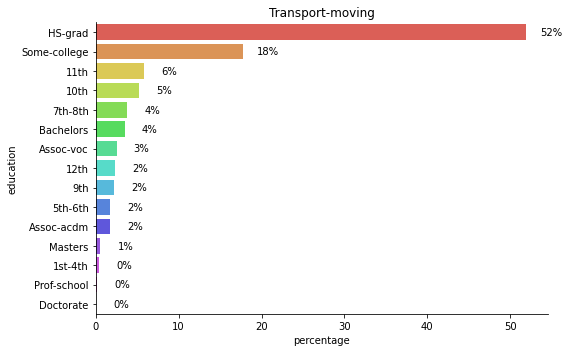

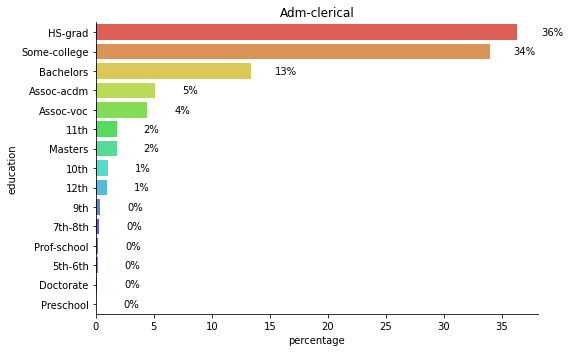

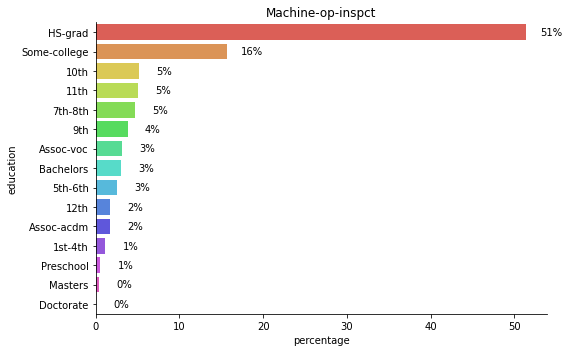

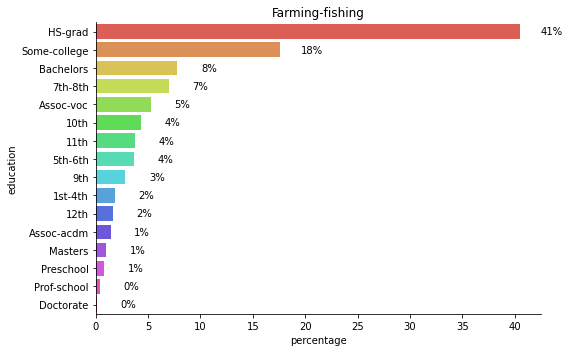

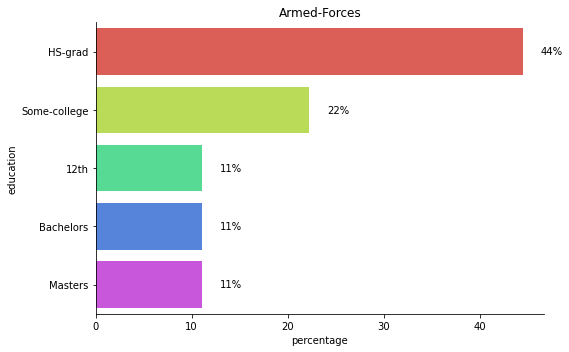

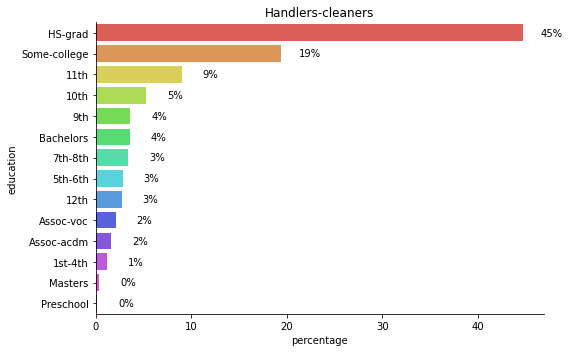

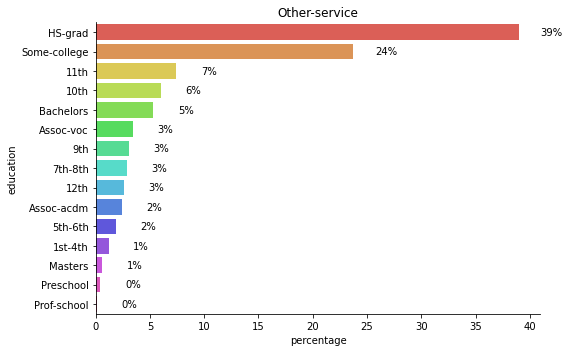

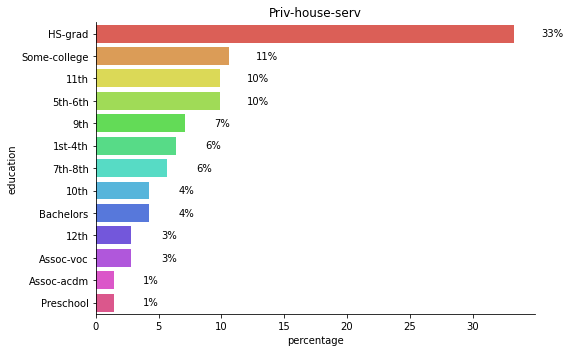

In [359]:
occupation_order = ['Exec-managerial', 'Prof-specialty', 'Protective-serv', 'Tech-support', 'Sales', 
                    'Craft-repair', 'Transport-moving', 'Adm-clerical', 'Machine-op-inspct', 'Farming-fishing', 
                    'Armed-Forces', 'Handlers-cleaners', 'Other-service', 'Priv-house-serv']
# plt.figure(figsize=(15, 10))
fig, axes = plt.subplots(16,0, sharex='row')
for i in occupation_order:
    plot_df = df_eda.loc[df_eda.occupation == i, :]
    plot_df = plot_df.groupby('education').agg({'income':'count'}).rename(columns={'income':'number of people'})
    theedu_total = plot_df['number of people'].sum()
    plot_df['percentage'] = np.round((plot_df.div(theedu_total, level='education')*100),2)
    plot_df = plot_df.reset_index()
#     plt.figure(figsize=(15, 10))
    g=sns.catplot(ax=axes, y='education', x='percentage', data=plot_df, kind='bar', palette='hls', saturation=8,
                  order=plot_df.sort_values('percentage', ascending=False).education.values)
    ax = g.facet_axis(0,0)
    for p in ax.patches:
        width = p.get_width()
        plt.text(3+p.get_width(), p.get_y()+0.5*p.get_height(),
                 '{0:.0f}'.format(width) + '%',
                 ha='center', va='center')
    
    g.fig.set_size_inches(8,5)
    plt.title(i)
    plt.tight_layout()
    plt.show();

## 3.6. relationship

In [360]:
df_relationship_percent = df_eda['relationship'].value_counts(normalize=True)
df_relationship_percent = df_relationship_percent.mul(100)
df_relationship_percent = df_relationship_percent.rename('percent').reset_index()
df_relationship_percent.rename(columns={'index':'relationship'}, 
                 inplace=True)
df_relationship_percent

relationship    percent
0         Husband  41.331829
1   Not-in-family  25.594744
2       Own-child  14.804738
3       Unmarried  10.653970
4            Wife   4.665052
5  Other-relative   2.949667

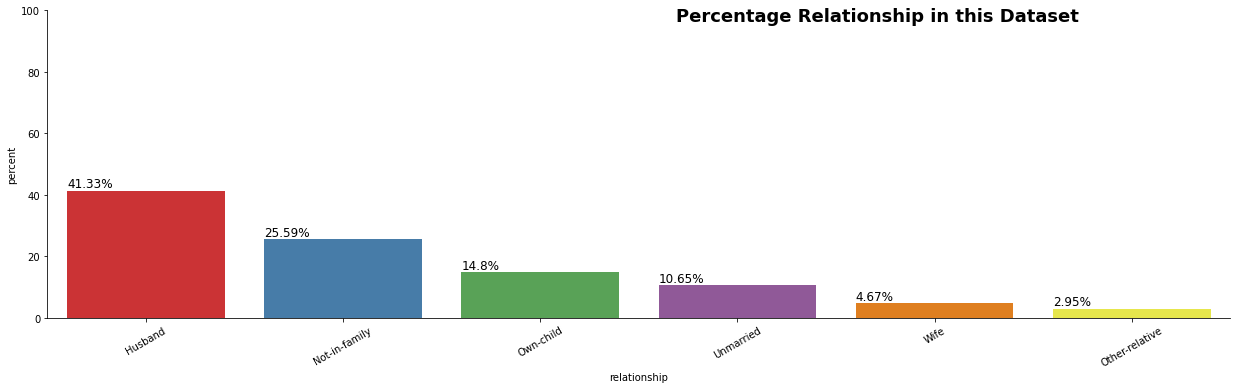

In [361]:
g = sns.catplot(x='relationship',y='percent', kind='bar',palette='Set1',data=df_relationship_percent)
g.fig.set_size_inches(20,5)
g.set_xticklabels(rotation=30)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    g.fig.suptitle('Percentage Relationship in this Dataset', fontsize=18, weight='bold',x=0.7)
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0
    txt_y = p.get_height() + 1
    g.ax.text(txt_x,txt_y,txt, size='large')

In [362]:
x,y = 'relationship', 'income'

df_rel_percent = df_eda.groupby(x)[y].value_counts(normalize=True)
df_rel_percent = df_rel_percent.mul(100)
df_rel_percent = df_rel_percent.rename('percent').reset_index()
df_rel_percent

relationship income    percent
0          Husband  <=50K  54.427230
1          Husband   >50K  45.572770
2    Not-in-family  <=50K  89.331086
3    Not-in-family   >50K  10.668914
4   Other-relative  <=50K  96.062992
5   Other-relative   >50K   3.937008
6        Own-child  <=50K  98.565666
7        Own-child   >50K   1.434334
8        Unmarried  <=50K  93.366552
9        Unmarried   >50K   6.633448
10            Wife  <=50K  50.640114
11            Wife   >50K  49.359886

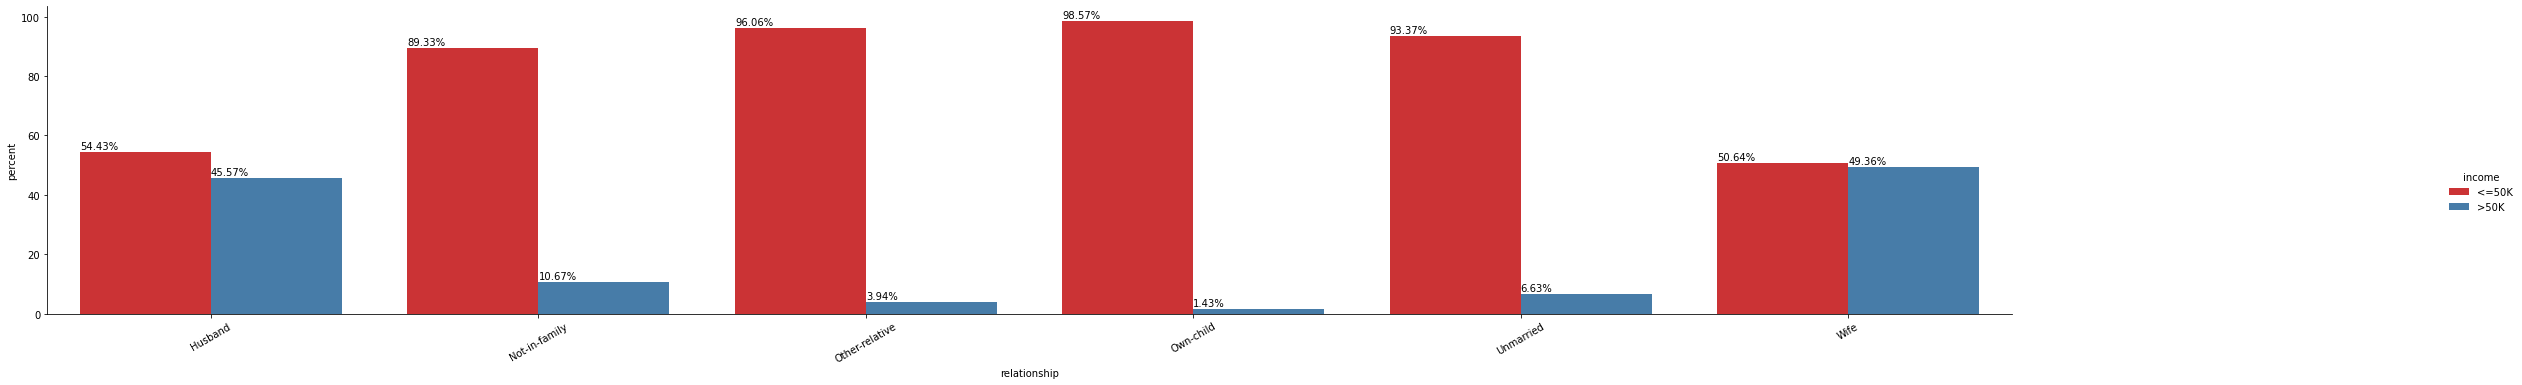

In [363]:
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',palette='Set1',data=df_rel_percent)
g.fig.set_size_inches(40,5)
g.set_xticklabels(rotation=30)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height() + 1
    g.ax.text(txt_x,txt_y,txt)

## 3.7. race

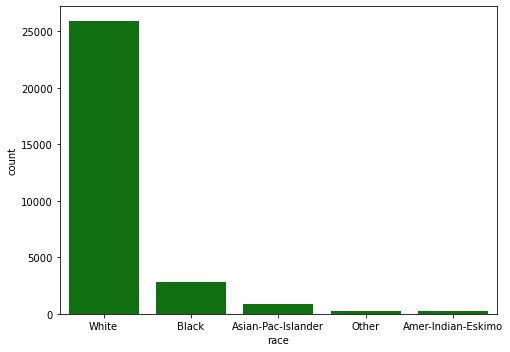

In [364]:
features = ['race']
plt.figure(figsize=(20, 5))
for i in range(0, len(features)):
    plt.subplot(1, 3, i+1)
    sns.countplot(df_eda[features[i]],color='green',orient='v')
    plt.tight_layout()
    
plt.savefig('race categorical countplot.png')

Diperoleh bahwa terjadi ketimpangan antara jumlah race white terhadap race lainnya(white mendominasi)

## 3.8. sex

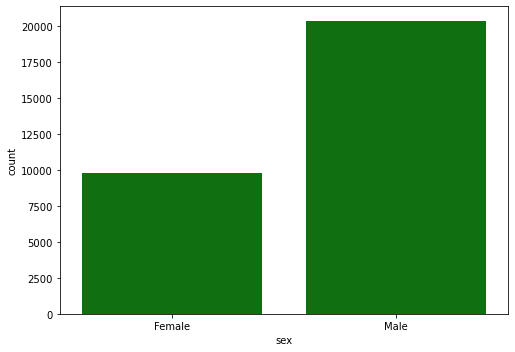

In [365]:
features = ['sex']
plt.figure(figsize=(20, 5))
for i in range(0, len(features)):
    plt.subplot(1, 3, i+1)
    sns.countplot(df_eda[features[i]],color='green',orient='v')
    plt.tight_layout()
    
plt.savefig('sex categorical countplot.png')

Diperoleh terdapat ketimpangan antara jumlah orang gender male dan female (mayoritas male).

## 3.9. hours.per.week

In [366]:
# Hours per week grouping

# Menambahkan kolom hours_per_week_group ke dalam dataset df_eda sesuai dengan kondisi
conditions = [
    (df_eda['hours.per.week'] <= 25),
    (df_eda['hours.per.week'] > 25) & (df['hours.per.week'] <= 40),
    (df_eda['hours.per.week'] > 40) & (df['hours.per.week'] <= 60),
    (df_eda['hours.per.week'] > 60)
    ]
choices = ['Part-time', 'Full-time', 'Over-time', 'Too-much']
df_eda['hours_per_week_group'] = np.select(conditions, choices, default='error')

df_eda.head(1)

age workclass  fnlwgt education  education.num marital.status  \
1   82   Private  132870   HS-grad              9        Widowed   

        occupation   relationship   race     sex  ...  capital.loss  \
1  Exec-managerial  Not-in-family  White  Female  ...          4356   

   hours.per.week  native.country income age_group education_group  \
1              18   United-States  <=50K       Old     HS-graduate   

  hours_per_week_group capital_loss_group capital_gain_group  \
1            Part-time               High               None   

  native_country_group  
1        United-States  

[1 rows x 21 columns]

In [367]:
df_hoursper_percent = df_eda['hours_per_week_group'].value_counts(normalize=True)
df_hoursper_percent = df_hoursper_percent.mul(100)
df_hoursper_percent = df_hoursper_percent.rename('percent').reset_index()
df_hoursper_percent.rename(columns={'index':'hours_per_week'}, 
                 inplace=True)
df_hoursper_percent

hours_per_week    percent
0      Full-time  58.694714
1      Over-time  27.008195
2      Part-time  10.806596
3       Too-much   3.490494

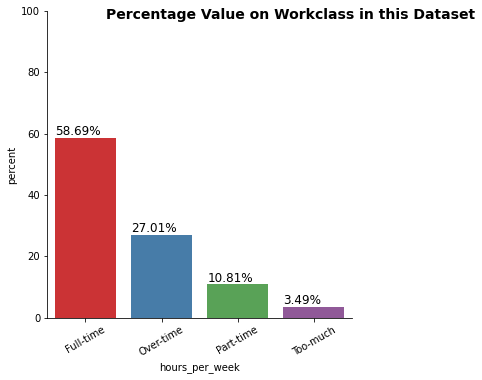

In [368]:
g = sns.catplot(x='hours_per_week',y='percent', kind='bar',palette='Set1',data=df_hoursper_percent)
g.set_xticklabels(rotation=30)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    g.fig.suptitle('Percentage Value on Workclass in this Dataset', fontsize=14, weight='bold',x=0.8)
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0
    txt_y = p.get_height() + 1
    g.ax.text(txt_x,txt_y,txt, size='large')

In [369]:
x,y = 'hours_per_week_group', 'income'

df_hpwg_percent = df_eda.groupby(x)[y].value_counts(normalize=True)
df_hpwg_percent = df_hpwg_percent.mul(100)
df_hpwg_percent = df_hpwg_percent.rename('percent').reset_index()
df_hpwg_percent

hours_per_week_group income    percent
0            Full-time  <=50K  79.892595
1            Full-time   >50K  20.107405
2            Over-time  <=50K  58.869779
3            Over-time   >50K  41.130221
4            Part-time  <=50K  93.583052
5            Part-time   >50K   6.416948
6             Too-much  <=50K  62.737643
7             Too-much   >50K  37.262357

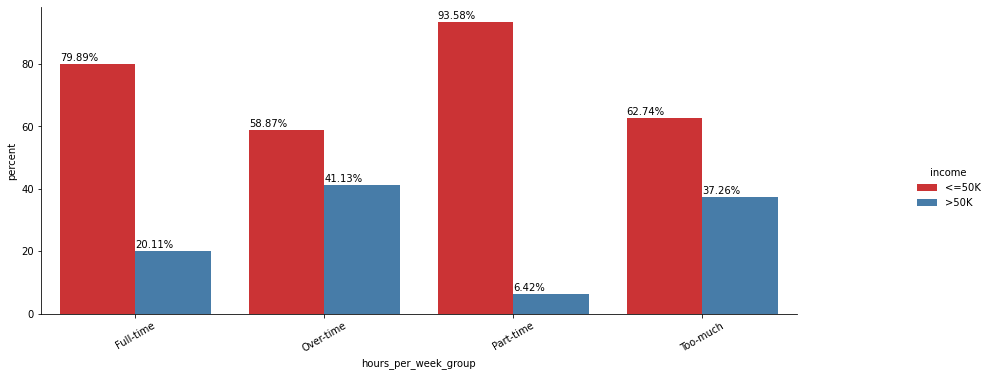

In [370]:
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',palette='Set1',data=df_hpwg_percent)
g.set_xticklabels(rotation=30)
g.fig.set_size_inches(15,5)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height() + 1
    g.ax.text(txt_x,txt_y,txt)

# 4. Data Preparation for Modelling

## 4.1. Handling Class Imbalanced

In [18]:
# Checking number of records of each of target class
df_model['income'].value_counts()

<=50K    22633
>50K      7506
Name: income, dtype: int64

In [19]:
# Importing library for handling class imbalance, instantiating the library (using undersampling method)
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

In [20]:
# Splitting the dataset to features as X and target as y
X = df_model.drop('income', axis=1)
y = df_model['income']

In [21]:
# Resample dataset with undersampling
X_under, y_under = rus.fit_resample(X, y)
print(len(X_under))
print(len(y_under))

15012
15012


In [22]:
# Checking number of records of each target class
print(pd.Series(y_under).value_counts())

<=50K    7506
>50K     7506
Name: income, dtype: int64


In [23]:
# Combining features (X) and target (y) that are splitted before
df_model = pd.concat([X_under, y_under], axis=1)

## 4.2. Feature Encoding

### 4.2.1. age

In [24]:
# Checking feature age values
df_model.age

0        49
1        38
2        60
3        26
4        42
5        31
6        61
7        23
8        47
9        31
10       63
11       56
12       31
13       34
14       35
15       50
16       39
17       28
18       49
19       62
20       48
21       76
22       33
23       27
24       52
25       49
26       23
27       25
28       21
29       30
         ..
14982    36
14983    34
14984    49
14985    51
14986    59
14987    59
14988    47
14989    42
14990    57
14991    36
14992    51
14993    37
14994    66
14995    30
14996    46
14997    36
14998    33
14999    45
15000    36
15001    41
15002    50
15003    38
15004    46
15005    46
15006    34
15007    54
15008    34
15009    39
15010    53
15011    40
Name: age, Length: 15012, dtype: int64

In [25]:
# age adalah numerical feature, maka dari itu feature ini tidak di-encod

### 4.2.2. workclass 

In [26]:
# Checking feature workclass unique values
df_model.workclass.unique()

array(['Private', 'Self-emp-not-inc', 'State-gov', 'Local-gov',
       'Self-emp-inc', 'Federal-gov', 'Without-pay'], dtype=object)

In [27]:
# Doing One Hot Encoding to workclass feature
workclass_dummies = pd.get_dummies(df_model.workclass, prefix='workclass', prefix_sep='_', dtype=np.int8)
workclass_dummies.head()

workclass_Federal-gov  workclass_Local-gov  workclass_Private  \
0                      0                    0                  1   
1                      0                    0                  0   
2                      0                    0                  1   
3                      0                    0                  1   
4                      0                    0                  1   

   workclass_Self-emp-inc  workclass_Self-emp-not-inc  workclass_State-gov  \
0                       0                           0                    0   
1                       0                           1                    0   
2                       0                           0                    0   
3                       0                           0                    0   
4                       0                           0                    0   

   workclass_Without-pay  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0

In [28]:
# Combining dataframe df_model with dataframe output from encoding workclass feature
df_model = pd.concat([df_model, workclass_dummies], axis=1)

### 4.2.3. fnlwgt

In [29]:
# Checking feature fnlwgt values
df_model.fnlwgt

0        165953
1        163204
2        187458
3        257405
4         29320
5         70568
6        168654
7        182615
8        208407
9        150309
10       203783
11       156052
12       259931
13       346122
14       438176
15       297551
16       280570
17        84657
18       148398
19       197060
20       395368
21       329355
22       268571
23        59068
24       173839
25       288548
26       336360
27       197130
28       129699
29       236861
          ...  
14982    212143
14983    115066
14984    111959
14985     40641
14986    395736
14987     23789
14988    248059
14989    288154
14990     65080
14991     66304
14992    203334
14993     40955
14994    102686
14995    176185
14996     42251
14997    109133
14998    139057
14999    173664
15000    186819
15001    201495
15002    208630
15003     32916
15004     42972
15005    364548
15006    204461
15007    337992
15008    160216
15009    111499
15010    321865
15011    154374
Name: fnlwgt, Length: 15

In [30]:
# fnlwgt adalah numerical feature, maka dari itu feature ini tidak di-encod.
# fnlwgt juga tidak relevan terhadap income classification, maka dari itu nantinya akan dihapus.

### 4.2.4. education

In [31]:
# Checking feature education unique values
df_model.education.unique()

array(['HS-grad', '7th-8th', '5th-6th', 'Bachelors', '1st-4th',
       'Some-college', 'Assoc-voc', '10th', 'Masters', '12th',
       'Prof-school', 'Doctorate', '11th', '9th', 'Assoc-acdm',
       'Preschool'], dtype=object)

In [32]:
# education adalah feature categorical (ordinal) yang sudah diwakili oleh feature education.num
# maka dari itu feature ini akan dihapus

### 4.2.5. education.num

In [33]:
# Checking feature education.num unique values
sorted(df_model['education.num'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [34]:
# education.num adalah feature ordinal yang mewakili feature education
# feature ini sudah berbentuk numerical (ordinal)
# maka dari itu feature education.num ini tidak di-encod

### 4.2.6. marital.status

In [35]:
# Checking feature marital.status unique values
df_model['marital.status'].unique()

array(['Married-civ-spouse', 'Never-married', 'Divorced', 'Separated',
       'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [36]:
# Doing One Hot Encoding to marital.status feature
MARSTA_dummies = pd.get_dummies(df_model['marital.status'], prefix='MARSTA', prefix_sep='_', dtype=np.int8)
MARSTA_dummies.head()

MARSTA_Divorced  MARSTA_Married-AF-spouse  MARSTA_Married-civ-spouse  \
0                0                         0                          1   
1                0                         0                          1   
2                0                         0                          1   
3                0                         0                          0   
4                0                         0                          1   

   MARSTA_Married-spouse-absent  MARSTA_Never-married  MARSTA_Separated  \
0                             0                     0                 0   
1                             0                     0                 0   
2                             0                     0                 0   
3                             0                     1                 0   
4                             0                     0                 0   

   MARSTA_Widowed  
0               0  
1               0  
2               0  
3               0  
4               0

In [37]:
# Combining dataframe df_model with dataframe output from encoding marital.status feature
df_model = pd.concat([df_model, MARSTA_dummies], axis=1)

### 4.2.7. occupation

In [38]:
# Checking feature occupation unique values
df_model.occupation.unique()

array(['Machine-op-inspct', 'Craft-repair', 'Farming-fishing',
       'Prof-specialty', 'Other-service', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Handlers-cleaners', 'Sales',
       'Transport-moving', 'Priv-house-serv', 'Protective-serv',
       'Armed-Forces'], dtype=object)

In [39]:
# Doing One Hot Encoding to occupation feature
occupation_dummies = pd.get_dummies(df_model.occupation, prefix='occup', prefix_sep='_', dtype=np.int8)
occupation_dummies.head()

occup_Adm-clerical  occup_Armed-Forces  occup_Craft-repair  \
0                   0                   0                   0   
1                   0                   0                   1   
2                   0                   0                   1   
3                   0                   0                   0   
4                   0                   0                   0   

   occup_Exec-managerial  occup_Farming-fishing  occup_Handlers-cleaners  \
0                      0                      0                        0   
1                      0                      0                        0   
2                      0                      0                        0   
3                      0                      1                        0   
4                      0                      0                        0   

   occup_Machine-op-inspct  occup_Other-service  occup_Priv-house-serv  \
0                        1                    0                      0   
1                        0                    0                      0   
2                        0                    0                      0   
3                        0                    0                      0   
4                        0                    0                      0   

   occup_Prof-specialty  occup_Protective-serv  occup_Sales  \
0                     0                      0            0   
1                     0                      0            0   
2                     0                      0            0   
3                     0                      0            0   
4                     1                      0            0   

   occup_Tech-support  occup_Transport-moving  
0                   0                       0  
1                   0                       0  
2                   0                       0  
3                   0                       0  
4                   0                       0

In [40]:
# Combining dataframe df_model with dataframe output from encoding occupation feature
df_model = pd.concat([df_model, occupation_dummies], axis=1)

### 4.2.8. relationship

In [41]:
# Checking feature relationship unique values
df_model.relationship.unique()

array(['Husband', 'Other-relative', 'Not-in-family', 'Own-child',
       'Unmarried', 'Wife'], dtype=object)

In [42]:
# Doing One Hot Encoding to relationship feature
relation_dummies = pd.get_dummies(df_model.relationship, prefix='relation', prefix_sep='_', dtype=np.int8)
relation_dummies.head()

relation_Husband  relation_Not-in-family  relation_Other-relative  \
0                 1                       0                        0   
1                 1                       0                        0   
2                 1                       0                        0   
3                 0                       0                        1   
4                 1                       0                        0   

   relation_Own-child  relation_Unmarried  relation_Wife  
0                   0                   0              0  
1                   0                   0              0  
2                   0                   0              0  
3                   0                   0              0  
4                   0                   0              0

In [43]:
# Combining dataframe df_model with dataframe output from encoding relationship feature
df_model = pd.concat([df_model, relation_dummies], axis=1)

### 4.2.9. race

In [44]:
# Checking feature race unique values
df_model.race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [45]:
# Doing One Hot Encoding to race feature
race_dummies = pd.get_dummies(df_model.race, prefix='race', prefix_sep='_', dtype=np.int8)
race_dummies.head()

race_Amer-Indian-Eskimo  race_Asian-Pac-Islander  race_Black  race_Other  \
0                        0                        0           0           0   
1                        0                        0           0           0   
2                        0                        0           0           0   
3                        0                        0           1           0   
4                        0                        0           0           0   

   race_White  
0           1  
1           1  
2           1  
3           0  
4           1

In [46]:
# Combining dataframe df_model with dataframe output from encoding race feature
df_model = pd.concat([df_model, race_dummies], axis=1)

### 4.2.10. sex

In [47]:
# Checking feature sex unique values
df_model.sex.unique()

array(['Male', 'Female'], dtype=object)

In [48]:
# Doing One Hot Encoding to sex feature
sex_dummies = pd.get_dummies(df_model.sex, prefix='sex', prefix_sep='_', dtype=np.int8, drop_first=True)
sex_dummies.head()

sex_Male
0         1
1         1
2         1
3         1
4         1

In [49]:
# Combining dataframe df_model with dataframe output from encoding sex feature
df_model = pd.concat([df_model, sex_dummies], axis=1)

### 4.2.11. capital.gain

In [50]:
# Checking feature capital.gain values
df_model['capital.gain']

0           0
1        3411
2           0
3           0
4           0
5           0
6           0
7           0
8           0
9           0
10          0
11        594
12          0
13          0
14          0
15          0
16          0
17          0
18          0
19          0
20          0
21          0
22          0
23          0
24          0
25          0
26          0
27          0
28          0
29          0
         ... 
14982       0
14983       0
14984       0
14985       0
14986       0
14987       0
14988       0
14989       0
14990       0
14991       0
14992       0
14993       0
14994       0
14995       0
14996       0
14997       0
14998       0
14999       0
15000       0
15001       0
15002       0
15003       0
15004       0
15005       0
15006       0
15007       0
15008       0
15009       0
15010       0
15011       0
Name: capital.gain, Length: 15012, dtype: int64

In [51]:
# capital.gain adalah feature numerical, maka dari itu tidak di-encod

### 4.2.12. capital.loss

In [52]:
# Checking feature capital.loss values
df_model['capital.loss']

0        1902
1           0
2           0
3           0
4           0
5           0
6           0
7           0
8        2002
9           0
10          0
11          0
12          0
13          0
14          0
15          0
16          0
17          0
18          0
19          0
20          0
21          0
22          0
23          0
24          0
25          0
26          0
27          0
28          0
29       1876
         ... 
14982       0
14983       0
14984       0
14985       0
14986       0
14987       0
14988       0
14989       0
14990       0
14991       0
14992       0
14993       0
14994       0
14995       0
14996       0
14997       0
14998       0
14999       0
15000       0
15001       0
15002       0
15003       0
15004       0
15005       0
15006       0
15007       0
15008       0
15009       0
15010       0
15011       0
Name: capital.loss, Length: 15012, dtype: int64

In [53]:
# capital.loss adalah feature numerical, maka dari itu tidak di-encod

### 4.2.13. hours.per.week

In [54]:
# Checking feature hours.per.week values
df_model['hours.per.week']

0        40
1        25
2        40
3        40
4        40
5        25
6        40
7        40
8        30
9        70
10       72
11       20
12       40
13       40
14       65
15       52
16       45
17       40
18       40
19       50
20       40
21       13
22       40
23       40
24       60
25       50
26       40
27       30
28       40
29       45
         ..
14982    20
14983    42
14984    60
14985    60
14986    40
14987    40
14988    47
14989    89
14990    50
14991    55
14992    45
14993    50
14994    20
14995    60
14996    45
14997    50
14998    50
14999    45
15000    52
15001    40
15002    50
15003    55
15004    22
15005    48
15006    60
15007    50
15008    55
15009    20
15010    40
15011    40
Name: hours.per.week, Length: 15012, dtype: int64

In [55]:
# hours.per.week adalah feature numerical, maka dari itu tidak di-encod

### 4.2.14. native.country

In [56]:
# Checking feature native.country unique values
df_model['native.country'].unique()

array(['United-States', 'Mexico', 'El-Salvador', 'Canada', 'South',
       'Taiwan', 'Greece', 'Italy', 'Ireland', 'Nicaragua', 'Puerto-Rico',
       'Ecuador', 'Columbia', 'Guatemala', 'Portugal', 'Jamaica',
       'Vietnam', 'Philippines', 'Cuba', 'Peru', 'Trinadad&Tobago',
       'Laos', 'India', 'England', 'Hungary', 'Hong', 'China',
       'Outlying-US(Guam-USVI-etc)', 'Haiti', 'Poland', 'Germany',
       'France', 'Iran', 'Yugoslavia', 'Thailand', 'Honduras', 'Japan',
       'Scotland', 'Dominican-Republic', 'Cambodia'], dtype=object)

In [57]:
# Doing One Hot Encoding to native.country feature
nativecountry_dummies = pd.get_dummies(df_model['native.country'], prefix='native', prefix_sep='', dtype=np.int8)
nativecountry_dummies.head()

nativeCambodia  nativeCanada  nativeChina  nativeColumbia  nativeCuba  \
0               0             0            0               0           0   
1               0             0            0               0           0   
2               0             0            0               0           0   
3               0             0            0               0           0   
4               0             0            0               0           0   

   nativeDominican-Republic  nativeEcuador  nativeEl-Salvador  nativeEngland  \
0                         0              0                  0              0   
1                         0              0                  0              0   
2                         0              0                  0              0   
3                         0              0                  0              0   
4                         0              0                  0              0   

   nativeFrance  ...  nativePortugal  nativePuerto-Rico  nativeScotland  \
0             0  ...               0                  0               0   
1             0  ...               0                  0               0   
2             0  ...               0                  0               0   
3             0  ...               0                  0               0   
4             0  ...               0                  0               0   

   nativeSouth  nativeTaiwan  nativeThailand  nativeTrinadad&Tobago  \
0            0             0               0                      0   
1            0             0               0                      0   
2            0             0               0                      0   
3            0             0               0                      0   
4            0             0               0                      0   

   nativeUnited-States  nativeVietnam  nativeYugoslavia  
0                    1              0                 0  
1                    1              0                 0  
2                    1              0                 0  
3                    0              0                 0  
4                    1              0                 0  

[5 rows x 40 columns]

In [58]:
# Combining dataframe df_model with dataframe output from encoding native.country feature
df_model = pd.concat([df_model, nativecountry_dummies], axis=1)

### 4.2.15. income

In [59]:
# Checking target income unique values
df_model.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [60]:
# Doing One Hot Encoding to income target
income_dummies = pd.get_dummies(df_model.income, drop_first=True, prefix='income', prefix_sep='', dtype=np.int8)
income_dummies.head()

income>50K
0           0
1           0
2           0
3           0
4           0

In [61]:
# Combining dataframe df_model with dataframe output from encoding income target
df_model = pd.concat([df_model, income_dummies], axis=1)

## 4.3. Dropping encoded features and unnecessary features

In [62]:
# Dropping features that are already encoded, and features that are not relevant to classify income target
df_model.drop(['workclass', 'fnlwgt', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'income', 'capital.gain', 'capital.loss', 'native.country'], axis=1, inplace=True)
df_model.head()

age  education.num  hours.per.week  workclass_Federal-gov  \
0   49              9              40                      0   
1   38              9              25                      0   
2   60              4              40                      0   
3   26              3              40                      0   
4   42             13              40                      0   

   workclass_Local-gov  workclass_Private  workclass_Self-emp-inc  \
0                    0                  1                       0   
1                    0                  0                       0   
2                    0                  1                       0   
3                    0                  1                       0   
4                    0                  1                       0   

   workclass_Self-emp-not-inc  workclass_State-gov  workclass_Without-pay  \
0                           0                    0                      0   
1                           1                    0                      0   
2                           0                    0                      0   
3                           0                    0                      0   
4                           0                    0                      0   

   ...  nativePuerto-Rico  nativeScotland  nativeSouth  nativeTaiwan  \
0  ...                  0               0            0             0   
1  ...                  0               0            0             0   
2  ...                  0               0            0             0   
3  ...                  0               0            0             0   
4  ...                  0               0            0             0   

   nativeThailand  nativeTrinadad&Tobago  nativeUnited-States  nativeVietnam  \
0               0                      0                    1              0   
1               0                      0                    1              0   
2               0                      0                    1              0   
3               0                      0                    0              0   
4               0                      0                    1              0   

   nativeYugoslavia  income>50K  
0                 0           0  
1                 0           0  
2                 0           0  
3                 0           0  
4                 0           0  

[5 rows x 84 columns]

In [63]:
# Checking df_model columns after doing feature encoding
df_model.columns

Index(['age', 'education.num', 'hours.per.week', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'MARSTA_Divorced', 'MARSTA_Married-AF-spouse',
       'MARSTA_Married-civ-spouse', 'MARSTA_Married-spouse-absent',
       'MARSTA_Never-married', 'MARSTA_Separated', 'MARSTA_Widowed',
       'occup_Adm-clerical', 'occup_Armed-Forces', 'occup_Craft-repair',
       'occup_Exec-managerial', 'occup_Farming-fishing',
       'occup_Handlers-cleaners', 'occup_Machine-op-inspct',
       'occup_Other-service', 'occup_Priv-house-serv', 'occup_Prof-specialty',
       'occup_Protective-serv', 'occup_Sales', 'occup_Tech-support',
       'occup_Transport-moving', 'relation_Husband', 'relation_Not-in-family',
       'relation_Other-relative', 'relation_Own-child', 'relation_Unmarried',
       'relation_Wife', 'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander',

## 4.4. Split Data to X as Features and y as target

In [64]:
X = df_model.drop('income>50K', axis=1)
y = df_model['income>50K']

## 4.5. Outliers Transfromations

In [65]:
X = np.log1p(X)

## 4.6. Feature Scaling

In [66]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 5. Modelling

In [67]:
# Load libraries
# Load models to use
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Load metrics to evaluate the models
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss, brier_score_loss
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn import metrics 


from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

C:\Users\LENOVO\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\LENOVO\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [68]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

## 5.1. RidgeClassifier

In [69]:
ridge = RidgeClassifier(random_state=1)
ridge.fit(X_train,y_train)
ridge_train_pred = ridge.predict(X_train)
ridge_test_pred = ridge.predict(X_test)

In [70]:
# from sklearn.metrics import classification_report, confusion_matrix
# print('\nconfustion matrix') # generate the confusion matrix
# print(confusion_matrix(y_test, y_pred))

# from sklearn.metrics import accuracy_score
# print('\naccuracy')
# print(accuracy_score(y_test, y_pred))

# from sklearn.metrics import classification_report
# print('\nclassification report')
# print(classification_report(y_test, y_pred)) # generate the precision, recall, f-1 score, num


print(confusion_matrix(y_test, ridge_test_pred))
print(classification_report(y_test, ridge_test_pred))

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, ridge_train_pred)))

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, ridge_test_pred)))

[[1138  372]
 [ 187 1306]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80      1510
           1       0.78      0.87      0.82      1493

    accuracy                           0.81      3003
   macro avg       0.82      0.81      0.81      3003
weighted avg       0.82      0.81      0.81      3003


Prediction accuracy for the training dataset
79.70%

Prediction accuracy for the test dataset
81.39%



In [71]:
from sklearn.model_selection import RandomizedSearchCV

ridge = RidgeClassifier()

solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
random_state = np.arange(0,43)

hyperparameters = dict(solver=solver, alpha=alpha, random_state=random_state)

clf = RandomizedSearchCV(ridge, hyperparameters, cv=5)

#Fitting Model
best_model = clf.fit(X_train, y_train)

#Nilai hyperparameters terbaik
print('Best solver:', best_model.best_estimator_.get_params()['solver'])
print('best alpha:', best_model.best_estimator_.get_params()['alpha'])
print('best random_state:', best_model.best_estimator_.get_params()['random_state'])

#Prediksi menggunakan model baru
y_pred = best_model.predict(X_test)#Check performa dari model
print(classification_report(y_test, y_pred))

Best solver: saga
best alpha: 0.4
best random_state: 8
              precision    recall  f1-score   support

           0       0.86      0.75      0.80      1510
           1       0.78      0.87      0.82      1493

    accuracy                           0.81      3003
   macro avg       0.82      0.81      0.81      3003
weighted avg       0.82      0.81      0.81      3003



## 5.2. Logistic Regression

In [72]:
log = LogisticRegression(random_state=1)
log.fit(X_train, y_train)
log_train_pred = log.predict(X_train)
log_test_pred = log.predict(X_test)

In [73]:
# from sklearn.metrics import classification_report, confusion_matrix
# print('\nconfustion matrix') # generate the confusion matrix
# print(confusion_matrix(y_test, log_pred))

# from sklearn.metrics import accuracy_score
# print('\naccuracy')
# print(accuracy_score(y_test, log_pred))

# from sklearn.metrics import classification_report
# print('\nclassification report')
# print(classification_report(y_test, log_pred)) # generate the precision, recall, f-1 score, num


print(confusion_matrix(y_test, log_test_pred))
print(classification_report(y_test, log_test_pred))

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, log_train_pred)))

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, log_test_pred)))

[[1185  325]
 [ 205 1288]]
              precision    recall  f1-score   support

           0       0.85      0.78      0.82      1510
           1       0.80      0.86      0.83      1493

    accuracy                           0.82      3003
   macro avg       0.83      0.82      0.82      3003
weighted avg       0.83      0.82      0.82      3003


Prediction accuracy for the training dataset
80.60%

Prediction accuracy for the test dataset
82.35%



## 5.3. Decision Tree

In [91]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini")

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for train dataset
clf_train_pred = clf.predict(X_train)

#Predict the response for test dataset
clf_test_pred = clf.predict(X_test)

In [92]:
print(confusion_matrix(y_test, clf_test_pred))
print(classification_report(y_test, clf_test_pred))

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, clf_train_pred)))

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, clf_test_pred)))

[[1150  360]
 [ 419 1074]]
              precision    recall  f1-score   support

           0       0.73      0.76      0.75      1510
           1       0.75      0.72      0.73      1493

    accuracy                           0.74      3003
   macro avg       0.74      0.74      0.74      3003
weighted avg       0.74      0.74      0.74      3003


Prediction accuracy for the training dataset
97.34%

Prediction accuracy for the test dataset
74.06%



## 5.4. Random Forest

In [93]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

In [94]:
print(confusion_matrix(y_test, rf_test_pred))
print(classification_report(y_test, rf_test_pred))

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, rf_train_pred)))

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, rf_test_pred)))

[[1201  309]
 [ 264 1229]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1510
           1       0.80      0.82      0.81      1493

    accuracy                           0.81      3003
   macro avg       0.81      0.81      0.81      3003
weighted avg       0.81      0.81      0.81      3003


Prediction accuracy for the training dataset
97.34%

Prediction accuracy for the test dataset
80.92%



## 5.5. XGB Classifier

In [74]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train, y_train)
xgb_train_pred = xgb.predict(X_train)
xgb_test_pred = xgb.predict(X_test)

In [75]:
print(confusion_matrix(y_test, xgb_test_pred))
print(classification_report(y_test, xgb_test_pred))

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, xgb_train_pred)))

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, xgb_test_pred)))

[[1177  333]
 [ 208 1285]]
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1510
           1       0.79      0.86      0.83      1493

    accuracy                           0.82      3003
   macro avg       0.82      0.82      0.82      3003
weighted avg       0.82      0.82      0.82      3003


Prediction accuracy for the training dataset
86.44%

Prediction accuracy for the test dataset
81.98%



## 5.6. Cat Boost Classifier

In [76]:
# Cat Boost Classifier
cb = CatBoostClassifier(random_state=1)
cb.fit(X_train, y_train)
cb_train_pred = cb.predict(X_train)
cb_test_pred = cb.predict(X_test)

Learning rate set to 0.029777
0:	learn: 0.6760760	total: 278ms	remaining: 4m 38s
1:	learn: 0.6586830	total: 312ms	remaining: 2m 35s
2:	learn: 0.6426535	total: 331ms	remaining: 1m 49s
3:	learn: 0.6284942	total: 364ms	remaining: 1m 30s
4:	learn: 0.6163191	total: 392ms	remaining: 1m 18s
5:	learn: 0.6043311	total: 446ms	remaining: 1m 13s
6:	learn: 0.5927216	total: 529ms	remaining: 1m 14s
7:	learn: 0.5819652	total: 563ms	remaining: 1m 9s
8:	learn: 0.5728581	total: 634ms	remaining: 1m 9s
9:	learn: 0.5631728	total: 664ms	remaining: 1m 5s
10:	learn: 0.5554117	total: 684ms	remaining: 1m 1s
11:	learn: 0.5475366	total: 742ms	remaining: 1m 1s
12:	learn: 0.5407935	total: 768ms	remaining: 58.3s
13:	learn: 0.5336718	total: 819ms	remaining: 57.7s
14:	learn: 0.5273441	total: 851ms	remaining: 55.9s
15:	learn: 0.5219788	total: 895ms	remaining: 55s
16:	learn: 0.5160113	total: 924ms	remaining: 53.4s
17:	learn: 0.5110248	total: 955ms	remaining: 52.1s
18:	learn: 0.5062775	total: 983ms	remaining: 50.7s
19:	le

163:	learn: 0.4073894	total: 6.85s	remaining: 34.9s
164:	learn: 0.4072351	total: 6.89s	remaining: 34.9s
165:	learn: 0.4071039	total: 6.92s	remaining: 34.8s
166:	learn: 0.4069477	total: 6.97s	remaining: 34.8s
167:	learn: 0.4067813	total: 6.99s	remaining: 34.6s
168:	learn: 0.4066755	total: 7.06s	remaining: 34.7s
169:	learn: 0.4065911	total: 7.08s	remaining: 34.6s
170:	learn: 0.4064998	total: 7.12s	remaining: 34.5s
171:	learn: 0.4063655	total: 7.15s	remaining: 34.4s
172:	learn: 0.4062065	total: 7.22s	remaining: 34.5s
173:	learn: 0.4061501	total: 7.27s	remaining: 34.5s
174:	learn: 0.4060832	total: 7.29s	remaining: 34.4s
175:	learn: 0.4059308	total: 7.32s	remaining: 34.3s
176:	learn: 0.4057319	total: 7.35s	remaining: 34.2s
177:	learn: 0.4055992	total: 7.41s	remaining: 34.2s
178:	learn: 0.4054625	total: 7.45s	remaining: 34.2s
179:	learn: 0.4053200	total: 7.54s	remaining: 34.3s
180:	learn: 0.4051937	total: 7.58s	remaining: 34.3s
181:	learn: 0.4050381	total: 7.6s	remaining: 34.2s
182:	learn: 0

325:	learn: 0.3912099	total: 12.6s	remaining: 26s
326:	learn: 0.3911385	total: 12.6s	remaining: 25.9s
327:	learn: 0.3910612	total: 12.6s	remaining: 25.8s
328:	learn: 0.3909136	total: 12.6s	remaining: 25.7s
329:	learn: 0.3907726	total: 12.6s	remaining: 25.7s
330:	learn: 0.3906774	total: 12.7s	remaining: 25.6s
331:	learn: 0.3905660	total: 12.7s	remaining: 25.6s
332:	learn: 0.3904783	total: 12.7s	remaining: 25.5s
333:	learn: 0.3904301	total: 12.8s	remaining: 25.5s
334:	learn: 0.3903671	total: 12.8s	remaining: 25.4s
335:	learn: 0.3903226	total: 12.8s	remaining: 25.3s
336:	learn: 0.3902149	total: 12.9s	remaining: 25.3s
337:	learn: 0.3901695	total: 12.9s	remaining: 25.2s
338:	learn: 0.3900562	total: 12.9s	remaining: 25.2s
339:	learn: 0.3899328	total: 12.9s	remaining: 25.1s
340:	learn: 0.3898549	total: 13s	remaining: 25.1s
341:	learn: 0.3897613	total: 13s	remaining: 25s
342:	learn: 0.3896849	total: 13s	remaining: 24.9s
343:	learn: 0.3896465	total: 13s	remaining: 24.9s
344:	learn: 0.3895759	to

490:	learn: 0.3786300	total: 17.5s	remaining: 18.2s
491:	learn: 0.3785905	total: 17.6s	remaining: 18.1s
492:	learn: 0.3785089	total: 17.6s	remaining: 18.1s
493:	learn: 0.3784167	total: 17.6s	remaining: 18s
494:	learn: 0.3783137	total: 17.7s	remaining: 18s
495:	learn: 0.3782593	total: 17.7s	remaining: 18s
496:	learn: 0.3782047	total: 17.7s	remaining: 17.9s
497:	learn: 0.3780859	total: 17.8s	remaining: 17.9s
498:	learn: 0.3779704	total: 17.8s	remaining: 17.9s
499:	learn: 0.3778982	total: 17.8s	remaining: 17.8s
500:	learn: 0.3778249	total: 17.8s	remaining: 17.8s
501:	learn: 0.3777874	total: 17.9s	remaining: 17.7s
502:	learn: 0.3776969	total: 17.9s	remaining: 17.7s
503:	learn: 0.3776531	total: 17.9s	remaining: 17.6s
504:	learn: 0.3775686	total: 18s	remaining: 17.6s
505:	learn: 0.3774692	total: 18s	remaining: 17.6s
506:	learn: 0.3774112	total: 18s	remaining: 17.5s
507:	learn: 0.3773124	total: 18s	remaining: 17.5s
508:	learn: 0.3771928	total: 18.1s	remaining: 17.5s
509:	learn: 0.3770996	tota

650:	learn: 0.3686233	total: 22.3s	remaining: 12s
651:	learn: 0.3685488	total: 22.3s	remaining: 11.9s
652:	learn: 0.3685000	total: 22.3s	remaining: 11.9s
653:	learn: 0.3684312	total: 22.4s	remaining: 11.8s
654:	learn: 0.3683572	total: 22.4s	remaining: 11.8s
655:	learn: 0.3682754	total: 22.4s	remaining: 11.8s
656:	learn: 0.3682515	total: 22.4s	remaining: 11.7s
657:	learn: 0.3681982	total: 22.5s	remaining: 11.7s
658:	learn: 0.3681663	total: 22.5s	remaining: 11.6s
659:	learn: 0.3680990	total: 22.5s	remaining: 11.6s
660:	learn: 0.3680415	total: 22.5s	remaining: 11.6s
661:	learn: 0.3680350	total: 22.6s	remaining: 11.5s
662:	learn: 0.3680317	total: 22.6s	remaining: 11.5s
663:	learn: 0.3679919	total: 22.6s	remaining: 11.4s
664:	learn: 0.3679254	total: 22.6s	remaining: 11.4s
665:	learn: 0.3678718	total: 22.7s	remaining: 11.4s
666:	learn: 0.3678077	total: 22.7s	remaining: 11.3s
667:	learn: 0.3677231	total: 22.7s	remaining: 11.3s
668:	learn: 0.3677112	total: 22.7s	remaining: 11.2s
669:	learn: 0.

810:	learn: 0.3607181	total: 26.2s	remaining: 6.11s
811:	learn: 0.3606375	total: 26.2s	remaining: 6.07s
812:	learn: 0.3605318	total: 26.3s	remaining: 6.04s
813:	learn: 0.3604880	total: 26.3s	remaining: 6s
814:	learn: 0.3604604	total: 26.3s	remaining: 5.97s
815:	learn: 0.3604264	total: 26.3s	remaining: 5.93s
816:	learn: 0.3603526	total: 26.3s	remaining: 5.9s
817:	learn: 0.3603068	total: 26.4s	remaining: 5.87s
818:	learn: 0.3602499	total: 26.4s	remaining: 5.83s
819:	learn: 0.3601751	total: 26.4s	remaining: 5.8s
820:	learn: 0.3601562	total: 26.5s	remaining: 5.77s
821:	learn: 0.3600767	total: 26.5s	remaining: 5.73s
822:	learn: 0.3600656	total: 26.5s	remaining: 5.7s
823:	learn: 0.3600173	total: 26.5s	remaining: 5.67s
824:	learn: 0.3599742	total: 26.6s	remaining: 5.63s
825:	learn: 0.3599485	total: 26.6s	remaining: 5.6s
826:	learn: 0.3598830	total: 26.6s	remaining: 5.57s
827:	learn: 0.3597813	total: 26.6s	remaining: 5.53s
828:	learn: 0.3597637	total: 26.7s	remaining: 5.5s
829:	learn: 0.359739

969:	learn: 0.3534374	total: 32.2s	remaining: 997ms
970:	learn: 0.3534077	total: 32.3s	remaining: 964ms
971:	learn: 0.3533853	total: 32.3s	remaining: 931ms
972:	learn: 0.3533813	total: 32.3s	remaining: 897ms
973:	learn: 0.3533748	total: 32.4s	remaining: 864ms
974:	learn: 0.3533331	total: 32.4s	remaining: 831ms
975:	learn: 0.3533163	total: 32.4s	remaining: 798ms
976:	learn: 0.3532711	total: 32.5s	remaining: 765ms
977:	learn: 0.3532190	total: 32.5s	remaining: 731ms
978:	learn: 0.3531529	total: 32.5s	remaining: 698ms
979:	learn: 0.3531374	total: 32.6s	remaining: 665ms
980:	learn: 0.3530753	total: 32.6s	remaining: 631ms
981:	learn: 0.3530207	total: 32.6s	remaining: 598ms
982:	learn: 0.3529867	total: 32.7s	remaining: 565ms
983:	learn: 0.3529084	total: 32.7s	remaining: 532ms
984:	learn: 0.3528854	total: 32.8s	remaining: 499ms
985:	learn: 0.3528625	total: 32.8s	remaining: 466ms
986:	learn: 0.3527896	total: 32.9s	remaining: 433ms
987:	learn: 0.3527547	total: 33s	remaining: 401ms
988:	learn: 0.

In [77]:
print(confusion_matrix(y_test, cb_test_pred))
print(classification_report(y_test, cb_test_pred))

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, cb_train_pred)))

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, cb_test_pred)))

[[1187  323]
 [ 185 1308]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.82      1510
           1       0.80      0.88      0.84      1493

    accuracy                           0.83      3003
   macro avg       0.83      0.83      0.83      3003
weighted avg       0.83      0.83      0.83      3003


Prediction accuracy for the training dataset
84.51%

Prediction accuracy for the test dataset
83.08%



Learning rate set to 0.029777
0:	learn: 0.6760760	total: 52.4ms	remaining: 52.4s
1:	learn: 0.6586830	total: 80.3ms	remaining: 40.1s
2:	learn: 0.6426535	total: 183ms	remaining: 1m
3:	learn: 0.6284942	total: 235ms	remaining: 58.5s
4:	learn: 0.6163191	total: 334ms	remaining: 1m 6s
5:	learn: 0.6043311	total: 391ms	remaining: 1m 4s
6:	learn: 0.5927216	total: 500ms	remaining: 1m 10s
7:	learn: 0.5819652	total: 599ms	remaining: 1m 14s
8:	learn: 0.5728581	total: 697ms	remaining: 1m 16s
9:	learn: 0.5631728	total: 736ms	remaining: 1m 12s
10:	learn: 0.5554117	total: 761ms	remaining: 1m 8s
11:	learn: 0.5475366	total: 826ms	remaining: 1m 7s
12:	learn: 0.5407935	total: 953ms	remaining: 1m 12s
13:	learn: 0.5336718	total: 985ms	remaining: 1m 9s
14:	learn: 0.5273441	total: 1.07s	remaining: 1m 10s
15:	learn: 0.5219788	total: 1.11s	remaining: 1m 8s
16:	learn: 0.5160113	total: 1.19s	remaining: 1m 8s
17:	learn: 0.5110248	total: 1.22s	remaining: 1m 6s
18:	learn: 0.5062775	total: 1.33s	remaining: 1m 8s
19:	le

162:	learn: 0.4072686	total: 8.11s	remaining: 41.6s
163:	learn: 0.4071419	total: 8.13s	remaining: 41.4s
164:	learn: 0.4069646	total: 8.16s	remaining: 41.3s
165:	learn: 0.4068808	total: 8.19s	remaining: 41.2s
166:	learn: 0.4067443	total: 8.25s	remaining: 41.2s
167:	learn: 0.4066525	total: 8.31s	remaining: 41.1s
168:	learn: 0.4065234	total: 8.34s	remaining: 41s
169:	learn: 0.4063921	total: 8.36s	remaining: 40.8s
170:	learn: 0.4062563	total: 8.4s	remaining: 40.7s
171:	learn: 0.4061238	total: 8.43s	remaining: 40.6s
172:	learn: 0.4059158	total: 8.48s	remaining: 40.5s
173:	learn: 0.4057881	total: 8.51s	remaining: 40.4s
174:	learn: 0.4056515	total: 8.54s	remaining: 40.3s
175:	learn: 0.4055629	total: 8.61s	remaining: 40.3s
176:	learn: 0.4054832	total: 8.62s	remaining: 40.1s
177:	learn: 0.4053504	total: 8.68s	remaining: 40.1s
178:	learn: 0.4052341	total: 8.73s	remaining: 40s
179:	learn: 0.4050781	total: 8.76s	remaining: 39.9s
180:	learn: 0.4049715	total: 8.83s	remaining: 40s
181:	learn: 0.40482

325:	learn: 0.3912647	total: 14.7s	remaining: 30.3s
326:	learn: 0.3911762	total: 14.7s	remaining: 30.2s
327:	learn: 0.3910863	total: 14.7s	remaining: 30.1s
328:	learn: 0.3910588	total: 14.7s	remaining: 30.1s
329:	learn: 0.3910150	total: 14.8s	remaining: 30s
330:	learn: 0.3908623	total: 14.8s	remaining: 30s
331:	learn: 0.3907748	total: 14.9s	remaining: 30s
332:	learn: 0.3907263	total: 14.9s	remaining: 29.9s
333:	learn: 0.3906528	total: 15s	remaining: 29.8s
334:	learn: 0.3906095	total: 15s	remaining: 29.7s
335:	learn: 0.3905213	total: 15s	remaining: 29.7s
336:	learn: 0.3903930	total: 15.1s	remaining: 29.6s
337:	learn: 0.3903076	total: 15.1s	remaining: 29.7s
338:	learn: 0.3902176	total: 15.2s	remaining: 29.6s
339:	learn: 0.3901606	total: 15.2s	remaining: 29.5s
340:	learn: 0.3900311	total: 15.3s	remaining: 29.5s
341:	learn: 0.3899508	total: 15.3s	remaining: 29.5s
342:	learn: 0.3898813	total: 15.3s	remaining: 29.4s
343:	learn: 0.3897714	total: 15.4s	remaining: 29.3s
344:	learn: 0.3896501	to

489:	learn: 0.3786374	total: 21s	remaining: 21.9s
490:	learn: 0.3785368	total: 21s	remaining: 21.8s
491:	learn: 0.3784589	total: 21.1s	remaining: 21.8s
492:	learn: 0.3783882	total: 21.2s	remaining: 21.8s
493:	learn: 0.3783036	total: 21.3s	remaining: 21.8s
494:	learn: 0.3782683	total: 21.3s	remaining: 21.7s
495:	learn: 0.3781617	total: 21.3s	remaining: 21.7s
496:	learn: 0.3780980	total: 21.4s	remaining: 21.6s
497:	learn: 0.3780227	total: 21.4s	remaining: 21.6s
498:	learn: 0.3779714	total: 21.5s	remaining: 21.5s
499:	learn: 0.3779335	total: 21.5s	remaining: 21.5s
500:	learn: 0.3778651	total: 21.5s	remaining: 21.5s
501:	learn: 0.3777778	total: 21.6s	remaining: 21.4s
502:	learn: 0.3777548	total: 21.6s	remaining: 21.3s
503:	learn: 0.3777408	total: 21.7s	remaining: 21.3s
504:	learn: 0.3776726	total: 21.7s	remaining: 21.3s
505:	learn: 0.3776412	total: 21.8s	remaining: 21.2s
506:	learn: 0.3775835	total: 21.8s	remaining: 21.2s
507:	learn: 0.3775241	total: 21.9s	remaining: 21.2s
508:	learn: 0.37

649:	learn: 0.3693822	total: 27.2s	remaining: 14.7s
650:	learn: 0.3693136	total: 27.3s	remaining: 14.6s
651:	learn: 0.3692600	total: 27.3s	remaining: 14.6s
652:	learn: 0.3692007	total: 27.3s	remaining: 14.5s
653:	learn: 0.3691704	total: 27.4s	remaining: 14.5s
654:	learn: 0.3691584	total: 27.4s	remaining: 14.4s
655:	learn: 0.3691144	total: 27.4s	remaining: 14.4s
656:	learn: 0.3690883	total: 27.5s	remaining: 14.3s
657:	learn: 0.3690424	total: 27.5s	remaining: 14.3s
658:	learn: 0.3689892	total: 27.6s	remaining: 14.3s
659:	learn: 0.3689207	total: 27.6s	remaining: 14.2s
660:	learn: 0.3689095	total: 27.6s	remaining: 14.2s
661:	learn: 0.3688535	total: 27.7s	remaining: 14.1s
662:	learn: 0.3687789	total: 27.7s	remaining: 14.1s
663:	learn: 0.3687361	total: 27.8s	remaining: 14.1s
664:	learn: 0.3687261	total: 27.9s	remaining: 14s
665:	learn: 0.3686637	total: 27.9s	remaining: 14s
666:	learn: 0.3686317	total: 27.9s	remaining: 13.9s
667:	learn: 0.3685943	total: 28s	remaining: 13.9s
668:	learn: 0.3685

810:	learn: 0.3614377	total: 33.9s	remaining: 7.9s
811:	learn: 0.3613750	total: 33.9s	remaining: 7.86s
812:	learn: 0.3613198	total: 34s	remaining: 7.81s
813:	learn: 0.3612873	total: 34s	remaining: 7.78s
814:	learn: 0.3611885	total: 34.1s	remaining: 7.73s
815:	learn: 0.3610971	total: 34.1s	remaining: 7.68s
816:	learn: 0.3610824	total: 34.1s	remaining: 7.64s
817:	learn: 0.3610384	total: 34.2s	remaining: 7.6s
818:	learn: 0.3609562	total: 34.2s	remaining: 7.56s
819:	learn: 0.3608788	total: 34.3s	remaining: 7.52s
820:	learn: 0.3608285	total: 34.3s	remaining: 7.48s
821:	learn: 0.3607765	total: 34.3s	remaining: 7.43s
822:	learn: 0.3607607	total: 34.4s	remaining: 7.39s
823:	learn: 0.3607528	total: 34.4s	remaining: 7.35s
824:	learn: 0.3607060	total: 34.4s	remaining: 7.3s
825:	learn: 0.3606239	total: 34.5s	remaining: 7.26s
826:	learn: 0.3606021	total: 34.5s	remaining: 7.21s
827:	learn: 0.3605337	total: 34.5s	remaining: 7.17s
828:	learn: 0.3604473	total: 34.6s	remaining: 7.13s
829:	learn: 0.36037

969:	learn: 0.3535479	total: 40.1s	remaining: 1.24s
970:	learn: 0.3534987	total: 40.2s	remaining: 1.2s
971:	learn: 0.3534959	total: 40.2s	remaining: 1.16s
972:	learn: 0.3534388	total: 40.3s	remaining: 1.12s
973:	learn: 0.3534065	total: 40.3s	remaining: 1.08s
974:	learn: 0.3533664	total: 40.3s	remaining: 1.03s
975:	learn: 0.3532947	total: 40.4s	remaining: 993ms
976:	learn: 0.3532123	total: 40.4s	remaining: 952ms
977:	learn: 0.3531807	total: 40.5s	remaining: 910ms
978:	learn: 0.3531349	total: 40.5s	remaining: 869ms
979:	learn: 0.3531001	total: 40.6s	remaining: 828ms
980:	learn: 0.3530710	total: 40.6s	remaining: 787ms
981:	learn: 0.3530581	total: 40.6s	remaining: 745ms
982:	learn: 0.3530456	total: 40.7s	remaining: 704ms
983:	learn: 0.3530063	total: 40.8s	remaining: 663ms
984:	learn: 0.3529691	total: 40.8s	remaining: 621ms
985:	learn: 0.3528990	total: 40.8s	remaining: 580ms
986:	learn: 0.3528833	total: 40.9s	remaining: 538ms
987:	learn: 0.3528039	total: 40.9s	remaining: 497ms
988:	learn: 0

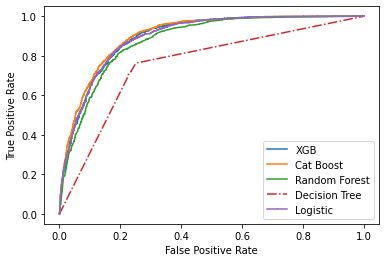

In [78]:
# Cat Boost Classifier
cb = CatBoostClassifier(random_state=1)
cb.fit(X_train, y_train)
# XGBoost Classifier
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train, y_train)
# Random Forest
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini")
clf.fit(X_train, y_train)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
# predict probabilities
xgb_probs = xgb.predict_proba(X_test)
cb_probs = cb.predict_proba(X_test)
lr_probs = model.predict_proba(X_test)
dT_probs = clf.predict_proba(X_test)
rf_probs = rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
xgb_probs = xgb_probs[:, 1]
cb_probs = cb_probs[:, 1]
lr_probs = lr_probs[:, 1]
dT_probs = dT_probs[:, 1]
rf_probs = rf_probs[:, 1]
# calculate scores
xgb_auc = roc_auc_score(y_test, xgb_probs)
cb_auc = roc_auc_score(y_test, cb_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
dT_auc = roc_auc_score(y_test, dT_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('XGB: ROC AUC=%.4f' % (xgb_auc))
print('Cat Boost: ROC AUC=%.4f' % (cb_auc))
print('Random Forest: ROC AUC=%.4f' % (rf_auc))
print('Decision Tree: ROC AUC=%.4f' % (dT_auc))
print('Logistic: ROC AUC=%.4f' % (lr_auc))
# calculate roc curves
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
cb_fpr, cb_tpr, _ = roc_curve(y_test, cb_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
dT_fpr, dT_tpr, _ = roc_curve(y_test, dT_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(xgb_fpr, xgb_tpr, linestyle='-', label='XGB')
plt.plot(cb_fpr, cb_tpr, linestyle='-', label='Cat Boost')
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='Random Forest')
plt.plot(dT_fpr, dT_tpr, linestyle='-.', label='Decision Tree')
plt.plot(lr_fpr, lr_tpr, marker=',', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Learning rate set to 0.029777
0:	learn: 0.6760760	total: 68ms	remaining: 1m 7s
1:	learn: 0.6586830	total: 87.7ms	remaining: 43.8s
2:	learn: 0.6426535	total: 143ms	remaining: 47.5s
3:	learn: 0.6284942	total: 168ms	remaining: 41.9s
4:	learn: 0.6163191	total: 235ms	remaining: 46.8s
5:	learn: 0.6043311	total: 267ms	remaining: 44.2s
6:	learn: 0.5927216	total: 310ms	remaining: 44s
7:	learn: 0.5819652	total: 375ms	remaining: 46.5s
8:	learn: 0.5728581	total: 399ms	remaining: 43.9s
9:	learn: 0.5631728	total: 457ms	remaining: 45.3s
10:	learn: 0.5554117	total: 496ms	remaining: 44.6s
11:	learn: 0.5475366	total: 572ms	remaining: 47.1s
12:	learn: 0.5407935	total: 650ms	remaining: 49.4s
13:	learn: 0.5336718	total: 710ms	remaining: 50s
14:	learn: 0.5273441	total: 758ms	remaining: 49.8s
15:	learn: 0.5219788	total: 785ms	remaining: 48.3s
16:	learn: 0.5160113	total: 843ms	remaining: 48.7s
17:	learn: 0.5110248	total: 910ms	remaining: 49.7s
18:	learn: 0.5062775	total: 939ms	remaining: 48.5s
19:	learn: 0.50

164:	learn: 0.4072351	total: 7.53s	remaining: 38.1s
165:	learn: 0.4071039	total: 7.56s	remaining: 38s
166:	learn: 0.4069477	total: 7.6s	remaining: 37.9s
167:	learn: 0.4067813	total: 7.64s	remaining: 37.8s
168:	learn: 0.4066755	total: 7.68s	remaining: 37.8s
169:	learn: 0.4065911	total: 7.7s	remaining: 37.6s
170:	learn: 0.4064998	total: 7.74s	remaining: 37.5s
171:	learn: 0.4063655	total: 7.77s	remaining: 37.4s
172:	learn: 0.4062065	total: 7.83s	remaining: 37.4s
173:	learn: 0.4061501	total: 7.86s	remaining: 37.3s
174:	learn: 0.4060832	total: 7.89s	remaining: 37.2s
175:	learn: 0.4059308	total: 7.95s	remaining: 37.2s
176:	learn: 0.4057319	total: 7.97s	remaining: 37.1s
177:	learn: 0.4055992	total: 8s	remaining: 36.9s
178:	learn: 0.4054625	total: 8.04s	remaining: 36.9s
179:	learn: 0.4053200	total: 8.06s	remaining: 36.7s
180:	learn: 0.4051937	total: 8.08s	remaining: 36.6s
181:	learn: 0.4050381	total: 8.12s	remaining: 36.5s
182:	learn: 0.4049486	total: 8.16s	remaining: 36.4s
183:	learn: 0.40480

325:	learn: 0.3912099	total: 14s	remaining: 29s
326:	learn: 0.3911385	total: 14.1s	remaining: 29s
327:	learn: 0.3910612	total: 14.1s	remaining: 29s
328:	learn: 0.3909136	total: 14.2s	remaining: 28.9s
329:	learn: 0.3907726	total: 14.2s	remaining: 28.8s
330:	learn: 0.3906774	total: 14.2s	remaining: 28.8s
331:	learn: 0.3905660	total: 14.3s	remaining: 28.7s
332:	learn: 0.3904783	total: 14.3s	remaining: 28.6s
333:	learn: 0.3904301	total: 14.3s	remaining: 28.6s
334:	learn: 0.3903671	total: 14.4s	remaining: 28.5s
335:	learn: 0.3903226	total: 14.4s	remaining: 28.5s
336:	learn: 0.3902149	total: 14.4s	remaining: 28.4s
337:	learn: 0.3901695	total: 14.5s	remaining: 28.3s
338:	learn: 0.3900562	total: 14.5s	remaining: 28.3s
339:	learn: 0.3899328	total: 14.6s	remaining: 28.2s
340:	learn: 0.3898549	total: 14.6s	remaining: 28.2s
341:	learn: 0.3897613	total: 14.6s	remaining: 28.1s
342:	learn: 0.3896849	total: 14.7s	remaining: 28.1s
343:	learn: 0.3896465	total: 14.7s	remaining: 28.1s
344:	learn: 0.389575

484:	learn: 0.3789872	total: 21.8s	remaining: 23.2s
485:	learn: 0.3788587	total: 21.9s	remaining: 23.1s
486:	learn: 0.3788041	total: 21.9s	remaining: 23.1s
487:	learn: 0.3787713	total: 21.9s	remaining: 23s
488:	learn: 0.3787117	total: 21.9s	remaining: 22.9s
489:	learn: 0.3786599	total: 22s	remaining: 22.9s
490:	learn: 0.3786300	total: 22s	remaining: 22.8s
491:	learn: 0.3785905	total: 22s	remaining: 22.7s
492:	learn: 0.3785089	total: 22s	remaining: 22.7s
493:	learn: 0.3784167	total: 22.1s	remaining: 22.6s
494:	learn: 0.3783137	total: 22.1s	remaining: 22.5s
495:	learn: 0.3782593	total: 22.1s	remaining: 22.5s
496:	learn: 0.3782047	total: 22.1s	remaining: 22.4s
497:	learn: 0.3780859	total: 22.1s	remaining: 22.3s
498:	learn: 0.3779704	total: 22.2s	remaining: 22.3s
499:	learn: 0.3778982	total: 22.2s	remaining: 22.2s
500:	learn: 0.3778249	total: 22.2s	remaining: 22.1s
501:	learn: 0.3777874	total: 22.2s	remaining: 22.1s
502:	learn: 0.3776969	total: 22.3s	remaining: 22s
503:	learn: 0.3776531	to

643:	learn: 0.3689886	total: 26.9s	remaining: 14.9s
644:	learn: 0.3689789	total: 26.9s	remaining: 14.8s
645:	learn: 0.3689282	total: 26.9s	remaining: 14.8s
646:	learn: 0.3689029	total: 27s	remaining: 14.7s
647:	learn: 0.3688321	total: 27s	remaining: 14.7s
648:	learn: 0.3687720	total: 27s	remaining: 14.6s
649:	learn: 0.3687024	total: 27s	remaining: 14.6s
650:	learn: 0.3686233	total: 27.1s	remaining: 14.5s
651:	learn: 0.3685488	total: 27.1s	remaining: 14.5s
652:	learn: 0.3685000	total: 27.2s	remaining: 14.4s
653:	learn: 0.3684312	total: 27.2s	remaining: 14.4s
654:	learn: 0.3683572	total: 27.3s	remaining: 14.4s
655:	learn: 0.3682754	total: 27.4s	remaining: 14.3s
656:	learn: 0.3682515	total: 27.4s	remaining: 14.3s
657:	learn: 0.3681982	total: 27.4s	remaining: 14.3s
658:	learn: 0.3681663	total: 27.5s	remaining: 14.3s
659:	learn: 0.3680990	total: 27.6s	remaining: 14.2s
660:	learn: 0.3680415	total: 27.6s	remaining: 14.2s
661:	learn: 0.3680350	total: 27.6s	remaining: 14.1s
662:	learn: 0.368031

807:	learn: 0.3608193	total: 32.2s	remaining: 7.65s
808:	learn: 0.3607947	total: 32.2s	remaining: 7.61s
809:	learn: 0.3607865	total: 32.3s	remaining: 7.56s
810:	learn: 0.3607181	total: 32.3s	remaining: 7.52s
811:	learn: 0.3606375	total: 32.3s	remaining: 7.48s
812:	learn: 0.3605318	total: 32.3s	remaining: 7.43s
813:	learn: 0.3604880	total: 32.3s	remaining: 7.39s
814:	learn: 0.3604604	total: 32.4s	remaining: 7.35s
815:	learn: 0.3604264	total: 32.4s	remaining: 7.3s
816:	learn: 0.3603526	total: 32.4s	remaining: 7.26s
817:	learn: 0.3603068	total: 32.4s	remaining: 7.22s
818:	learn: 0.3602499	total: 32.5s	remaining: 7.17s
819:	learn: 0.3601751	total: 32.5s	remaining: 7.13s
820:	learn: 0.3601562	total: 32.5s	remaining: 7.09s
821:	learn: 0.3600767	total: 32.5s	remaining: 7.04s
822:	learn: 0.3600656	total: 32.6s	remaining: 7s
823:	learn: 0.3600173	total: 32.6s	remaining: 6.96s
824:	learn: 0.3599742	total: 32.6s	remaining: 6.92s
825:	learn: 0.3599485	total: 32.6s	remaining: 6.87s
826:	learn: 0.35

969:	learn: 0.3534374	total: 36.5s	remaining: 1.13s
970:	learn: 0.3534077	total: 36.5s	remaining: 1.09s
971:	learn: 0.3533853	total: 36.6s	remaining: 1.05s
972:	learn: 0.3533813	total: 36.6s	remaining: 1.01s
973:	learn: 0.3533748	total: 36.6s	remaining: 978ms
974:	learn: 0.3533331	total: 36.7s	remaining: 940ms
975:	learn: 0.3533163	total: 36.7s	remaining: 902ms
976:	learn: 0.3532711	total: 36.7s	remaining: 864ms
977:	learn: 0.3532190	total: 36.7s	remaining: 826ms
978:	learn: 0.3531529	total: 36.8s	remaining: 788ms
979:	learn: 0.3531374	total: 36.8s	remaining: 751ms
980:	learn: 0.3530753	total: 36.8s	remaining: 713ms
981:	learn: 0.3530207	total: 36.9s	remaining: 677ms
982:	learn: 0.3529867	total: 36.9s	remaining: 639ms
983:	learn: 0.3529084	total: 37s	remaining: 601ms
984:	learn: 0.3528854	total: 37s	remaining: 563ms
985:	learn: 0.3528625	total: 37s	remaining: 526ms
986:	learn: 0.3527896	total: 37.1s	remaining: 488ms
987:	learn: 0.3527547	total: 37.1s	remaining: 451ms
988:	learn: 0.3527

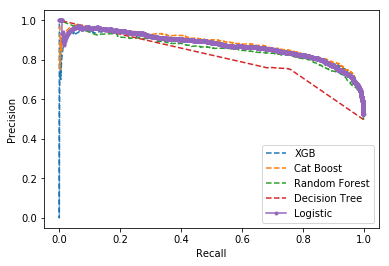

In [78]:
# # Cat Boost Classifier
cb = CatBoostClassifier(random_state=1)
cb.fit(X_train, y_train)
# XGBoost Classifier
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train, y_train)
# Random Forest
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
# Decision Tree
dt = DecisionTreeClassifier(criterion="gini", random_state=1)
dt.fit(X_train, y_train)
# Logistic Regression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_train, y_train)
# predict probabilities
xgb_probs = xgb.predict_proba(X_test)
cb_probs = cb.predict_proba(X_test)
rf_probs = rf.predict_proba(X_test)
dt_probs = dt.predict_proba(X_test)
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
xgb_probs = xgb_probs[:, 1]
cb_probs = cb_probs[:, 1]
rf_probs = rf_probs[:, 1]
dt_probs = dt_probs[:, 1]
lr_probs = lr_probs[:, 1]
# predict class values
xgb_yhat = xgb.predict(X_test)
cb_yhat = cb.predict(X_test)
rf_yhat = rf.predict(X_test)
dt_yhat = dt.predict(X_test)
yhat = model.predict(X_test)
# calculate precision and recall for each threshold
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, xgb_probs)
cb_precision, cb_recall, _ = precision_recall_curve(y_test, cb_probs)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
dt_precision, dt_recall, _ = precision_recall_curve(y_test, dt_probs)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
# calculate scores
xgb_f1, xgb_auc = f1_score(y_test, xgb_yhat), auc(xgb_recall, xgb_precision)
cb_f1, cb_auc = f1_score(y_test, cb_yhat), auc(cb_recall, cb_precision)
rf_f1, rf_auc = f1_score(y_test, rf_yhat), auc(rf_recall, rf_precision)
dt_f1, dt_auc = f1_score(y_test, dt_yhat), auc(dt_recall, dt_precision)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('XGB: f1=%.4f' % (xgb_f1))
print('Cat Boost: f1=%.4f' % (cb_f1))
print('Random Forest: f1=%.4f' % (rf_f1))
print('Decision Tree: f1=%.4f' % (dt_f1))
print('Logistic: f1=%.4f' % (lr_f1))
# plot the precision-recall curves
plt.plot(xgb_recall, xgb_precision, linestyle='--', label='XGB')
plt.plot(cb_recall, cb_precision, linestyle='--', label='Cat Boost')
plt.plot(rf_recall, rf_precision, linestyle='--', label='Random Forest')
plt.plot(dt_recall, dt_precision, linestyle='--', label='Decision Tree')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()